# Complete analysis and treatment of Horizontal MD4224 scan

In [1]:
import sys
import gzip
import glob
import pickle
import pandas as pd
import numpy as np
import scipy.io as sio 

sys.path.append('/eos/user/s/sterbini/MD_ANALYSIS/public/')
sys.path.append('/eos/project/l/liu/Toolbox/')

from myToolbox import *
from math import log10, floor
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-1062.18.1.el7.x86_64-x86_64-with-centos-7.7.1908-Core
Your folder is /eos/home-h/harafiqu/SWAN_projects/PS/From_Scratch/H_Optimised
Your IP is 172.17.0.43
2020-05-12 17:40:47


In [2]:
%run ../MD_Functions.ipynb

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('\n\tImporting MD Analysis functions for MD4224')? (<ipython-input-2-941de33f9438>, line 1)

### Import MD files

In [3]:
#myFiles=glob.glob('/eos/user/h/harafiqu/MD4224/2018.09.05_vertical/2018*.mat')
myFiles=glob.glob('/eos/user/h/harafiqu/MD4224/2018.09.03_horizontal_setup/2018*.mat')
len(myFiles)

481

### Convert matlab files to dataframe

In [4]:
# Convert mat files to dataframe
df_test = fromMatlabToDataFrame(myFiles,['PR_BQS72.SamplerAcquisition.value.estimatedTuneV','PR_BQS72.SamplerAcquisition.value.estimatedTuneH','PR_BQS72.SamplerAcquisition.cycleStamp','PR_BCT_ST.Samples.value.samples','PR_BCT_ST.Samples.cycleStamp'])

In [5]:
# cleanup dataframe
df_test['PR_BCT_ST.Samples.cycleStamp']=df_test['PR_BCT_ST.Samples.cycleStamp']/1e9
df_test['PR_BQS72.SamplerAcquisition.cycleStamp']=df_test['PR_BQS72.SamplerAcquisition.cycleStamp']/1e9

In [6]:
df_test

cycleStamp     matlabPLS  \
2018-09-04 08:30:23.500  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:31:07.900  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:30:23.500  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:31:07.900  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:31:52.300  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:33:21.100  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:33:21.100  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:34:49.900  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:34:49.900  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:36:18.700  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:36:18.700  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:37:47.500  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:37:47.500  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:39:16.300  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:39:16.300  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:40:45.100  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:40:45.100  1.536050e+18  CPS.USER.MD1   
2018-09-04 08:42:13.900  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:42:13.900  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:43:42.700  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:43:42.700  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:45:11.500  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:45:11.500  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:46:40.300  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:46:40.300  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:48:09.100  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:48:09.100  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:49:37.900  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:49:37.900  1.536051e+18  CPS.USER.MD1   
2018-09-04 08:51:06.700  1.536051e+18  CPS.USER.MD1   
...                               ...           ...   
2018-09-04 14:10:47.500  1.536070e+18  CPS.USER.MD1   
2018-09-04 14:12:16.300  1.536070e+18  CPS.USER.MD1   
2018-09-04 14:12:16.300  1.536070e+18  CPS.USER.MD1   
2018-09-04 14:13:45.100  1.536070e+18  CPS.USER.MD1   
2018-09-04 14:13:45.100  1.536070e+18  CPS.USER.MD1   
2018-09-04 14:15:13.900  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:15:13.900  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:16:42.700  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:16:42.700  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:18:11.500  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:18:11.500  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:19:40.300  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:19:40.300  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:21:09.100  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:21:09.100  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:22:37.900  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:22:37.900  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:24:06.700  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:24:06.700  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:25:35.500  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:25:35.500  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:27:04.300  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:27:04.300  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:28:33.100  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:28:33.100  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:30:01.900  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:30:01.900  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:31:30.700  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:31:30.700  1.536071e+18  CPS.USER.MD1   
2018-09-04 14:32:59.500  1.536072e+18  CPS.USER.MD1   

                                                            matlabFilePath  \
2018-09-04 08:30:23.500  /eos/user/h/harafiqu/MD4224/2018.09.03_horizon...   
2018-09-04 08:31:07.900  /eos/user/h/harafiqu/MD4224/2018.09.03_horizon...   
2018-09-04 08:30:23.500  /eos/user/h/harafiqu/MD4224/2018.09.03_horizon...   
2018-09-04 08:31:07.900  /eos/user/h/harafiqu/MD4224/2018.09.03_horizon...   
2018-09-04 08:31:52.300  /eos/user/h/harafiqu/MD4224/2018.09.03_horizon...   
2018-09-04 08:33:21.100  /eos/user/h/harafiqu/MD4224/2018.09.03_horizon...   
2018-09-04 08:33:21.100  /eos/user/h/harafiqu/MD4224/2018.09.03_horizo

In [7]:
# Check cyclestamp differences

# Iterate over each row in the dataframe
differences = []
for index, row in df_test.iterrows():
    difference = (row['PR_BCT_ST.Samples.cycleStamp'] - row['PR_BQS72.SamplerAcquisition.cycleStamp'])/row['PR_BCT_ST.Samples.cycleStamp']
    differences.append(difference)
    
print 'Difference between BCT and BQS73 cycle times (percentage) \n Mean:', np.mean(differences),' Min:',np.min(differences),' Max:', np.max(differences)

# Iterate over each row in the dataframe
differences = []
for index, row in df_test.iterrows():
    difference = (row['cycleStamp'] - (row['PR_BCT_ST.Samples.cycleStamp']*1E9))/row['cycleStamp']
    differences.append(difference)
    
print '\nDifference between BCT and cyclestamp cycle times (percentage) \n Mean:', np.mean(differences),' Min:',np.min(differences),' Max:', np.max(differences)

Difference between BCT and BQS73 cycle times (percentage) 
 Mean: 2.7610980770525687e-11  Min: 0.0  Max: 1.3280881750622855e-08

Difference between BCT and cyclestamp cycle times (percentage) 
 Mean: 4.701978064056953e-06  Min: 4.687281837851767e-06  Max: 4.745158443302907e-06


In [8]:
df_bct = fromMatlabToDataFrame(myFiles,['PR_BCT_ST.Samples.value.samples','PR_BCT_ST.Samples.cycleStamp', 'PR_SCBFC.Samples.value.samples'])
df_bqs72 = fromMatlabToDataFrame(myFiles,['PR_BQS72.SamplerAcquisition.value.estimatedTuneV','PR_BQS72.SamplerAcquisition.value.estimatedTuneH','PR_BQS72.SamplerAcquisition.cycleStamp'])

In [9]:
df_first = pnd.merge(df_bct, df_bqs72, left_on = 'PR_BCT_ST.Samples.cycleStamp',  right_on = 'PR_BQS72.SamplerAcquisition.cycleStamp')

In [10]:
# Have to convert this for unknown reason (myToolbox.unixtime2datetimeVectorize expects this converted cycleStamp)
df_first['PR_BCT_ST.Samples.cycleStamp']=df_first['PR_BCT_ST.Samples.cycleStamp']/1e9
# copy to new column
df_first['cf_cycleStamp']=df_first['PR_BCT_ST.Samples.cycleStamp']
# rename BCT cyclestamp to cycleStamp
df_first = df_first.rename(index=str, columns={"PR_BCT_ST.Samples.cycleStamp" : "cycleStamp", })
# convert to datetime
#df_first['PR_BCT_ST.Samples.cycleStamp']=df_first['cycleStamp'].apply(myToolbox.unixtime2datetimeVectorize)
df_first['cf_timeStamp'] = df_first['cycleStamp'].apply(myToolbox.unixtime2datetimeVectorize)
#df_first['cf_timeStamp']=df_first['timeStamp']
# Set index
df_first = df_first.set_index(['cycleStamp'])
df_first = df_first.drop(labels='matlabFilePath_x',axis='columns')
df_first = df_first.drop(labels='matlabFilePath_y',axis='columns')
df_first = df_first.drop(labels='cycleStamp_x',axis='columns')
df_first = df_first.drop(labels='cycleStamp_y',axis='columns')
df_first = df_first.drop(labels='matlabPLS_y',axis='columns')
df_first = df_first.drop(labels='matlabPLS_x',axis='columns')
df_first = df_first.drop(labels='PR_BQS72.SamplerAcquisition.cycleStamp',axis='columns')
#df_first = df_first.drop(labels='PR_BCT_ST.Samples.cycleStamp',axis='columns')

In [11]:
df_first['Qx']=df_first.apply(lambda x: np.nanmean(x['PR_BQS72.SamplerAcquisition.value.estimatedTuneH'][20:280]),axis=1)
df_first['Qy']=df_first.apply(lambda x: np.nanmean(x['PR_BQS72.SamplerAcquisition.value.estimatedTuneV'][20:280]),axis=1)

In [12]:
# Remove anomalous cases etc
#df_first = df_first.drop(df_first[df_first['Qx'] < .295].index )
df_first = df_first.dropna(axis=0,how='all',subset =['Qy'])
df_first = df_first.dropna(axis=0,how='all',subset =['Qx'])
df_first = df_first.drop(labels='PR_BQS72.SamplerAcquisition.value.estimatedTuneV',axis='columns')
df_first = df_first.drop(labels='PR_BQS72.SamplerAcquisition.value.estimatedTuneH',axis='columns')
#df_mergetest

In [13]:
df_first

PR_BCT_ST.Samples.value.samples  \
cycleStamp                                                        
1.536043e+09  [-0.11624000000000001, -0.10534, -0.0999, -0.0...   
1.536043e+09  [-0.11624000000000001, -0.10534, -0.0999, -0.0...   
1.536043e+09  [-0.13622, -0.13077, -0.12653, -0.11382, -0.10...   
1.536043e+09  [-0.21553000000000003, -0.20585, -0.1967600000...   
1.536043e+09  [-0.20040000000000002, -0.19313000000000002, -...   
1.536043e+09  [-0.12714, -0.11745000000000001, -0.1083700000...   
1.536043e+09  [-0.10353000000000001, -0.09626000000000001, -...   
1.536043e+09  [-0.16831000000000002, -0.16831000000000002, -...   
1.536043e+09  [-0.20524, -0.1895, -0.18163, -0.1677000000000...   
1.536043e+09  [-0.16831000000000002, -0.15136000000000002, -...   
1.536043e+09  [-0.12532000000000001, -0.11079000000000001, -...   
1.536043e+09  [-0.12169, -0.11927000000000001, -0.1126100000...   
1.536043e+09  [-0.17557, -0.16468000000000002, -0.1543800000...   
1.536043e+09  [-0.21795, -0.20403000000000002, -0.1901100000...   
1.536043e+09  [-0.16589, -0.14712, -0.1338, -0.1095800000000...   
1.536043e+09  [-0.13017, -0.11685000000000001, -0.1107900000...   
1.536043e+09  [-0.13077, -0.12532000000000001, -0.1247200000...   
1.536043e+09  [-0.25065000000000004, -0.24036000000000002, -...   
1.536043e+09  [-0.19253, -0.17739000000000002, -0.1646800000...   
1.536043e+09  [-0.14712, -0.13077, -0.12048, -0.103530000000...   
1.536043e+09  [-0.1453, -0.13622, -0.13017, -0.1198800000000...   
1.536043e+09  [-0.19253, -0.18345, -0.17497000000000001, -0....   
1.536044e+09  [-0.22098, -0.20766, -0.19676000000000002, -0....   
1.536044e+09  [-0.1895, -0.17921, -0.16770000000000002, -0.1...   
1.536044e+09  [-0.13622, -0.12714, -0.11806000000000001, -0....   
1.536044e+09  [-0.12775, -0.12472000000000001, -0.12775, -0....   
1.536044e+09  [-0.18647000000000002, -0.17679, -0.1707300000...   
1.536044e+09  [-0.21069000000000002, -0.19495, -0.18526, -0....   
1.536044e+09  [-0.16891, -0.15015, -0.14046, -0.12109, -0.10...   
1.536044e+09  [-0.12411000000000001, -0.10958000000000001, -...   
...                                                         ...   
1.536063e+09  [-0.19313000000000002, -0.18647000000000002, -...   
1.536063e+09  [-0.19979000000000002, -0.18768, -0.17618, -0....   
1.536063e+09  [-0.16952, -0.16286, -0.15196, -0.13319, -0.11...   
1.536063e+09  [-0.12532000000000001, -0.11866000000000002, -...   
1.536063e+09  [-0.15862, -0.15257, -0.15136000000000002, -0....   
1.536063e+09  [-0.21130000000000002, -0.20040000000000002, -...   
1.536063e+09  [-0.19798000000000002, -0.1786, -0.16891, -0.1...   
1.536063e+09  [-0.14288, -0.13259, -0.12290000000000001, -0....   
1.536063e+09  [-0.13622, -0.1338, -0.12169, -0.112, -0.10413...   
1.536063e+09  [-0.18345, -0.18042000000000002, -0.1743600000...   
1.536063e+09  [-0.20827, -0.19737000000000002, -0.18587, -0....   
1.536064e+09  [-0.18223, -0.17436000000000001, -0.1610400000...   
1.536064e+09  [-0.13259, -0.12169, -0.11745000000000001, -0....   
1.536064e+09  [-0.12593000000000001, -0.12048, -0.1198800000...   
1.536064e+09  [-0.19858, -0.18829, -0.17921, -0.16044, -0.14...   
1.536064e+09  [-0.20282000000000003, -0.18466000000000002, -...   
1.536064e+09  [-0.15802000000000002, -0.14288, -0.13259, -0....   
1.536064e+09  [-0.12653, -0.11866000000000002, -0.1132200000...   
1.536064e+09  [-0.15196, -0.1453, -0.13683, -0.1247200000000...   
1.536064e+09  [-0.2343, -0.22098, -0.20887000000000003, -0.1...   
1.536064e+09  [-0.19253, -0.18466000000000002, -0.1749700000...   
1.536064e+09  [-0.13138000000000002, -0.12109, -0.1101900000...   
1.536064e+09  [-0.13077, -0.12109, -0.11624000000000001, -0....   
1.536064e+09  [-0.17255, -0.16347, -0.15983, -0.148330000000...   
1.536064e+09  [-0.19434, -0.18102000000000001, -0.16891, -0....   
1.536064e+09  [-0.1786, -0.16044, -0.15075000000000002, -0.1...   
1.536064e+09  [-0.15257, -0.13864, -0.13017, -0.11443, -0.10...   
1.536064e+09

In [14]:
# Check chirp time
test = myToolbox.japcMatlabImport(myFiles[0])
test.PR_BQS72.SamplerAcquisition.value.acqOffset

20

# Intensity, Losses, Ratio

In [15]:
df_second=intensity_df(df_first,start=70,end=1185)

In [16]:
df_second = df_second.drop(labels='PR_BCT_ST.Samples.value.samples',axis='columns');
df_second = df_second.set_index(['cf_timeStamp']);
df_second

PR_SCBFC.Samples.value.samples  \
cf_timeStamp                                                                 
2018-09-04 08:29:39.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:29:39.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:30:23.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:31:07.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:31:52.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:32:36.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:33:21.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:34:05.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:34:49.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:35:34.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:36:18.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:37:03.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:37:47.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:38:31.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:39:16.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:40:00.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:40:45.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:41:29.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:42:13.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:42:58.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:43:42.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:44:27.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:45:11.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:45:55.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:46:40.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:47:24.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:48:09.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:48:53.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:49:37.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 08:50:22.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                                    ...   
2018-09-04 14:10:47.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:11:31.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:12:16.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:13:00.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:13:45.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:14:29.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:15:13.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:15:58.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:16:42.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:17:27.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:18:11.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:18:55.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:19:40.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:20:24.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:21:09.100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:21:53.500  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:22:37.900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:23:22.300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2018-09-04 14:24:06.700  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

### Check for duplicates

In [17]:
df_second = df_second.drop(df_second.index[0])
df_second[df_second.index.duplicated()]

Empty DataFrame
Columns: [PR_SCBFC.Samples.value.samples, cf_cycleStamp, Qx, Qy, intensity, losses, ratio]
Index: []

### Plot Intensity, Losses, Ratio

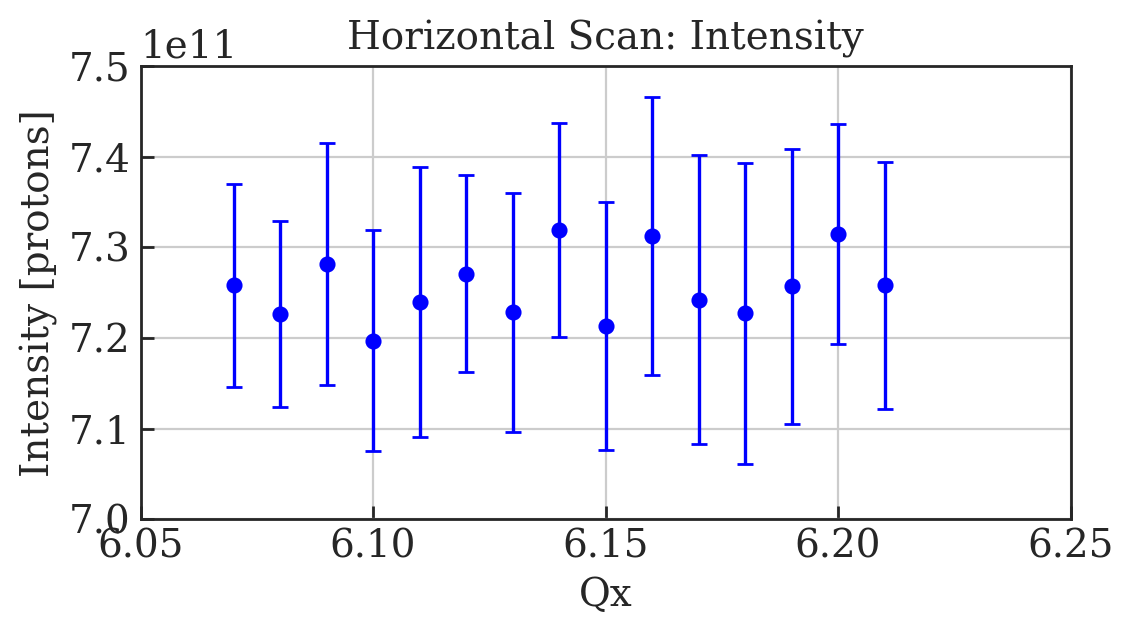

In [18]:
# Plot averaged data points with error bars
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df_second['intensity'][(df_second['Qx']>lower_lim)][(df_second['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df_second['intensity'][(df_second['Qx']>lower_lim)][(df_second['Qx']<upper_lim)] ) )
    
fig=plt.figure(figsize=(6, 3), dpi= 200, facecolor='w', edgecolor='k');

plt.errorbar(x_data, y_data_172, y_error_172, linestyle='None', marker='o', capsize=3, color='b')

x_d = np.linspace(6.0, 7.0, 2)
y_d = (7.25E11, 7.25E11)

plt.xlabel('Qx');
plt.ylabel('Intensity [protons]');
plt.title('Horizontal Scan: Intensity')
plt.ylim(70E10,75E10)
plt.xlim(6.05, 6.25)
#plt.legend()
plt.grid();
fig.savefig('MD4224_Complete_Horizontal_Intensities_Errors.png');

# Timber: Horizontal

In [19]:
dfH=read_data(year=2018,date=4,month=9,hour=8,minutes=20,span=8,user='CPS%MD1',WS='65.H');

In [20]:
len(dfH)

227

In [21]:
dfH

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   
2018-09-04 14:32:59.500                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

# Manual Fit

In [22]:
df_H_filtered = Multi_filter(dfH, with_plot = True, WS = '65.H' )


Multi_filter row  0
5 parameter fit sigma =  4.4119310383040915  +/-  0.002914145266276778
3 parameter fit sigma =  4.411930986822637  +/-  0.010816417382478002
Second moment =  4.3764926897884795


/usr/local/bin/start_ipykernel.py:79: RuntimeWarning: invalid value encountered in sqrt
/usr/local/bin/start_ipykernel.py:161: RuntimeWarning: invalid value encountered in sqrt
/usr/local/bin/start_ipykernel.py:163: RuntimeWarning: invalid value encountered in sqrt



Multi_filter row  1
5 parameter fit sigma =  4.385078204284094  +/-  0.0030937376352799125
3 parameter fit sigma =  4.385077923670447  +/-  0.011540243857238536
Second moment =  4.259797370207958

Multi_filter row  2
5 parameter fit sigma =  4.434069732151142  +/-  0.0029127442997559597
3 parameter fit sigma =  4.434069219375807  +/-  0.010678926112903846
Second moment =  4.351412601781533

Multi_filter row  3
5 parameter fit sigma =  4.468285259732235  +/-  0.003124287050226527
3 parameter fit sigma =  4.468284998488029  +/-  0.011511872830552472
Second moment =  4.377511954189166

Multi_filter row  4
5 parameter fit sigma =  4.59375611180132  +/-  0.0028428103920089868
3 parameter fit sigma =  4.5937560326213065  +/-  0.010113211080327601
Second moment =  4.51728732744514

Multi_filter row  5
5 parameter fit sigma =  4.697891265586504  +/-  0.0029637498972557345
3 parameter fit sigma =  4.697891178560968  +/-  0.01026656510179562
Second moment =  4.846254714643309

Multi_filter row 


Multi_filter row  43
5 parameter fit sigma =  4.8029279976204196  +/-  0.003495917733946858
3 parameter fit sigma =  4.8029254308872  +/-  0.012644063399368823
Second moment =  4.737634460427686

Multi_filter row  44
5 parameter fit sigma =  4.821255427903209  +/-  0.0035173473862649277
3 parameter fit sigma =  4.821255117804676  +/-  0.012754042959218961
Second moment =  4.816287500113392

Multi_filter row  45
5 parameter fit sigma =  5.319063160407108  +/-  0.004604455368937491
3 parameter fit sigma =  5.3190604727438355  +/-  0.015901383751559754
Second moment =  5.141877479576826

Multi_filter row  46
5 parameter fit sigma =  5.790448522671267  +/-  0.004672381048590634
3 parameter fit sigma =  5.790449233157407  +/-  0.015277758817701347
Second moment =  5.678166447494334

Multi_filter row  47
5 parameter fit sigma =  4.348981030949833  +/-  0.002835274335436684
3 parameter fit sigma =  4.348980986982779  +/-  0.010456858001503241
Second moment =  4.4215175821403925

Multi_filter


Multi_filter row  85
5 parameter fit sigma =  4.437458999956741  +/-  0.0028960710740445054
3 parameter fit sigma =  4.437458624584091  +/-  0.010648185158178803
Second moment =  4.33024010954803

Multi_filter row  86
5 parameter fit sigma =  4.4092876988889005  +/-  0.0027968370755140945
3 parameter fit sigma =  4.409288719152602  +/-  0.010389500462277558
Second moment =  4.43367988779502

Multi_filter row  87
5 parameter fit sigma =  4.503467166055622  +/-  0.003267252786969994
3 parameter fit sigma =  4.503469337779128  +/-  0.012245554740549365
Second moment =  4.407507038016954

Multi_filter row  88
5 parameter fit sigma =  4.636240911534021  +/-  0.003097617278902683
3 parameter fit sigma =  4.636240875233502  +/-  0.01141109422803188
Second moment =  4.590016020055857

Multi_filter row  89
5 parameter fit sigma =  4.973159329365637  +/-  0.0037084461755382482
3 parameter fit sigma =  4.973159933049034  +/-  0.013265821747996846
Second moment =  4.818429996340825

Multi_filter 


Multi_filter row  127
5 parameter fit sigma =  5.47140930464889  +/-  0.004303413900432663
3 parameter fit sigma =  5.471409072080677  +/-  0.014556704364692457
Second moment =  5.601206134950219

Multi_filter row  128
5 parameter fit sigma =  5.919787326011903  +/-  0.005037633443044629
3 parameter fit sigma =  5.919787695608012  +/-  0.016361700342454016
Second moment =  5.5059411476500335

Multi_filter row  129
5 parameter fit sigma =  4.41980319852834  +/-  0.0028046886422514344
3 parameter fit sigma =  4.4198038609957635  +/-  0.010439650934729275
Second moment =  4.364078654036144

Multi_filter row  130
5 parameter fit sigma =  4.416615383715263  +/-  0.0029342131633795215
3 parameter fit sigma =  4.416615286414225  +/-  0.010954677614264552
Second moment =  4.31176905860845

Multi_filter row  131
5 parameter fit sigma =  4.499386213116249  +/-  0.002843624180186387
3 parameter fit sigma =  4.499385234680585  +/-  0.010441589046505934
Second moment =  4.363610915421009

Multi_fi


Multi_filter row  169
5 parameter fit sigma =  4.984515967131949  +/-  0.003445902398587343
3 parameter fit sigma =  4.984515554475306  +/-  0.011863190628658756
Second moment =  4.835284519015939

Multi_filter row  170
5 parameter fit sigma =  5.463460246325279  +/-  0.004546048186186064
3 parameter fit sigma =  5.4634592274875615  +/-  0.015534213116481881
Second moment =  5.165023205918372

Multi_filter row  171
5 parameter fit sigma =  5.993457601647336  +/-  0.005099984947802033
3 parameter fit sigma =  5.993456840929918  +/-  0.016602076793227546
Second moment =  5.640843505504249

Multi_filter row  172
5 parameter fit sigma =  4.384724106676884  +/-  0.002848167316275948
3 parameter fit sigma =  4.384724623985665  +/-  0.010685555095255006
Second moment =  4.371576040729943

Multi_filter row  173
5 parameter fit sigma =  4.458278879450483  +/-  0.0030108124812569005
3 parameter fit sigma =  4.4582781137583565  +/-  0.011319678933284592
Second moment =  4.442206535903683

Multi_


Multi_filter row  211
5 parameter fit sigma =  4.424315833004393  +/-  0.002942747902659792
3 parameter fit sigma =  4.424315706414014  +/-  0.01097471160800633
Second moment =  4.361144981324213

Multi_filter row  212
5 parameter fit sigma =  4.587936027290125  +/-  0.0031431135073126688
3 parameter fit sigma =  4.58793589498223  +/-  0.011677442137390108
Second moment =  4.5225487179783475

Multi_filter row  213
5 parameter fit sigma =  4.732862030896154  +/-  0.0032365666832259794
3 parameter fit sigma =  4.732861400750446  +/-  0.011670461443721386
Second moment =  4.720630150953136

Multi_filter row  214
5 parameter fit sigma =  4.77590023650177  +/-  0.0031016752680976816
3 parameter fit sigma =  4.775900291633621  +/-  0.010998563191012448
Second moment =  4.702202902117167

Multi_filter row  215
5 parameter fit sigma =  4.873807548265324  +/-  0.0033532949696412485
3 parameter fit sigma =  4.87380810245368  +/-  0.011868867525417796
Second moment =  4.833670503439342

Multi_fi

In [23]:
df_H_filtered = df_H_filtered.dropna(axis=0, how='all', subset=['profile H']);
df_H_filtered = df_H_filtered.dropna(axis=0, how='all', subset=['sig H']);
df_H_filtered = df_H_filtered.drop(labels = 'PR.BCT.LT:SAMPLES',axis='columns');
df_H_filtered['cycleStamp'] = df_H_filtered['cycleStamp']/1e9;
df_H_filtered['timeStamp_h'] = df_H_filtered['cycleStamp'].apply(myToolbox.unixtime2datetimeVectorize);


In [24]:
df_H_filtered

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   
2018-09-04 14:32:59.500                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

# Merge Timber WS dataframe with Intensity/Tunes dataframe

In [25]:
df_third = pnd.merge(df_H_filtered, df_second, left_index=True, right_index=True, how='outer');
df_third

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:32:36.700                        NaN   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:05.500                        NaN   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:35:34.300                        NaN   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:03.100                        NaN   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:38:31.900                        NaN   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:00.700                        NaN   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:41:29.500                        NaN   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:42:58.300                        NaN   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:44:27.100                        NaN   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:45:55.900                        NaN   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:47:24.700                        NaN   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:48:53.500                        NaN   
2018-09-04 08:49:37.900                        NaN   
2018-09-04 08:50:22.300                        NaN   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:51:51.100                        NaN   
...                                            ...   
2018-09-04 14:11:31.900                        NaN   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:00.700                        NaN   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:14:29.500                        NaN   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:15:58.300                        NaN   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:17:27.100                        NaN   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:18:55.900                        NaN   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:20:24.700                        NaN   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:21:53.500                        NaN   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:23:22.300                        NaN   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:24:51.100                        NaN   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:26:19.900                        NaN   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:27:48.700                        NaN   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:29:17.500                        NaN   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:30:46.300                        NaN   
2018-09-04 14:31:30.700                      185.0   
2018-09-04 14:32:15.100                        NaN   
2018-09-04 14:32:59.500                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:32:36.700                                                NaN   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:05.500                                                NaN   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:35:34.300                             

In [26]:
df_third=df_third.dropna(axis=0,how='all',subset =['Qx']);
df_third=df_third.dropna(axis=0,how='all',subset =['sig H']);
df_third=df_third.dropna(axis=1,how='all');
df_third = df_third.drop(labels = 'timeStamp_h',axis='columns');
df_third = df_third.drop(labels = 'cf_cycleStamp',axis='columns');
df_third

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:47:06.700                      185.0   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

# Emittances

In [27]:
span=span_range(df_third)
span

xrange(225)

In [28]:
# Calculate emittances in Vertical
df_fourth = emittance_df(df_third, WS='65.H', verbose=True)

Emittance  0  =  1.0720585167841377
Emittance  1  =  1.039389501677297
Emittance  2  =  1.0736544997647173
Emittance  3  =  1.0847021738486387
Emittance  4  =  1.1803327033780053
Emittance  5  =  1.2577484255275342
Emittance  6  =  1.465641978716663
Emittance  7  =  1.7123883393906132
Emittance  8  =  2.542525638998941
Emittance  9  =  1.0757330077108824
Emittance  10  =  1.1092037394109615
Emittance  11  =  1.1397954698735193
Emittance  12  =  1.2076829822013382
Emittance  13  =  1.3218406848334272
Emittance  14  =  1.9167099850367684
Emittance  15  =  2.650150661103901
Emittance  16  =  1.0851398904201601
Emittance  17  =  1.0517367521161256
Emittance  18  =  1.0527135819384437
Emittance  19  =  1.1719847369934921
Emittance  20  =  1.3021520221345089
Emittance  21  =  1.4731680110494205
Emittance  22  =  1.8299161402860247
Emittance  23  =  2.3646157083824937
Emittance  24  =  1.089521660151752
Emittance  25  =  1.0816995058318428
Emittance  26  =  1.117322470587402
Emittance  27  = 

In [29]:
df_fourth

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:47:06.700                      185.0   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

# Emittances from 2nd Moment

In [30]:
df_fifth = emittance_df_2(df_fourth, WS='65.H', verbose=True)

Emittance from 2nd moment 0  =  1.040693336025172
Emittance from 2nd moment 1  =  0.9301054993827126
Emittance from 2nd moment 2  =  1.0002077253304604
Emittance from 2nd moment 3  =  1.0030060880303926
Emittance from 2nd moment 4  =  1.1088947329048733
Emittance from 2nd moment 5  =  1.4045298273735003
Emittance from 2nd moment 6  =  1.2391646137282577
Emittance from 2nd moment 7  =  1.5855394500470394
Emittance from 2nd moment 8  =  2.5767951407814196
Emittance from 2nd moment 9  =  1.018222512601362
Emittance from 2nd moment 10  =  0.973570969974511
Emittance from 2nd moment 11  =  1.1165657917805618
Emittance from 2nd moment 12  =  1.188847666981425
Emittance from 2nd moment 13  =  1.235537326522712
Emittance from 2nd moment 14  =  1.6484733588782878
Emittance from 2nd moment 15  =  2.1540461565806095
Emittance from 2nd moment 16  =  1.0126911437719806
Emittance from 2nd moment 17  =  0.9902452033171648
Emittance from 2nd moment 18  =  1.1797950653147526
Emittance from 2nd moment 1

Emittance from 2nd moment 214  =  1.3814921273275236
Emittance from 2nd moment 215  =  1.4587949115211865
Emittance from 2nd moment 216  =  1.7865147637757914
Emittance from 2nd moment 217  =  3.597414627391441
Emittance from 2nd moment 218  =  1.2190015943076673
Emittance from 2nd moment 219  =  1.0369679887477388
Emittance from 2nd moment 220  =  1.1855989376291396
Emittance from 2nd moment 221  =  1.1652117961241022
Emittance from 2nd moment 222  =  1.3358456797930025
Emittance from 2nd moment 223  =  1.5041707958719468
Emittance from 2nd moment 224  =  2.091031861620239


In [31]:
df_fifth

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:47:06.700                      185.0   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

# Save Dataframe to pickle

In [32]:
df_fifth.to_pickle('MD4224_HighBrightness_Vertical_Using_Sim_Optics_Complete')

In [3]:
df0 = pnd.read_pickle('MD4224_HighBrightness_Vertical_Using_Sim_Optics_Complete')
#df0 = df_fifth

## Find correct tomo file for sims

In [4]:
# First tomo file
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1536135630))

'2018-09-05 10:20:30'

In [5]:
# Last tomo file
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1536152855))

'2018-09-05 15:07:35'

In [6]:
# data start time
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df0['cycleStamp'][0]))

'2018-09-04 10:30:23'

In [7]:
# data start time
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df0['cycleStamp'][0]))

'2018-09-04 10:30:23'

# Plots

In [8]:
# These are our tune points:
scan_points = np.linspace(607, 621, 15);
scan_points = scan_points/100;
scan_points

array([6.07, 6.08, 6.09, 6.1 , 6.11, 6.12, 6.13, 6.14, 6.15, 6.16, 6.17,
       6.18, 6.19, 6.2 , 6.21])

In [9]:
from math import log10, floor

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [10]:
Qx_points=[]
for i in scan_points:
    Qx_points.append(round_sig(i,5))
Qx_points

[6.07,
 6.08,
 6.09,
 6.1,
 6.11,
 6.12,
 6.13,
 6.14,
 6.15,
 6.16,
 6.17,
 6.18,
 6.19,
 6.2,
 6.21]

In [11]:
Qx_point_separation = Qx_points[1] - Qx_points[0]
Qx_pt_sep = Qx_point_separation/2
print 'Tune points separated by +/- ', Qx_pt_sep

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Tune points separated by +/- ', Qx_pt_sep)? (<ipython-input-11-6fe4883b4889>, line 3)

In [12]:
# Make dictionary of nearest tune point and iterators
tune_points = {}
for i in Qx_points:
    tune_points[i] = np.where(np.logical_and(np.greater_equal(df0['Qx'], (i-Qx_pt_sep-6)), np.less_equal(df0['Qx'], (i+Qx_pt_sep-6)) ) )[0]
tune_points

NameError: name 'Qx_pt_sep' is not defined

In [ ]:
import matplotlib.cm as cm
# One colour per data point
colors = cm.rainbow(np.linspace(0, 1, len(df0)))

## Plot all WS profiles grouped by tune point

In [13]:
# Plot WS profiles grouped by Qx
for key, value in tune_points.iteritems():
    fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
    for i in xrange(len(value)):
        # dataframe index = value[i]
        plt.plot(df0['position H'].iloc[value[i]], df0['profile H'].iloc[value[i]], color=colors[value[i]])
    plt.xlabel('x [mm]')
    plt.ylabel('WS profile [-]')
    title = str('HB V Scan: Q_x = ' + str(key))
    plt.title(title)
    plt.ylim(0, 1)
    plt.grid()
    savename = str('MD4224_HB_Horizontal_Manual_Fit_WS_Profiles_Qx=' + str(key) + '_Using_Sim_Optics.png')
#     fig.savefig(savename)

AttributeError: 'dict' object has no attribute 'iteritems'

In [14]:
# Plot WS profiles grouped by Qx
for key, value in tune_points.iteritems():
    fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
    for i in xrange(len(value)):
        # dataframe index = value[i]
        plt.plot(df0['PR.BWS.65.H_ROT:PROF_POSITION_IN'].iloc[value[i]], df0['PR.BWS.65.H_ROT:PROF_DATA_IN'].iloc[value[i]], color=colors[value[i]])
    plt.xlabel('x [mm]')
    plt.ylabel('WS profile [-]')
    title = str('HB V Scan: Q_x = ' + str(key))
    plt.title(title)
    plt.ylim(0, 1)
    plt.grid()
    savename = str('MD4224_HB_Horizontal_Manual_Fit_WS_Profiles_Raw_Qx=' + str(key) + '_Using_Sim_Optics.png')
#     fig.savefig(savename)

AttributeError: 'dict' object has no attribute 'iteritems'

## Plot Horizontal emittance

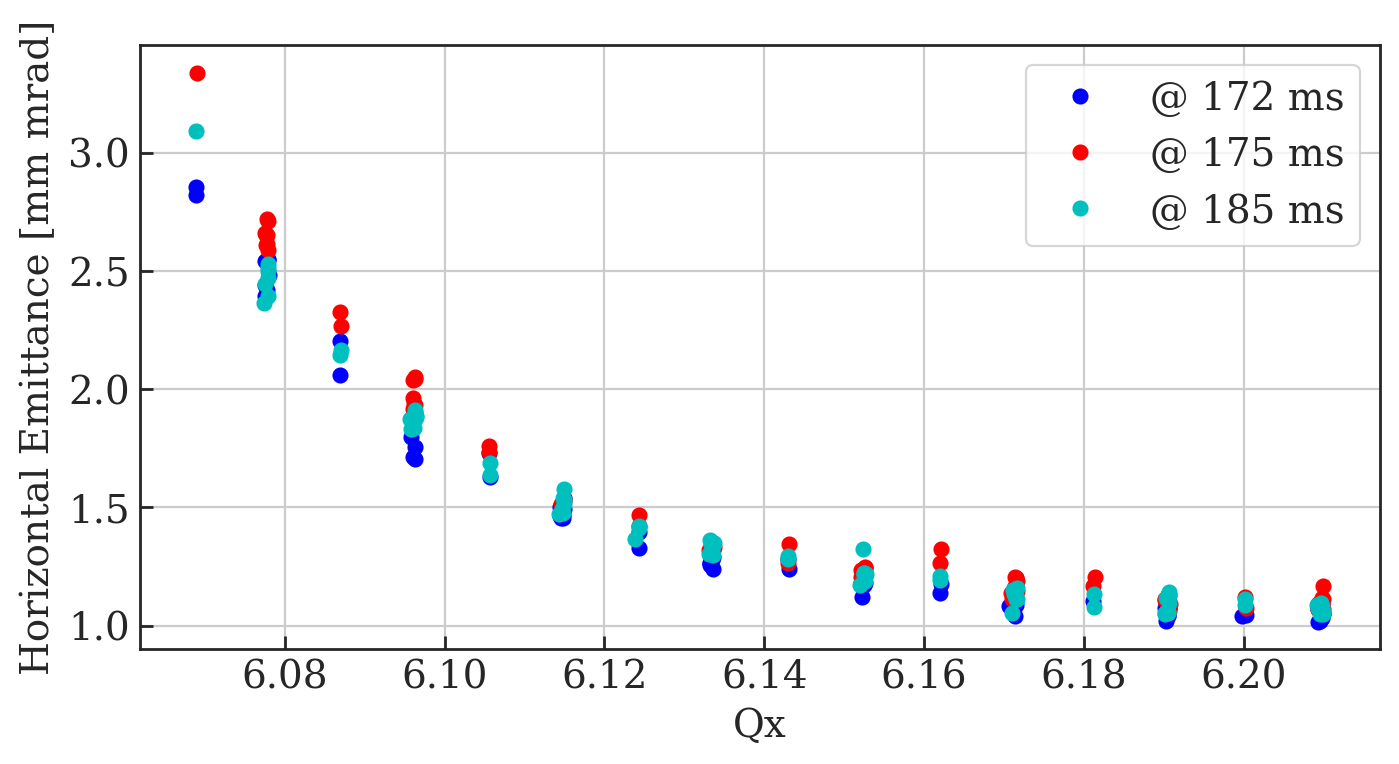

In [15]:
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)]+6, df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)],'bo', label='@ 172 ms');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)]+6, df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)],'ro', label='@ 175 ms');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)]+6, df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)],'co', label='@ 185 ms');
plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');
plt.legend();
#plt.title('Wire Scanner Acquisition Delay');
#plt.xlim(6.075, 6.25);
#plt.ylim(0,5);
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_Using_Sim_Optics.png');

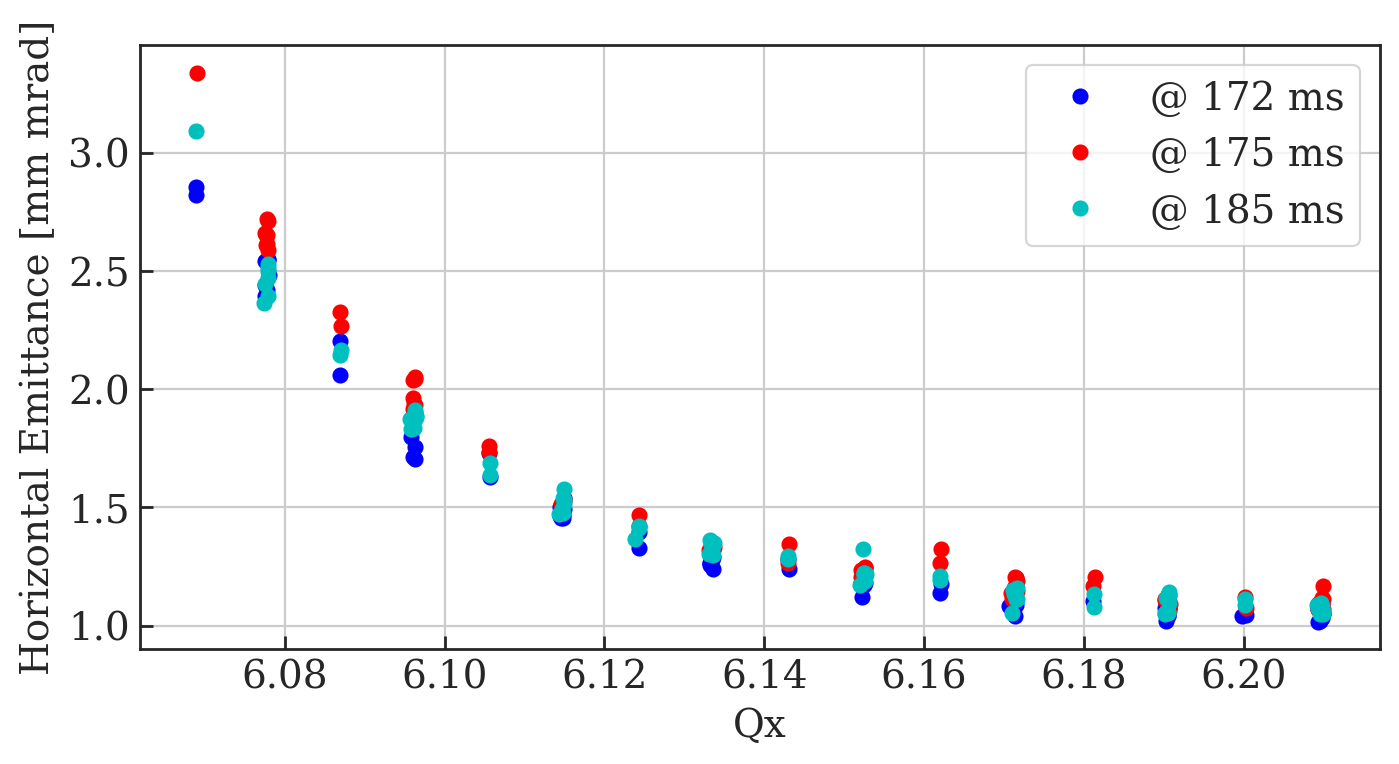

In [16]:
# Plot each shot: Qy vs Ey

fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)]+6, df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)],'bo', label='@ 172 ms');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)]+6, df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)],'ro', label='@ 175 ms');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)]+6, df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)],'co', label='@ 185 ms');
plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');
plt.legend();
#plt.title('Wire Scanner Acquisition Delay');
#plt.xlim(6.075, 6.25);
#plt.ylim(0,5);
plt.grid();
fig.savefig('MD4224_Horizontal_WS_Delay_Emittance_Using_Sim_Optics.png');

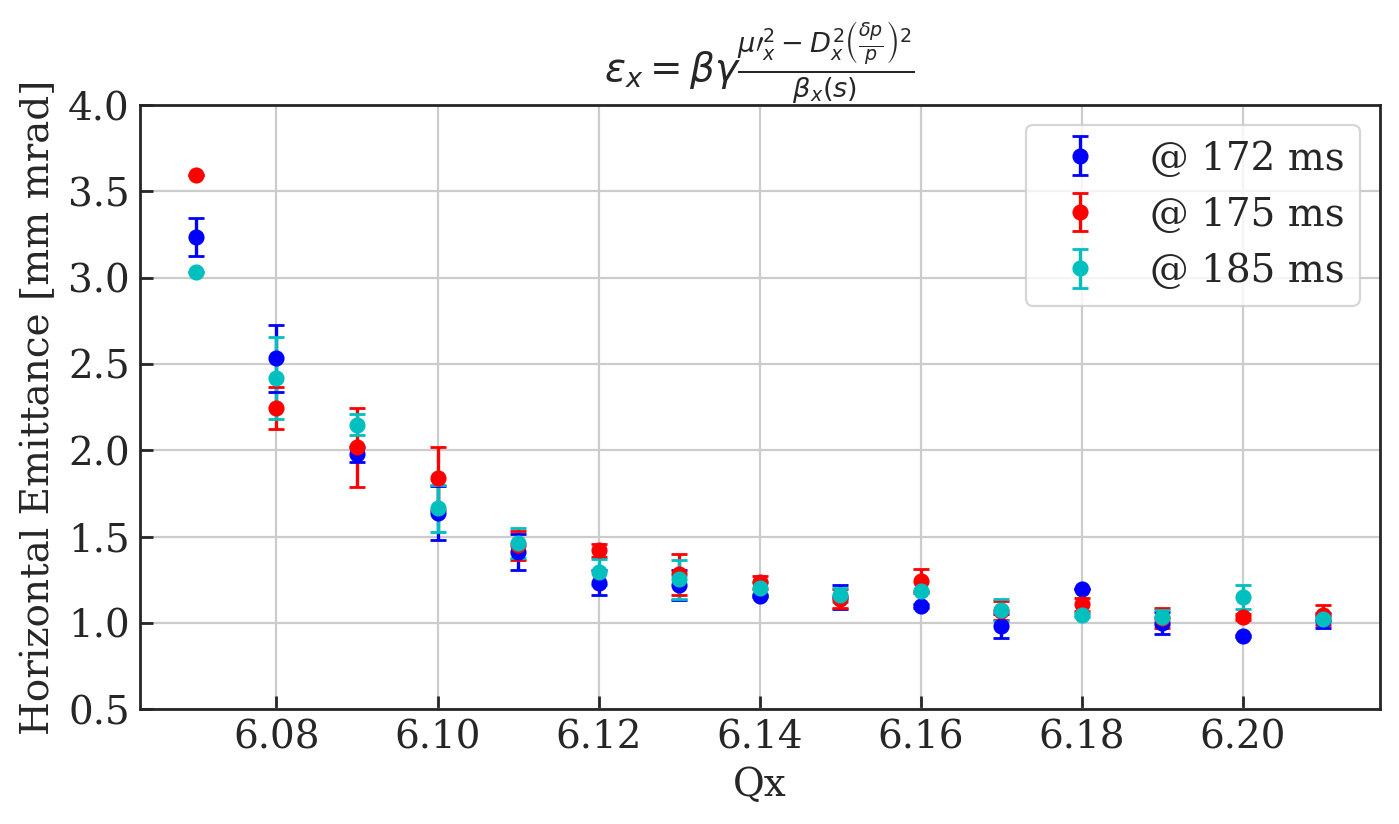

In [17]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='@ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='@ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p}\right)^2}{\beta_{x}(s)}$')

plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_2nd_Errors_Using_Sim_Optics.png');

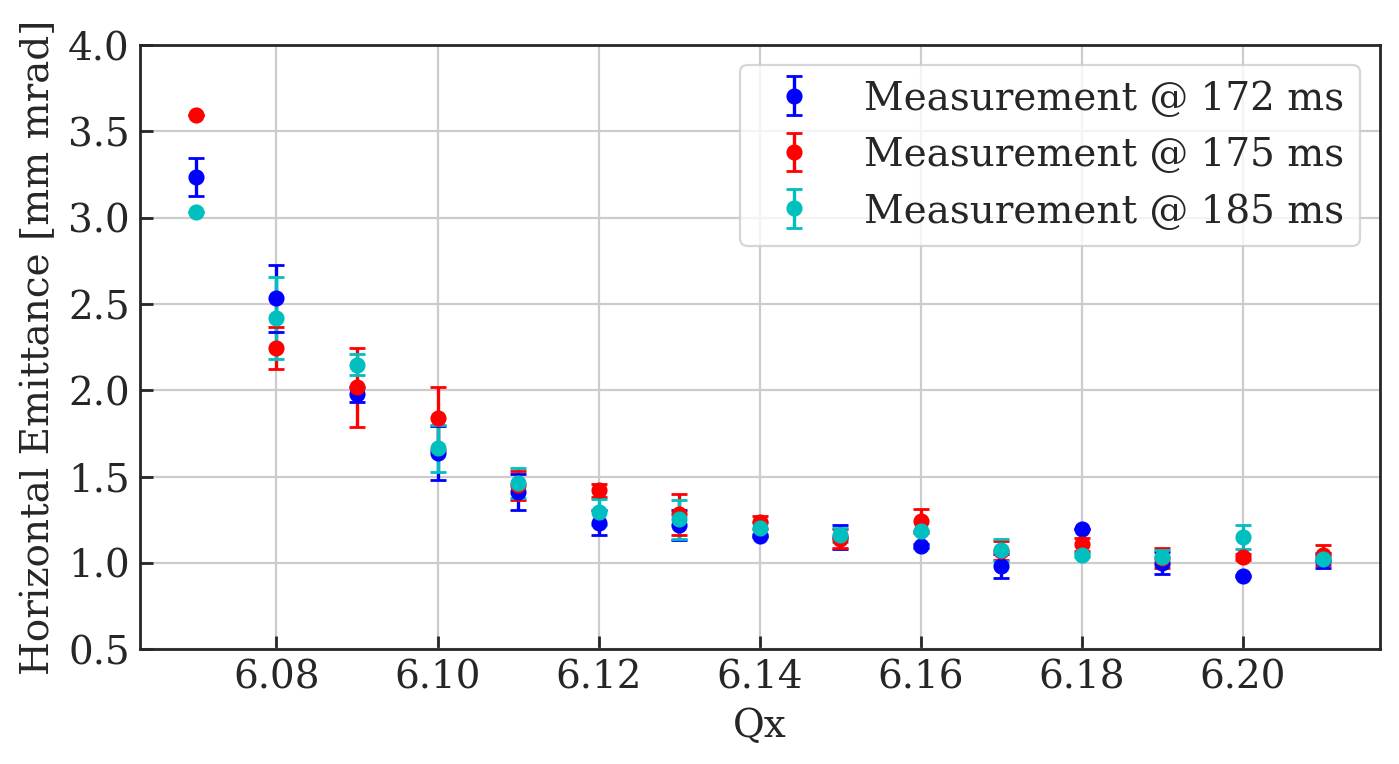

In [18]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='Measurement @ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='Measurement @ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

#plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p}\right)^2}{\beta_{x}(s)}$')

plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('00_MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_2nd_Errors_Using_Sim_Optics.png');

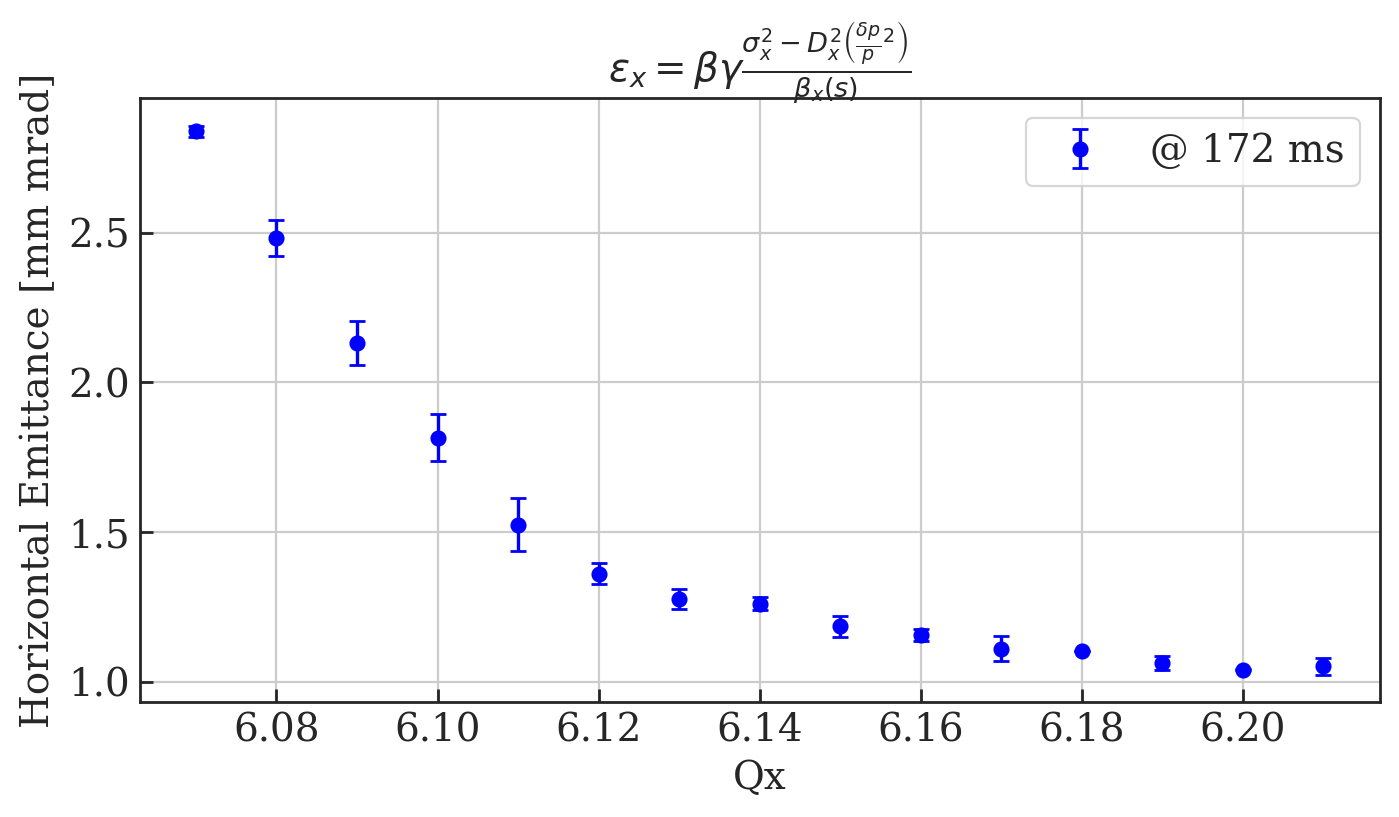

In [19]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
        
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');
plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\sigma_x^2 - D_x^2 \left(\frac{\delta p}{p}^2 \right)}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\sigma^2}{\beta_{x,y}(s)}$')

#plt.ylim(0, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_Errors_Using_Sim_Optics_172.png');

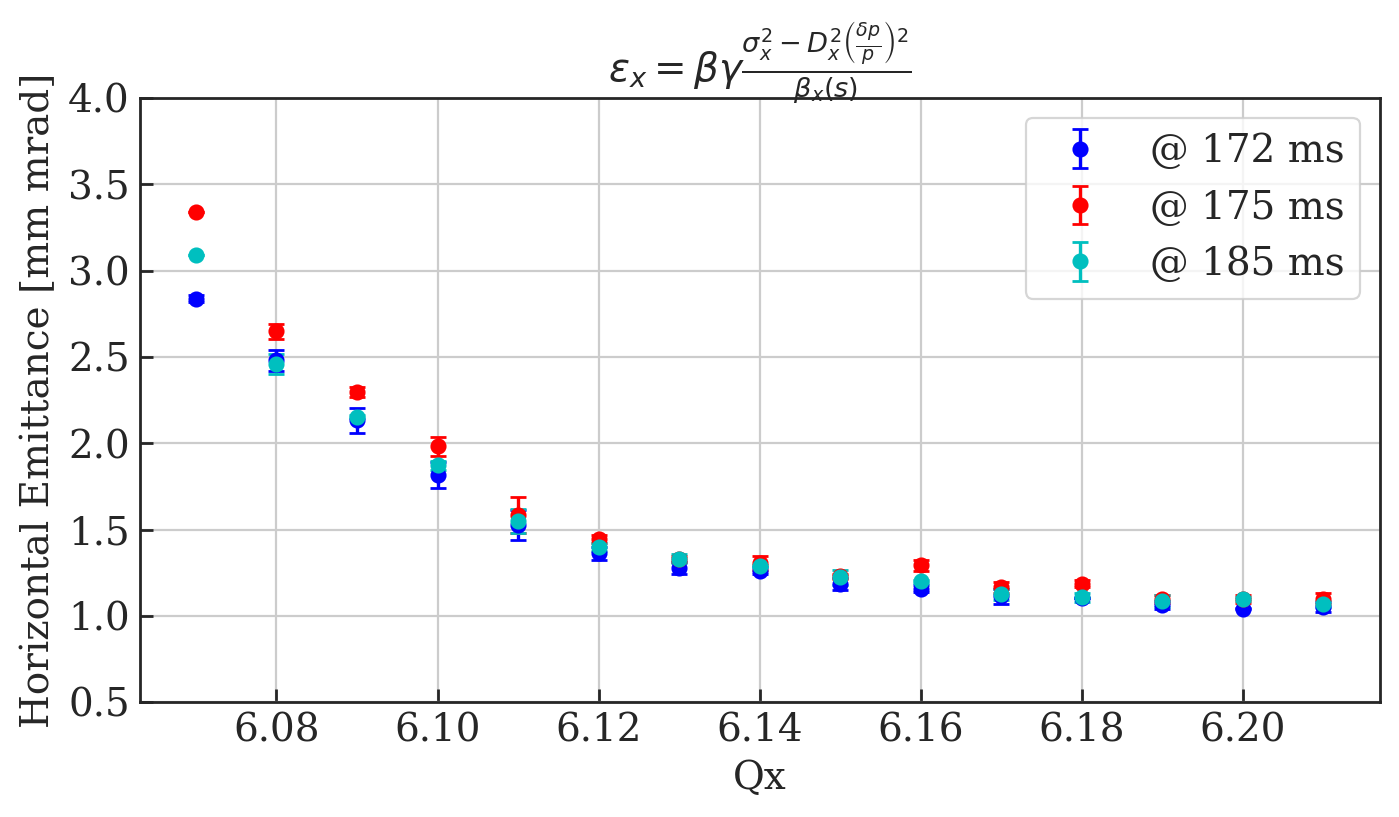

In [20]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='@ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='@ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\sigma_x^2 - D_x^2 \left(\frac{\delta p}{p}\right)^2}{\beta_{x}(s)}$')

plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_Errors_Using_Sim_Optics.png');

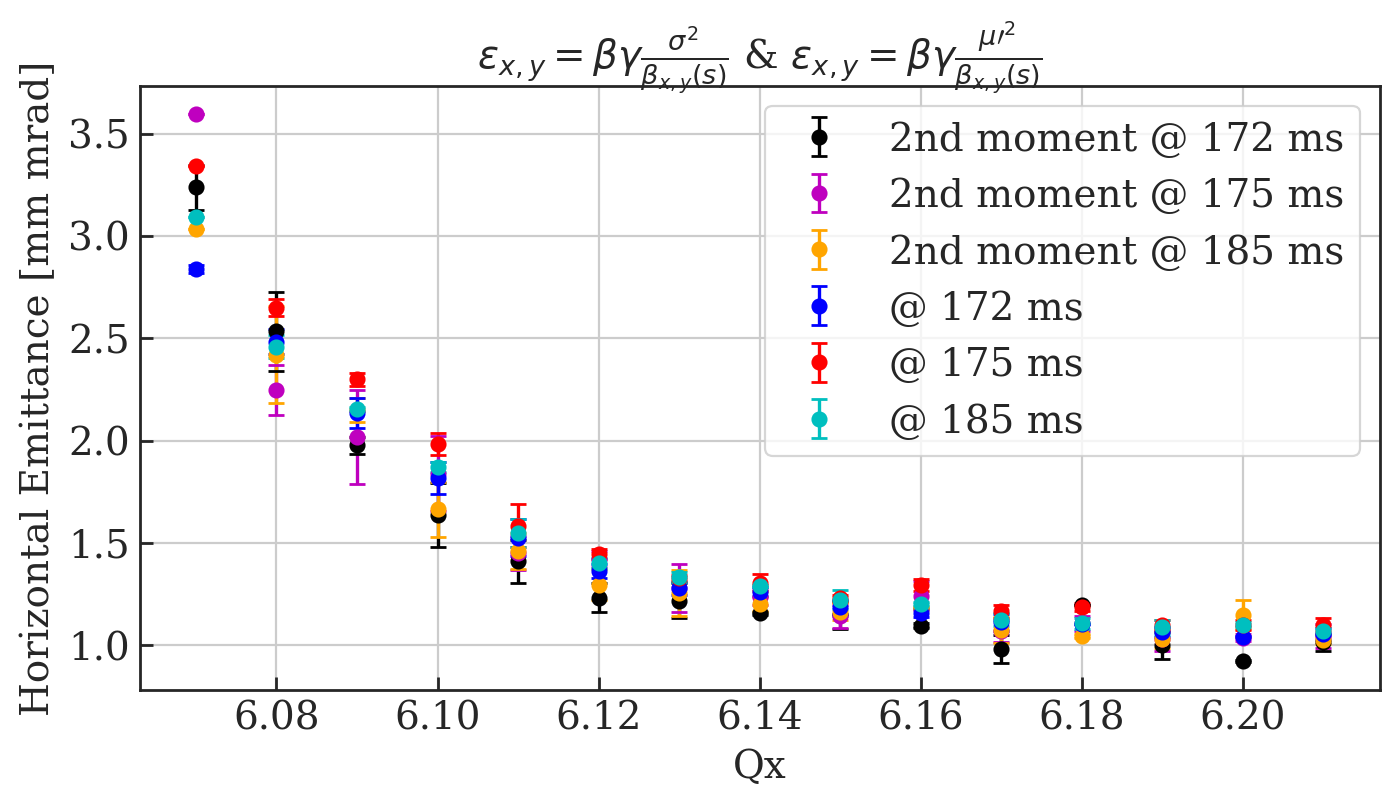

In [21]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

y_data_1722 = []
y_data_1752 = []
y_data_1852 = []

y_error_1722 = []
y_error_1752 = []
y_error_1852 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_data_1722.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_1752.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_1852.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_1722.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_1752.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_1852.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_1722, y_error_1722, label='2nd moment @ 172 ms', linestyle='None', marker='o', capsize=3, color='k')
plt.errorbar(x_data, y_data_1752, y_error_1752, label='2nd moment @ 175 ms', linestyle='None', marker='o', capsize=3, color='m')
plt.errorbar(x_data, y_data_1852, y_error_1852, label='2nd moment @ 185 ms', linestyle='None', marker='o', capsize=3, color='orange')

    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='@ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='@ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\sigma^2}{\beta_{x,y}(s)}$ & $\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2}{\beta_{x,y}(s)}$')

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_both_Errors_Using_Sim_Optics.png');

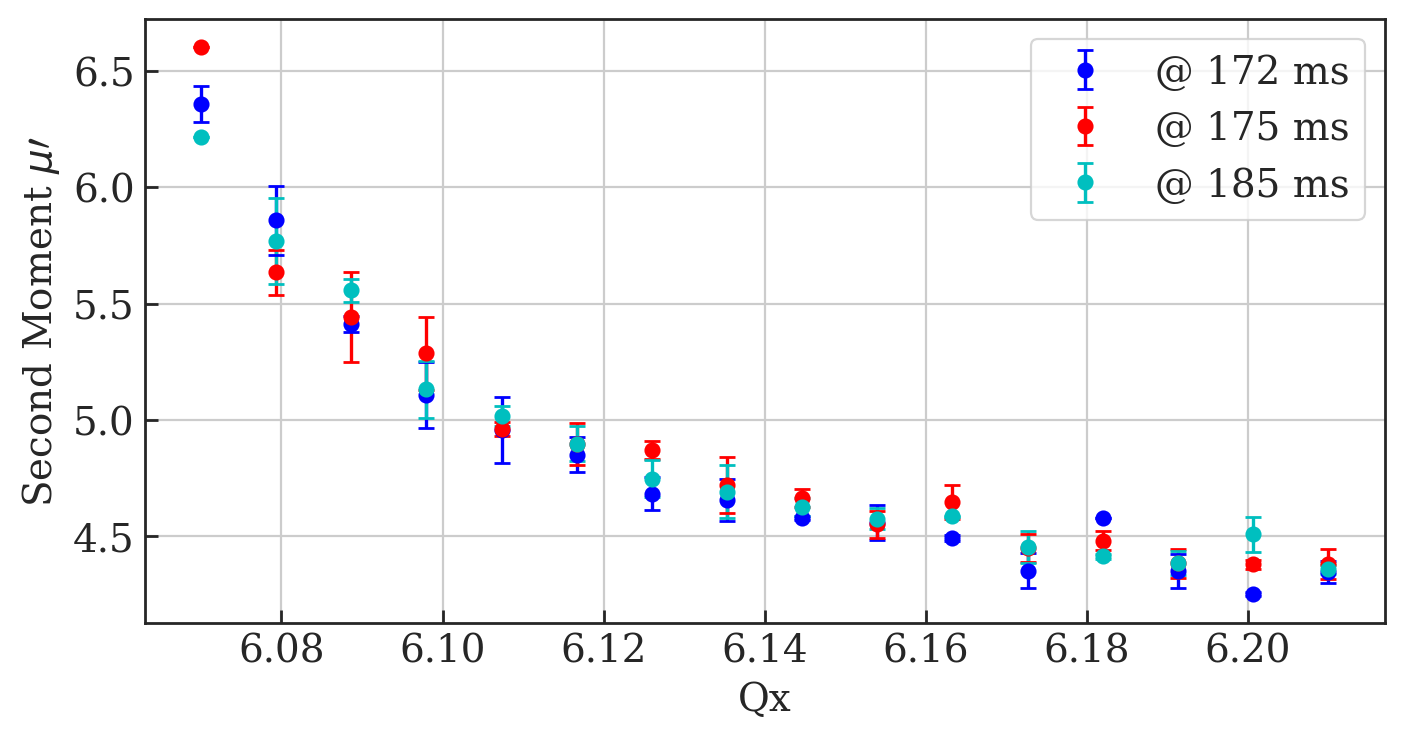

In [22]:
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
# Plot averaged data points with error bars
x_data = np.linspace(607, 621, 16);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='@ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='@ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel(r'Second Moment $\mu\prime$');

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_2nd_Moment_Errors_Using_Sim_Optics.png');

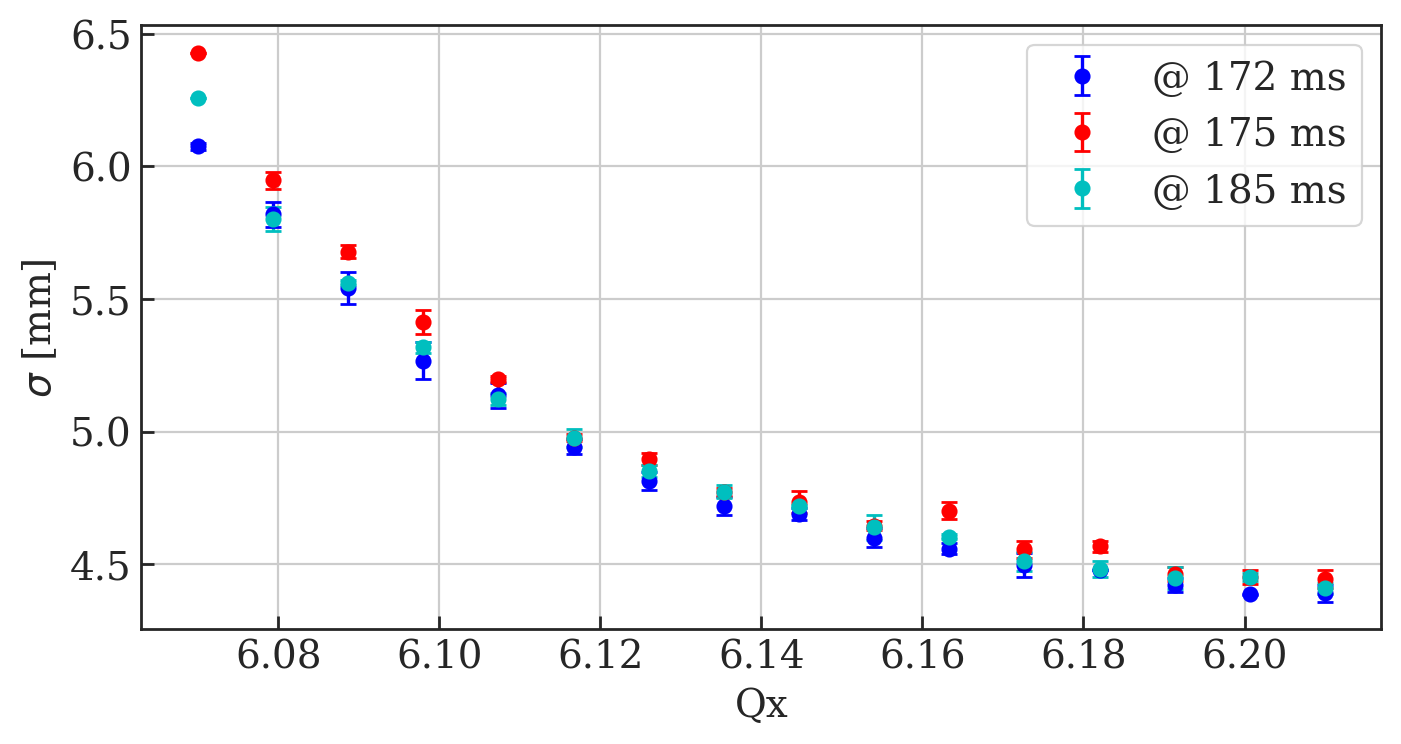

In [23]:
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
# Plot averaged data points with error bars
x_data = np.linspace(607, 621, 16);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='@ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='@ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel(r'$\sigma$ [mm]');

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Sigma_Errors_Using_Sim_Optics.png');

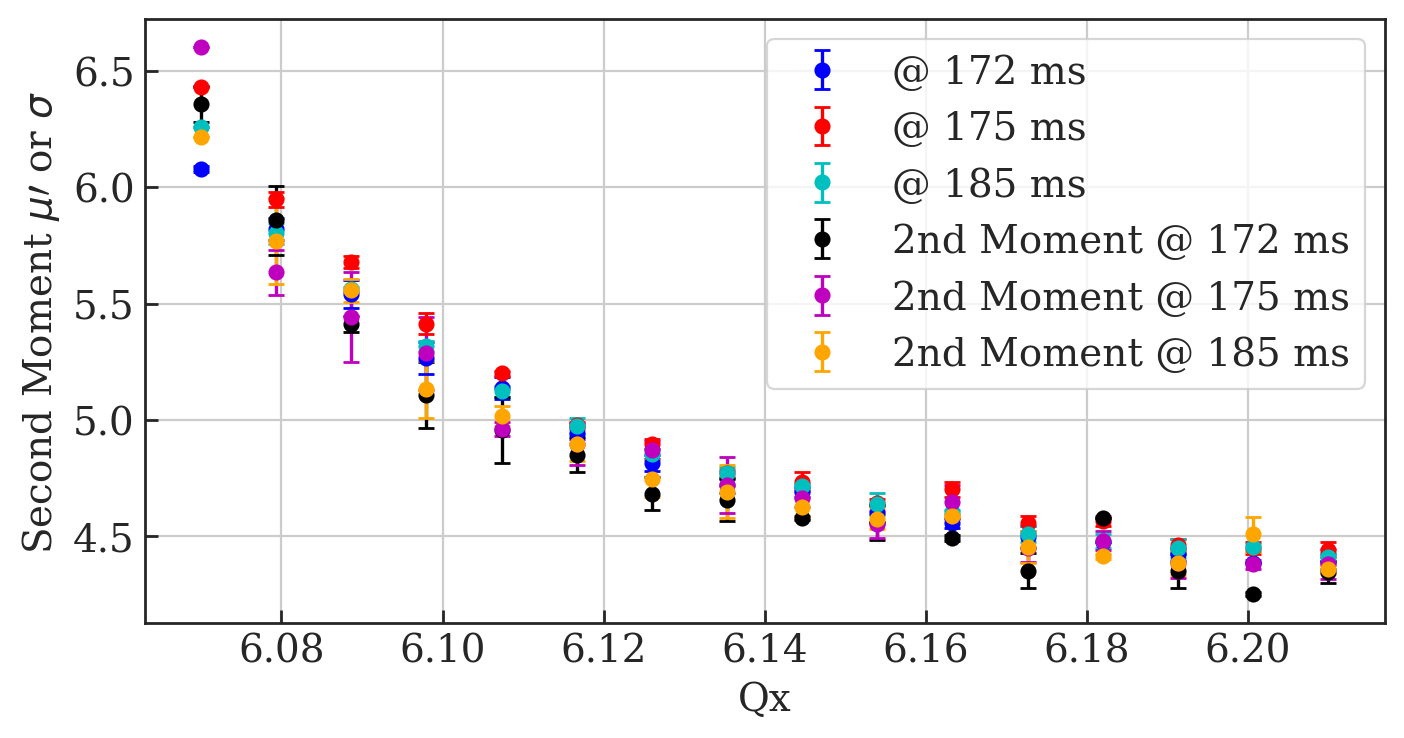

In [24]:
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
# Plot averaged data points with error bars
x_data = np.linspace(607, 621, 16);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

y_data_1722 = []
y_data_1752 = []
y_data_1852 = []

y_error_1722 = []
y_error_1752 = []
y_error_1852 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_1722.append( np.mean( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_1752.append( np.mean( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_1852.append( np.mean( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_1722.append( np.std( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_1752.append( np.std( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_1852.append( np.std( df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_data_172.append( np.mean( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='@ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='@ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

    
plt.errorbar(x_data, y_data_1722, y_error_1722, label='2nd Moment @ 172 ms', linestyle='None', marker='o', capsize=3, color='k')
plt.errorbar(x_data, y_data_1752, y_error_1752, label='2nd Moment @ 175 ms', linestyle='None', marker='o', capsize=3, color='m')
plt.errorbar(x_data, y_data_1852, y_error_1852, label='2nd Moment @ 185 ms', linestyle='None', marker='o', capsize=3, color='orange')

plt.xlabel('Qx');
plt.ylabel(r'Second Moment $\mu\prime$ or $\sigma$');

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_2nd_Moment_and_Sigma_Errors_Using_Sim_Optics.png');

In [25]:
np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>.05)][(df0['Qx']<.1045)] )

2.202622639850918

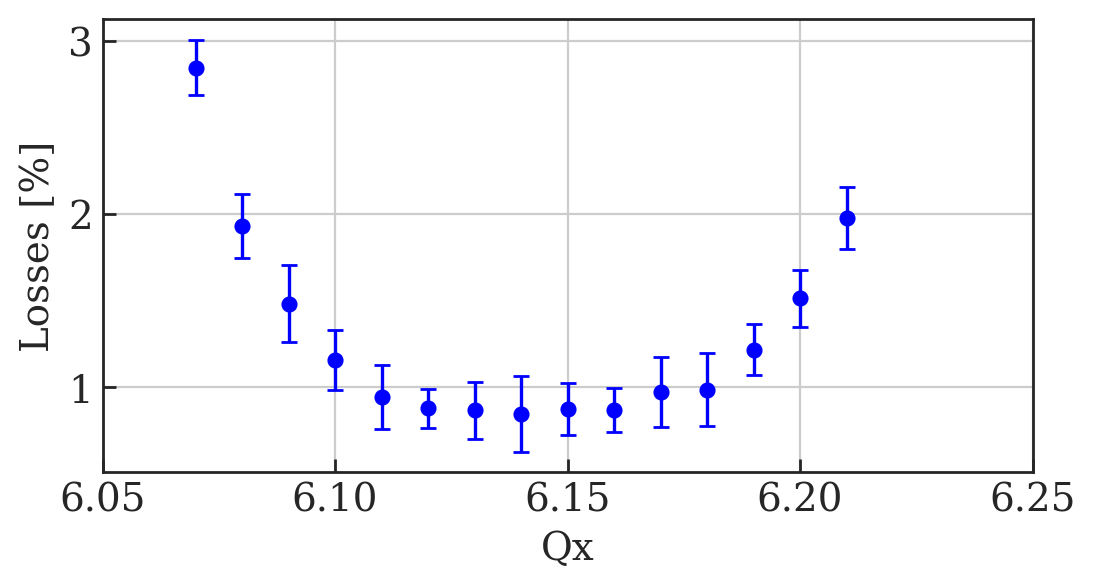

In [26]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(6, 3), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['losses'][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['losses'][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
plt.errorbar(x_data, y_data_172, y_error_172, label='@ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.xlabel('Qx');
plt.ylabel('Losses [%]');
plt.xlim(6.05, 6.25)

#plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Losses_Errors_Using_Sim_Optics.png');

# Load Distributions From Simulation Data

In [27]:
# Read .mat files into a dictionary

# matfiles = glob.glob("13_May/*.mat")
#matfiles = glob.glob("../Simulation_Output/V_Scan_Matched_Initial/Bunch_Profiles/*.mat")
matfiles = glob.glob("../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/*.mat")
sims = dict()

for f in matfiles:
    first = f.split('/')[-1]
    second = first.split('.')[0]
    sims[str(second)] = f
    
sims

{'607_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/607_SbS_c172.mat',
 '608_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/608_SbS_c172.mat',
 '609_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/609_SbS_c172.mat',
 '610_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/610_SbS_c172.mat',
 '611_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/611_SbS_c172.mat',
 '612_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/612_SbS_c172.mat',
 '613_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/613_SbS_c172.mat',
 '614_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/614_SbS_c172.mat',
 '615_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/615_SbS_c172.mat',
 '616_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/616_SbS_c172.mat',
 '617_SbS_c172': '../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/617_SbS

# Dictionary of tune points

In [28]:
# These are our tune points:
scan_points = np.linspace(607, 621, 15);
scan_points = scan_points/100;

Qy_points=[]
for i in scan_points:
    Qy_points.append(round_sig(i,5))
print Qy_points

[6.07, 6.08, 6.09, 6.1, 6.11, 6.12, 6.13, 6.14, 6.15, 6.16, 6.17, 6.18, 6.19, 6.2, 6.21]


In [29]:
# Make dictionary of nearest tune point and iterators
Qy_point_separation = Qy_points[1] - Qy_points[0]
Qy_pt_sep = Qy_point_separation/2
print 'Tune points separated by +/- ', Qy_pt_sep

tune_points = {}
for i in Qy_points:
    tune_points[i] = np.where(np.logical_and(np.greater_equal(df0['Qx'], (i-Qy_pt_sep-6)), np.less_equal(df0['Qx'], (i+Qy_pt_sep-6)) ) )[0]
tune_points

Tune points separated by +/-  0.005


{6.07: array([187, 202, 209, 217]),
 6.08: array([  8,  15,  23,  31,  39,  46,  54,  62,  76,  84,  91,  99, 107,
        114, 128, 136, 142, 148, 155, 163, 171, 179]),
 6.09: array([186, 194, 201, 208, 216, 224]),
 6.1: array([  7,  14,  22,  30,  38,  45,  53,  61,  69,  75,  83,  90,  98,
        106, 113, 121, 127, 135, 141, 154, 162, 170, 178]),
 6.11: array([  6,  21,  29,  37,  52,  60,  68,  82,  89,  97, 105, 112, 120,
        134, 140, 153, 161, 169, 177, 185, 193, 200, 207, 215, 223]),
 6.12: array([ 44, 184, 192, 199, 206, 214, 222]),
 6.13: array([  5,  13,  20,  28,  36,  43,  51,  59,  67,  74,  81,  96, 104,
        111, 119, 126, 133, 147, 160, 168, 176]),
 6.14: array([183, 191, 198, 205, 213, 221]),
 6.15: array([  4,  12,  19,  27,  35,  50,  58,  66,  73,  80,  88,  95, 103,
        110, 118, 125, 132, 146, 152, 159, 167, 175]),
 6.16: array([182, 190, 197, 204, 212, 220]),
 6.17: array([  3,  11,  18,  26,  34,  42,  49,  57,  65,  72,  79,  87,  94,
        102,

# Function to find Peak

# Test Peakfinder

In [30]:
peak = peakfinder(np.array(df0['position H'].iloc[0]), np.array(df0['profile H'].iloc[0]),tolerance = 0.01, verbose=True)
print peak



	MAX(y_dat) =  0.6728868609218155
	index from y_dat peak not within tolerance of 0.01 mm. 
	try manual search
	index =  0
	index of x_dat =  -26.44740240003148  is  0
	Mean of peak point +/- 3 points =  -0.0009820836308117667
	 using peak value
0.6728868609218155


peak @ 77.65471725958027


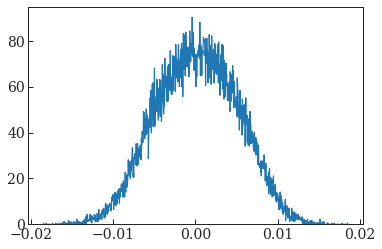

In [31]:
matfiles = glob.glob("../MD4224_Repo_Outputs/H_Mini_Optimised/Simulation_Profiles/*.mat")
plt.clf()

d = particles_from_matfile("../MD4224_Repo_Outputs/H_Mini_Optimised/Simulation_Profiles/610_SbS_c172.mat")
x, bins_, p = plt.hist(d['particles']['x'][0][0][0], bins = 1000, density=True, histtype=u'step', lw=0, color='k')
    
    
peak = peakfinder(np.array(bins_[:-1]), np.array(x))
print 'peak @', peak

plt.plot(bins_[:-1], x);

# Check all simulation data peaks

In [32]:
for key, value in sorted(sims.iteritems()):
    print value
    d = particles_from_matfile(value)
    plt.clf()
    x, bins_, p = plt.hist(d['particles']['x'][0][0][0], bins = 1000, density=True, histtype=u'step', lw=0, color='k')

    peak = peakfinder(np.array(bins_[:-1]), np.array(x), verbose=True)
    print '\n peak = ', peak, '\n'
    plt.close()

../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/607_SbS_c172.mat

	MAX(y_dat) =  64.42944157795411
	x_dat[index] =  -0.000292514120672948
	index of x_dat =  -0.000292514120672948  is  508
	Mean of peak point +/- 3 points =  61.34671946919285

 peak =  61.34671946919285 

../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/608_SbS_c172.mat

	MAX(y_dat) =  65.41413715760194
	x_dat[index] =  0.0006638845231837914
	index of x_dat =  0.0006638845231837914  is  526
	Mean of peak point +/- 3 points =  62.559975207179356

 peak =  62.559975207179356 

../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/609_SbS_c172.mat

	MAX(y_dat) =  69.8710719234777
	x_dat[index] =  0.0007640160130786382
	index of x_dat =  0.0007640160130786382  is  523
	Mean of peak point +/- 3 points =  66.77818745201665

 peak =  66.77818745201665 

../MD4224_Repo_Outputs/H_Optimised/Simulation_Profiles/610_SbS_c172.mat

	MAX(y_dat) =  76.09938960471351
	x_dat[index] =  0.0017133965664727496
	index of x_dat =

# Plot wirescanner profiles with simulation data


Importing simulation file: 607_SbS_c172
Qx =  6.07 , ctime = 172.0 [ms]
[187, 209]
	 using peak value

Importing simulation file: 608_SbS_c172
Qx =  6.08 , ctime = 172.0 [ms]
[8, 31, 54, 76, 99, 142, 163]
	 using peak value

Importing simulation file: 609_SbS_c172
Qx =  6.09 , ctime = 172.0 [ms]
[186, 208]

Importing simulation file: 610_SbS_c172
Qx =  6.1 , ctime = 172.0 [ms]
[7, 30, 53, 75, 98, 121, 141, 162]
	 using peak value
	 using peak value
	 using peak value
	 using peak value
	 using peak value
	 using peak value
	 using peak value
	 using peak value

Importing simulation file: 611_SbS_c172
Qx =  6.11 , ctime = 172.0 [ms]
[6, 29, 52, 97, 120, 140, 161, 185, 207]
	 using peak value
	 using peak value
	 using peak value
	 using peak value

Importing simulation file: 612_SbS_c172
Qx =  6.12 , ctime = 172.0 [ms]
[184, 206]

Importing simulation file: 613_SbS_c172
Qx =  6.13 , ctime = 172.0 [ms]
[5, 28, 51, 74, 96, 119, 160]
	 using peak value
	 using peak value
	 using peak valu

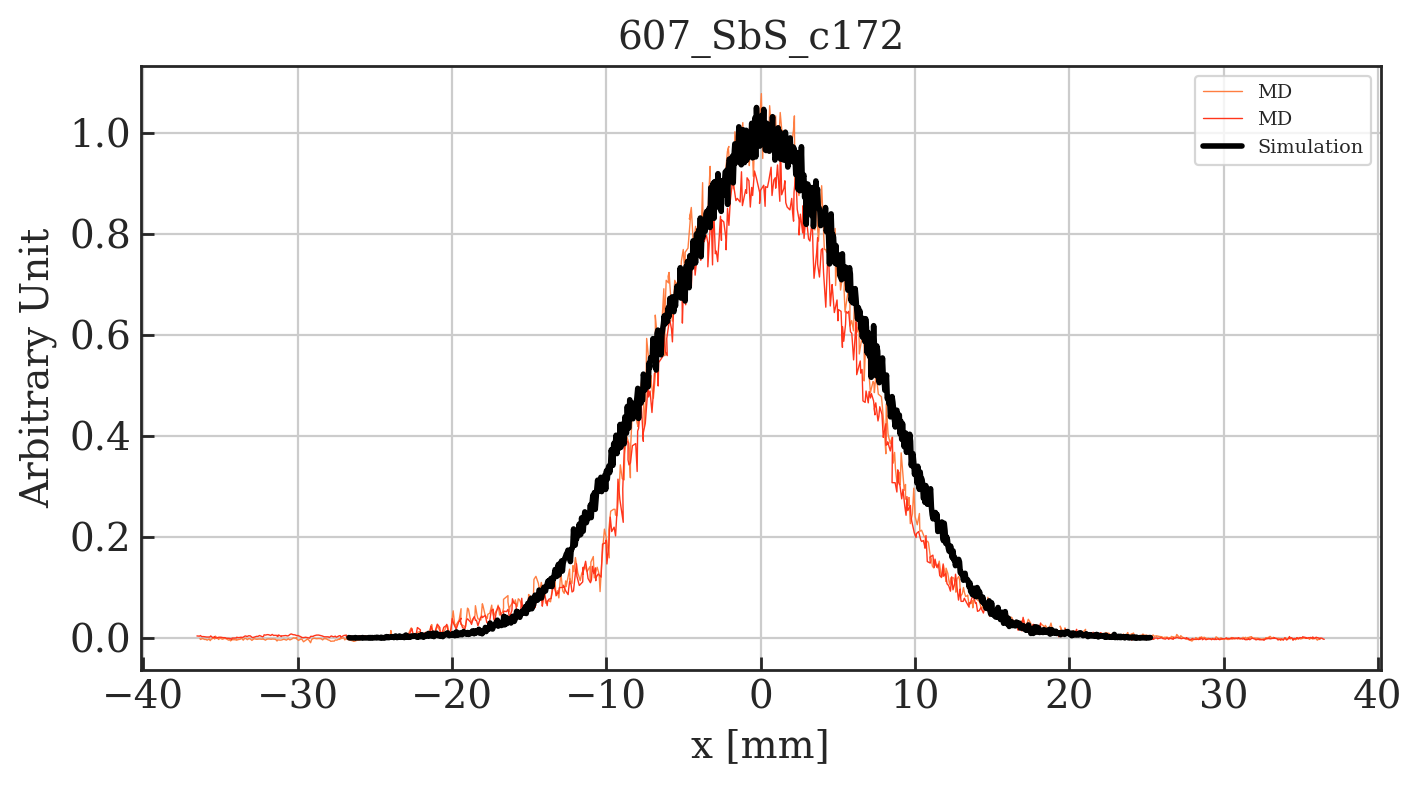

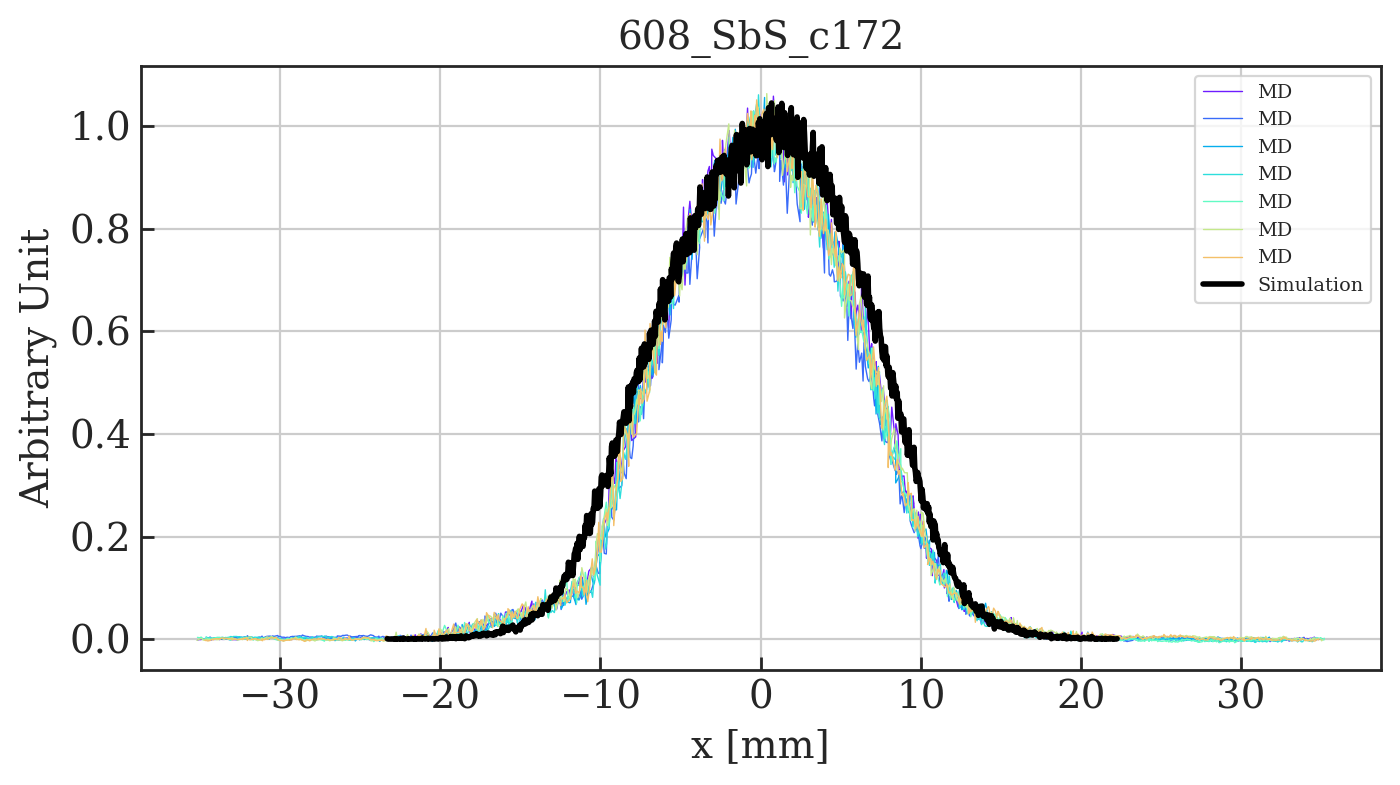

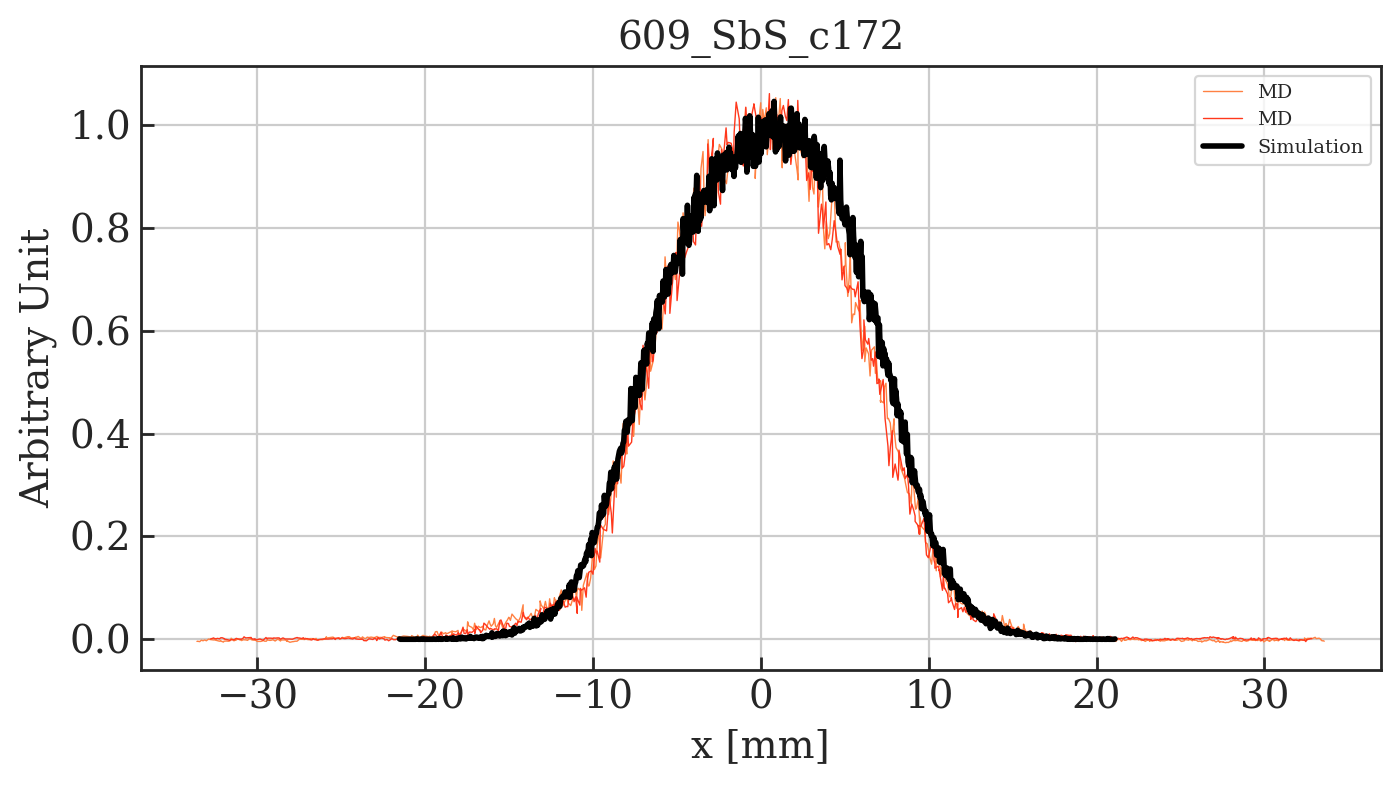

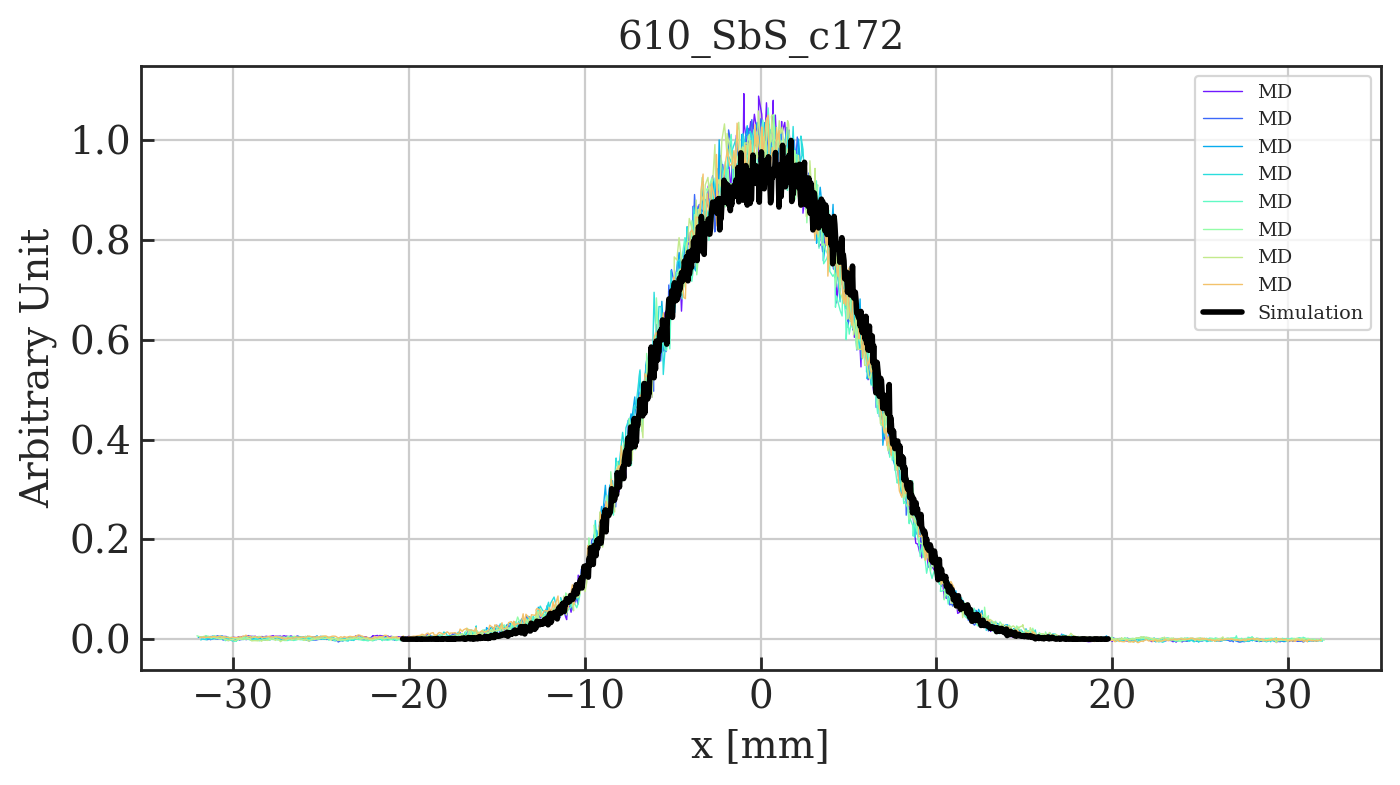

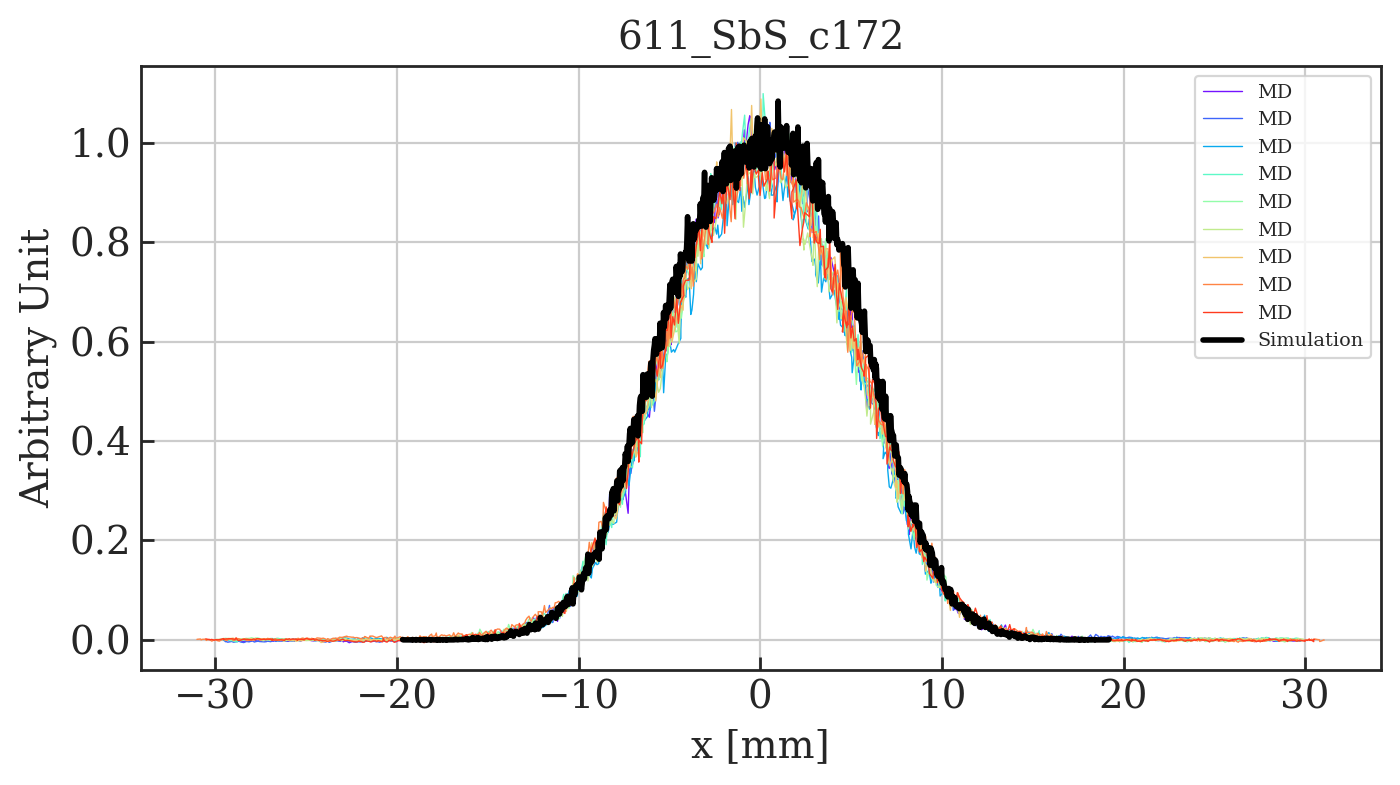

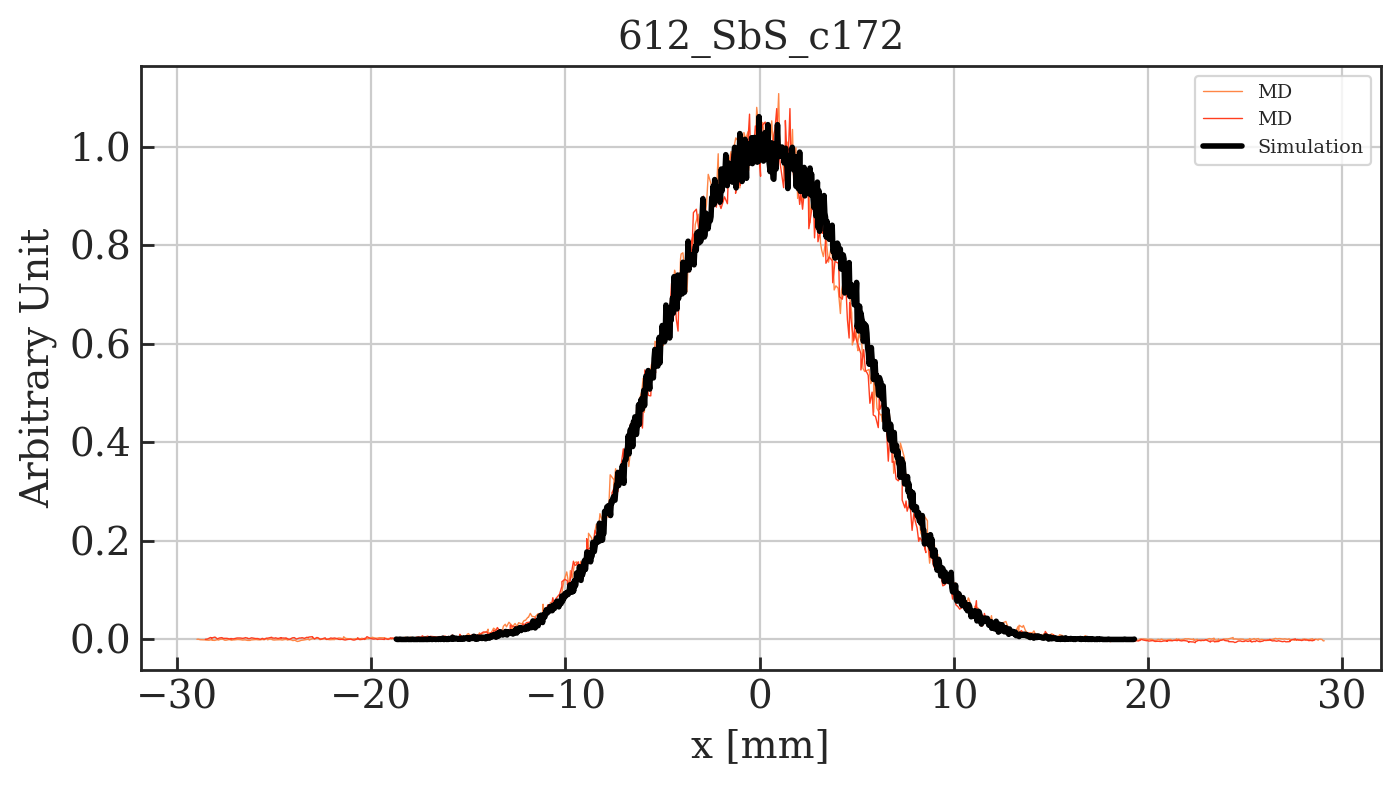

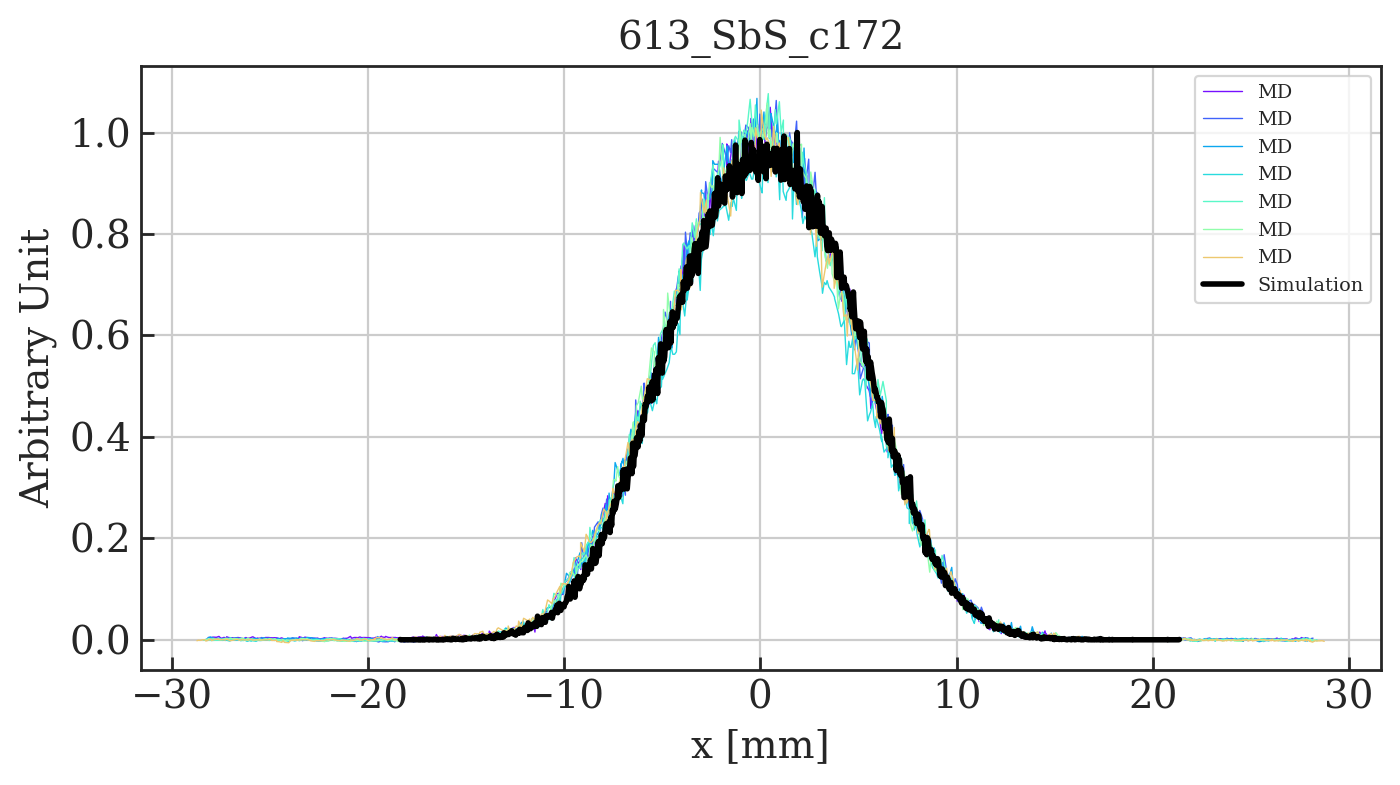

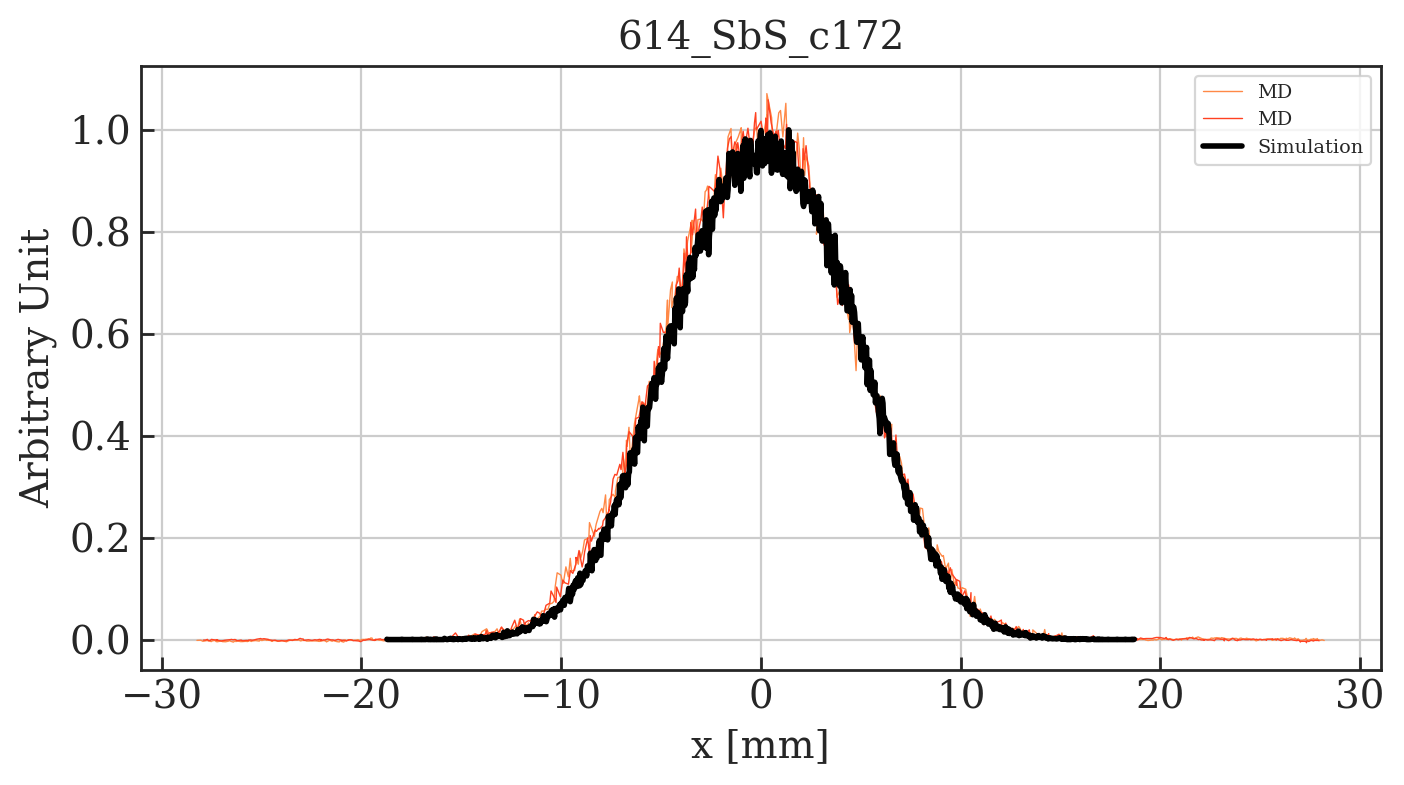

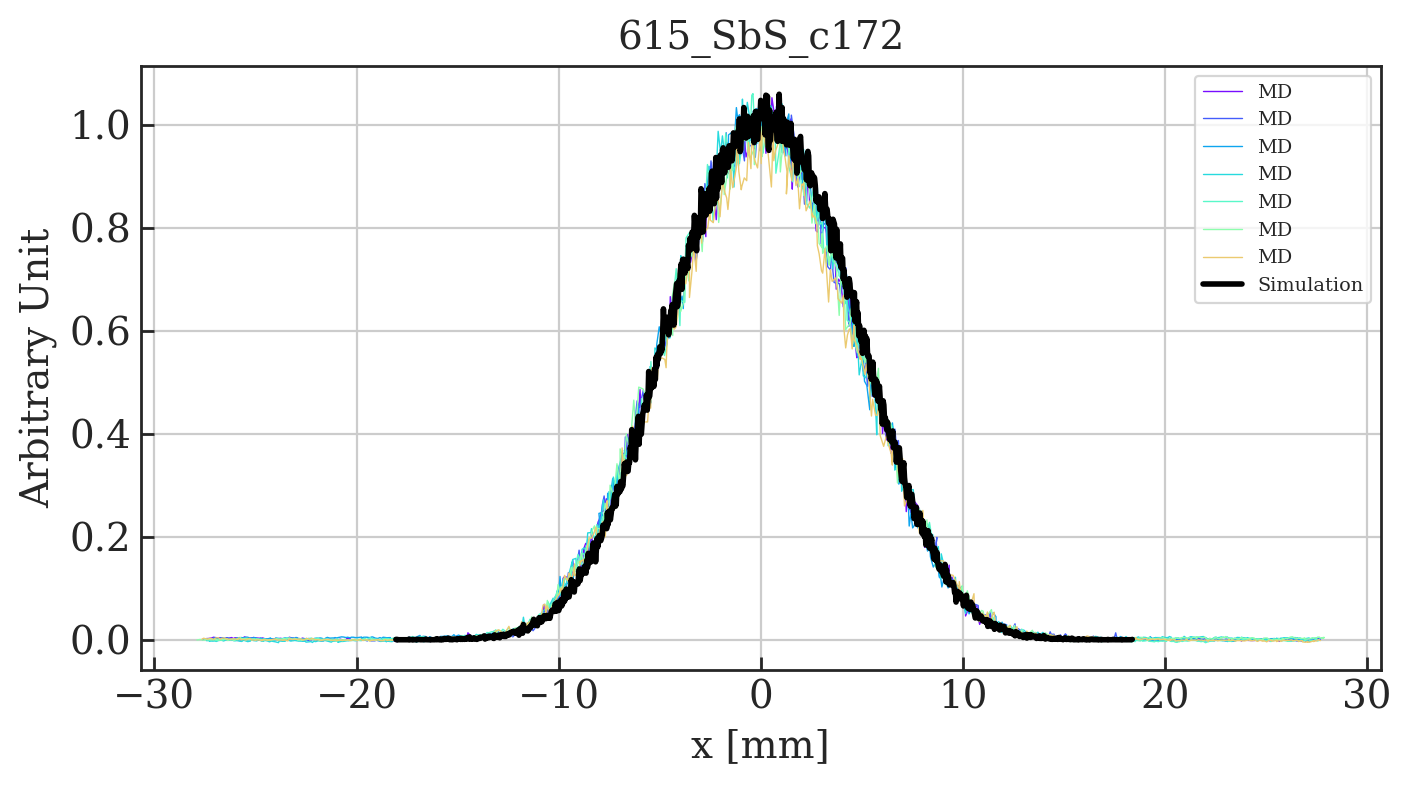

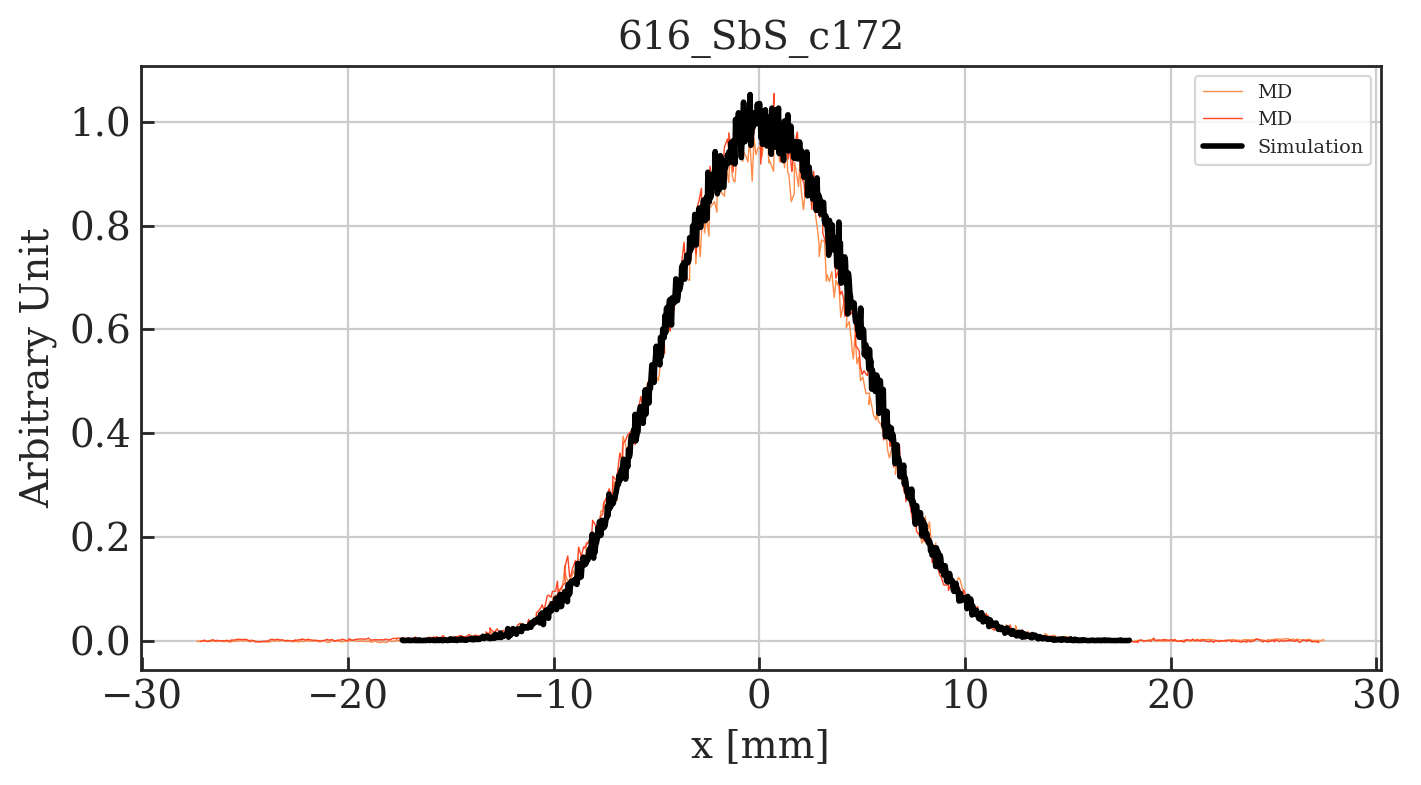

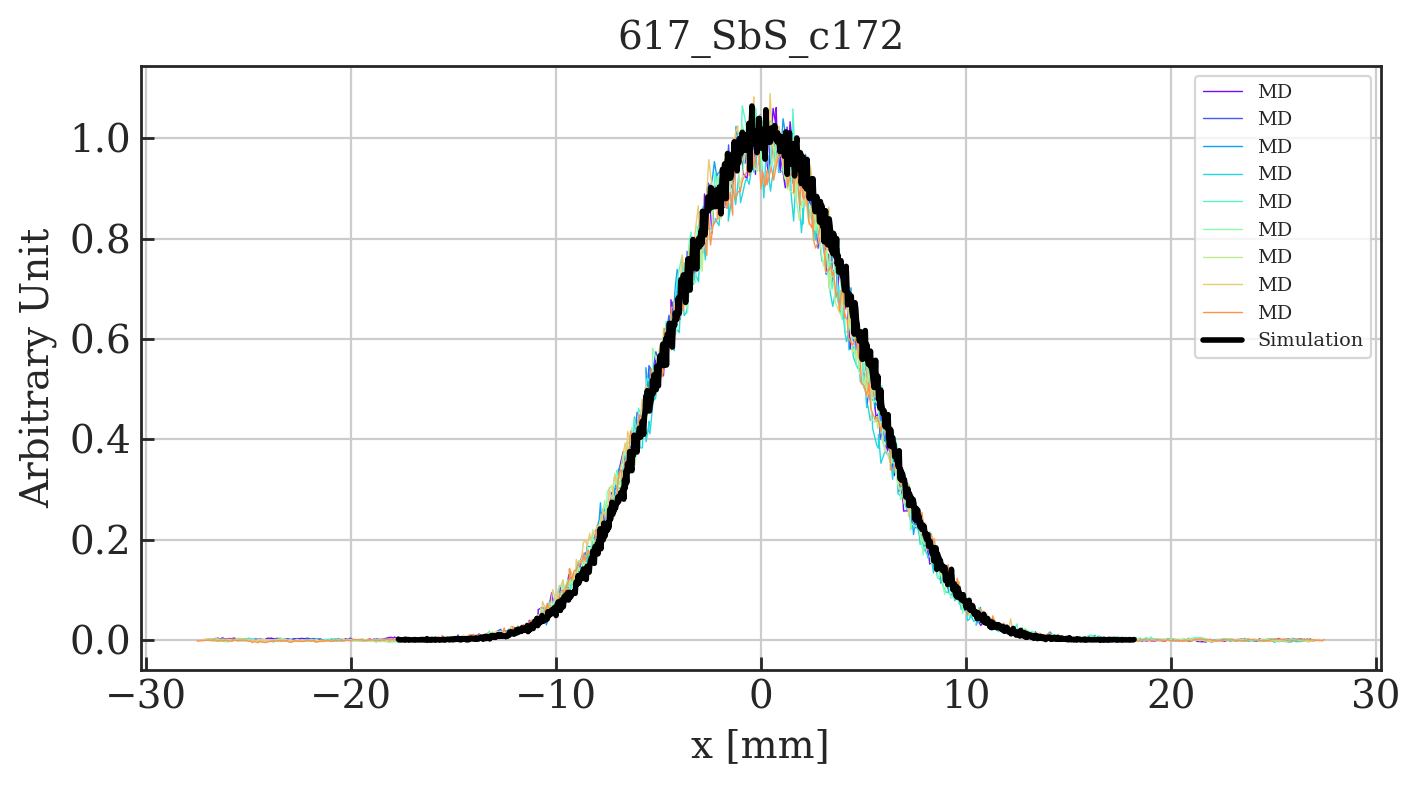

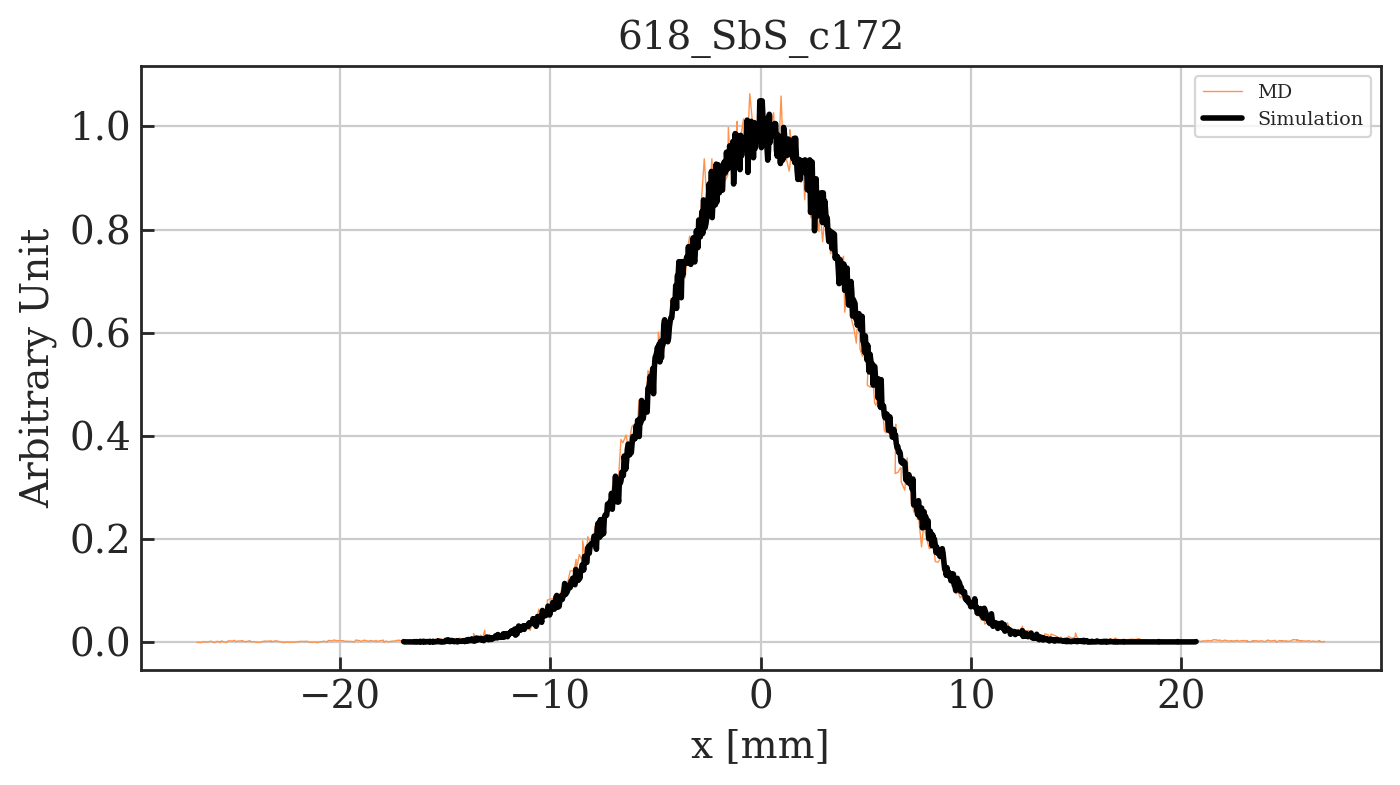

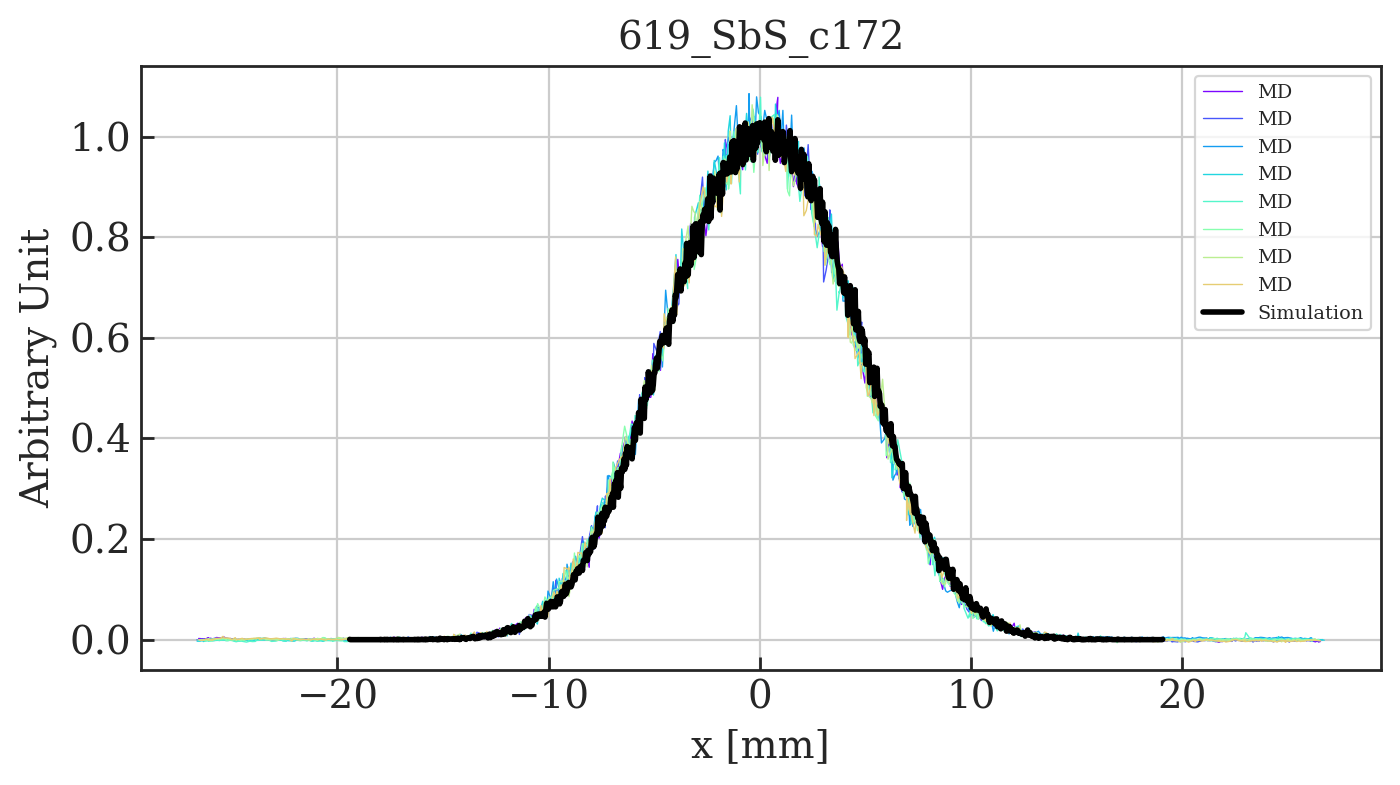

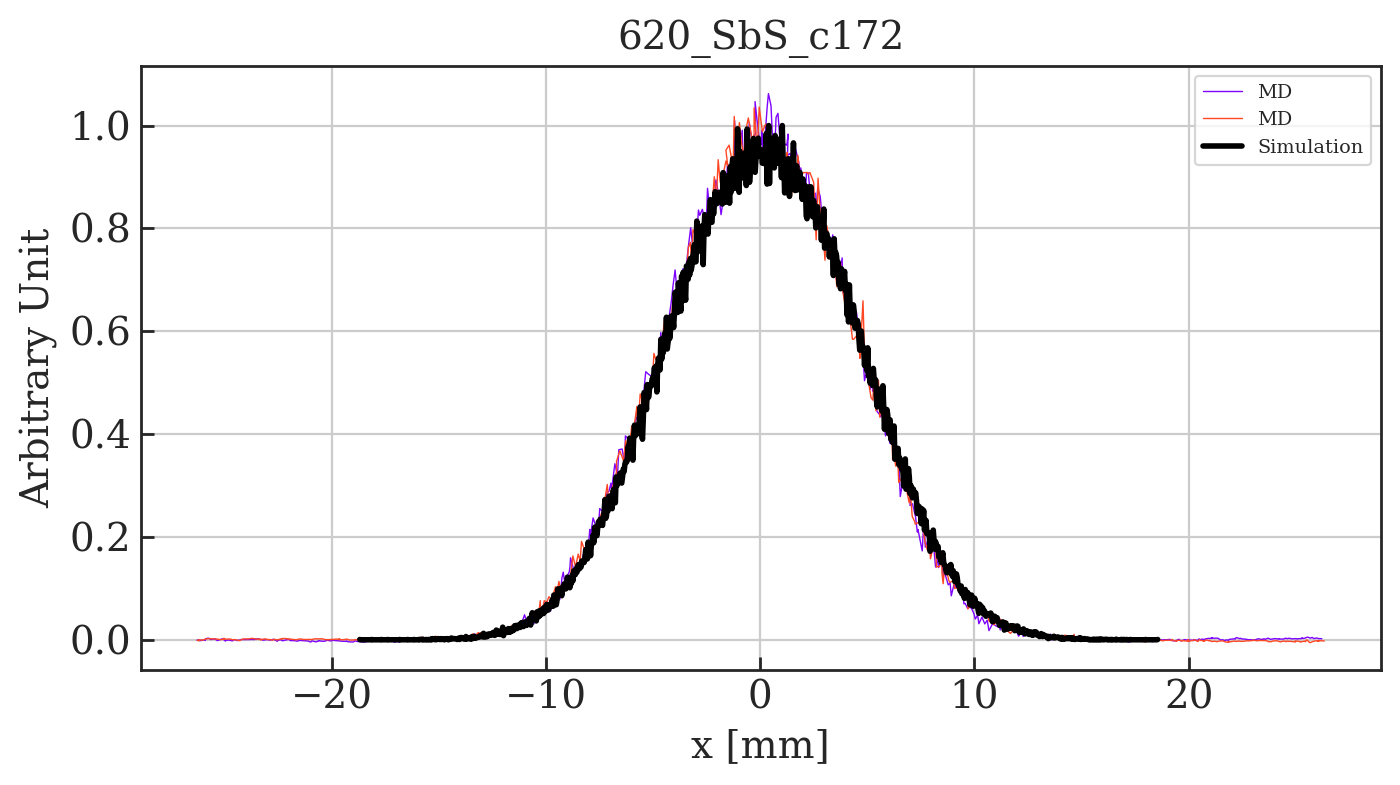

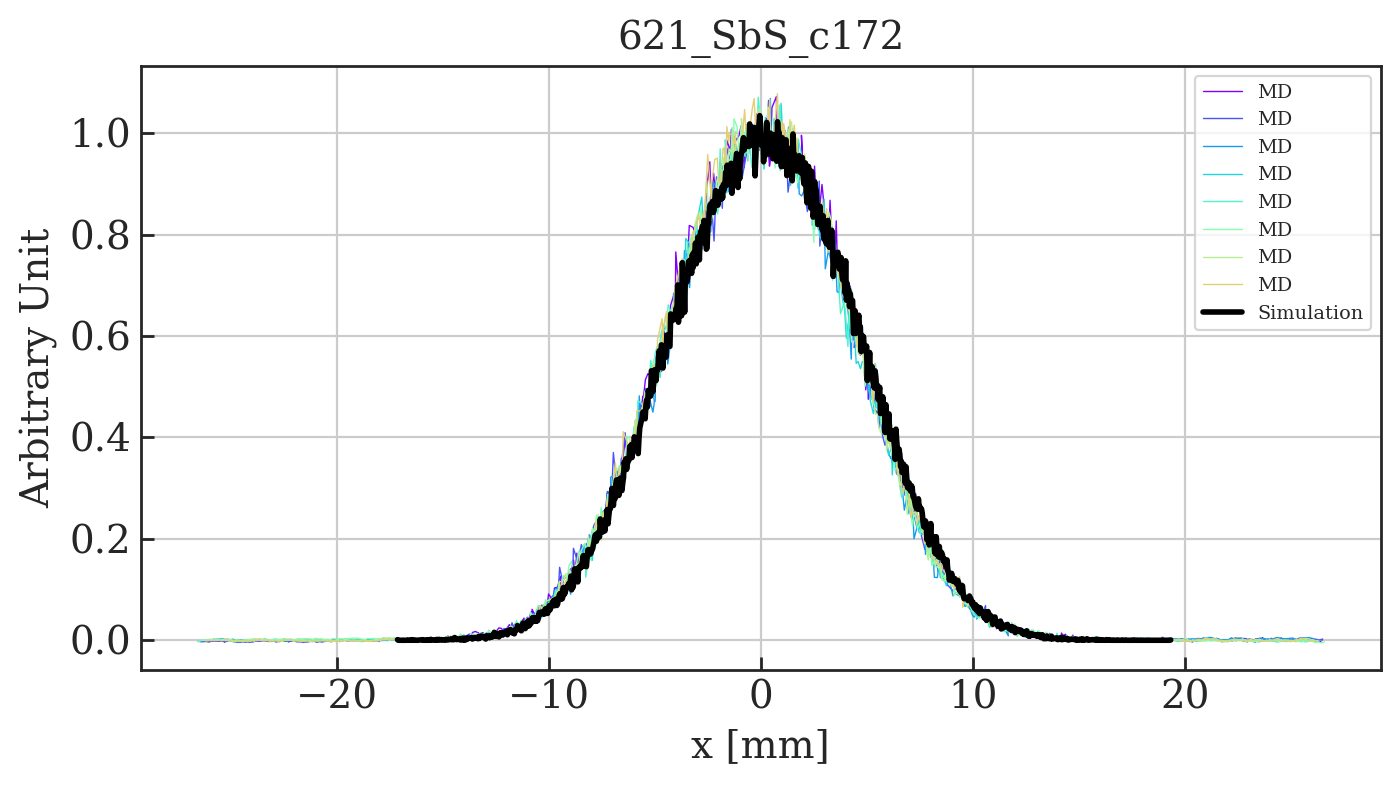

In [33]:
#Main function
verbose = True

for key, value in sorted(sims.iteritems()):
    if verbose: print '\nImporting simulation file:', key
    
    tune_x = float(key.split('_')[0])/100
    ctime = (key.split('_')[2])
    time = float(ctime.split('c')[1])
    if verbose: print 'Qx = ', tune_x, ', ctime =', time, '[ms]'
        
    d = particles_from_matfile(value)
        
    # Find MD data with same tune and ctime
    
    md_points = []
    for i in tune_points[tune_x]:
        if df0['PR.BWS.65.H_ROT:ACQ_DELAY'].iloc()[i] == time:
            md_points.append(i)
            
    if verbose: print md_points
        
    # Plot data
    main_label = key
    Plot_profiles_MD_cf_Sims(d, df0, md_points, 0, main_label, bins=1000)  

# Compare SC Models only


Importing simulation file: 607_SbS_c172
Qx =  6.07 , ctime = 172.0 [ms], label =  SbS
[187, 209]

	MAX(y_dat) =  0.06442944157795462
	x_dat[index] =  -0.2925141206729478
	index of x_dat =  -0.2925141206729478  is  508
	Mean of peak point +/- 3 points =  0.06134671946919278

Importing simulation file: 608_SbS_c172
Qx =  6.08 , ctime = 172.0 [ms], label =  SbS
[8, 31, 54, 76, 99, 142, 163]

	MAX(y_dat) =  0.06541413715760237
	x_dat[index] =  0.6638845231837927
	index of x_dat =  0.6638845231837927  is  526
	Mean of peak point +/- 3 points =  0.06255997520717907

Importing simulation file: 609_SbS_c172
Qx =  6.09 , ctime = 172.0 [ms], label =  SbS
[186, 208]

	MAX(y_dat) =  0.06987107192347927
	x_dat[index] =  0.7640160130786384
	index of x_dat =  0.7640160130786384  is  523
	Mean of peak point +/- 3 points =  0.06677818745201666

Importing simulation file: 610_SbS_c172
Qx =  6.1 , ctime = 172.0 [ms], label =  SbS
[7, 30, 53, 75, 98, 121, 141, 162]

	MAX(y_dat) =  0.07609938960471871
	in

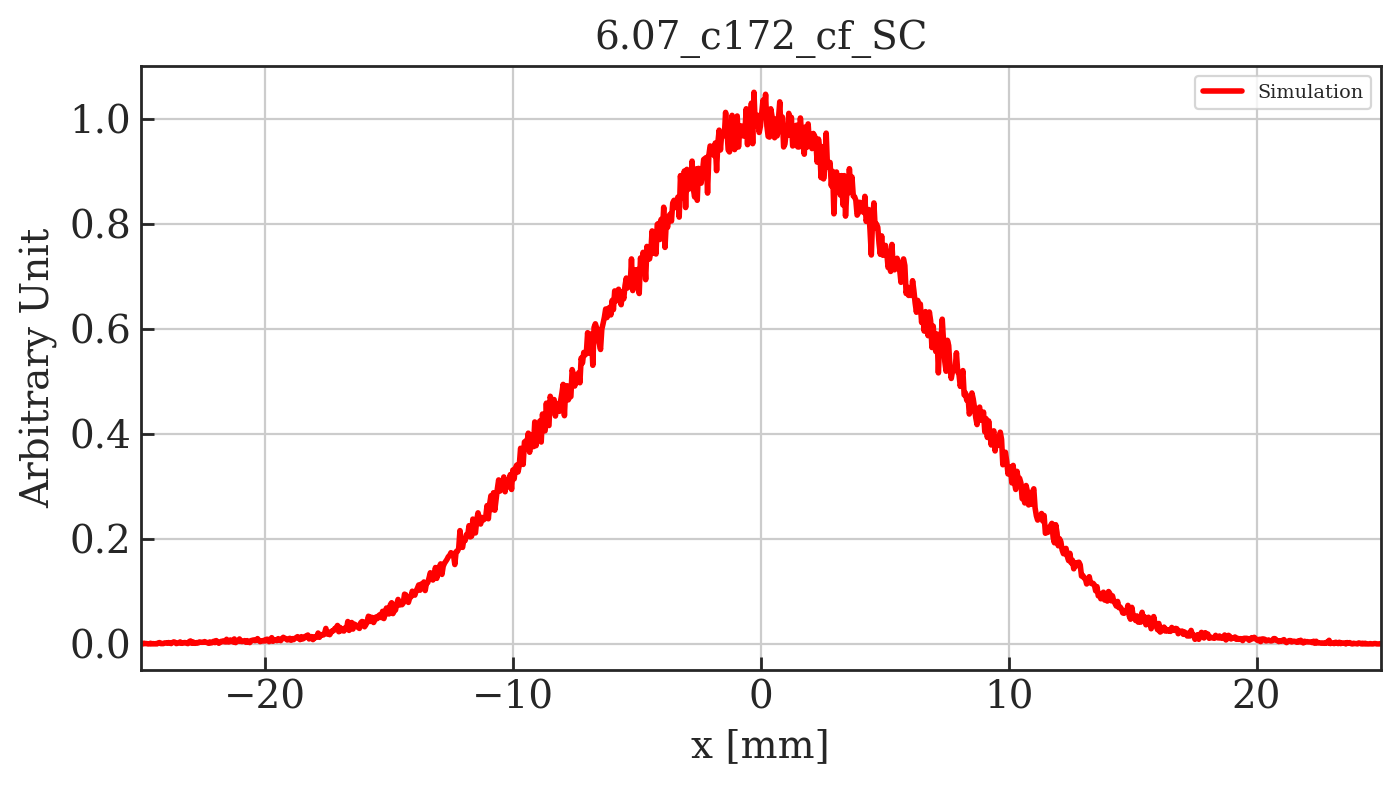

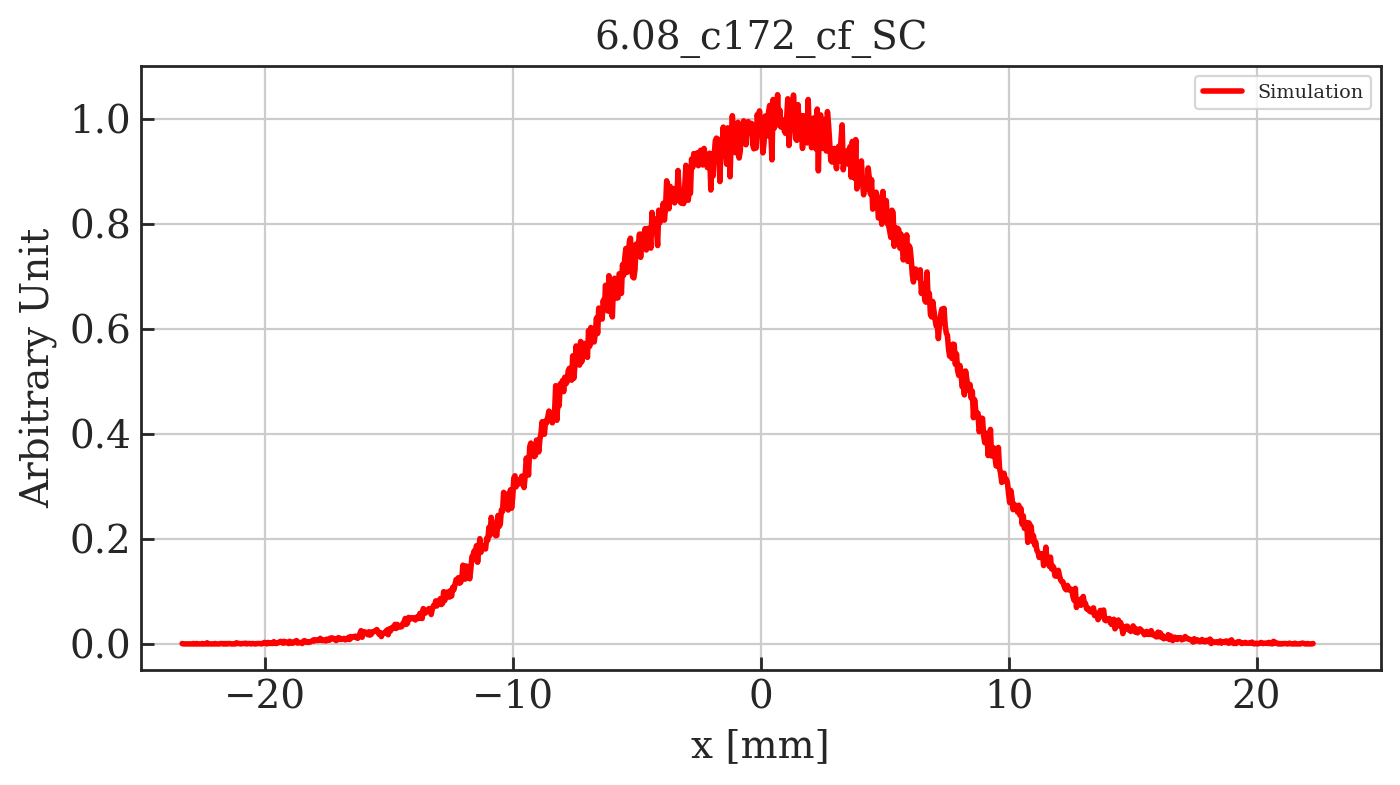

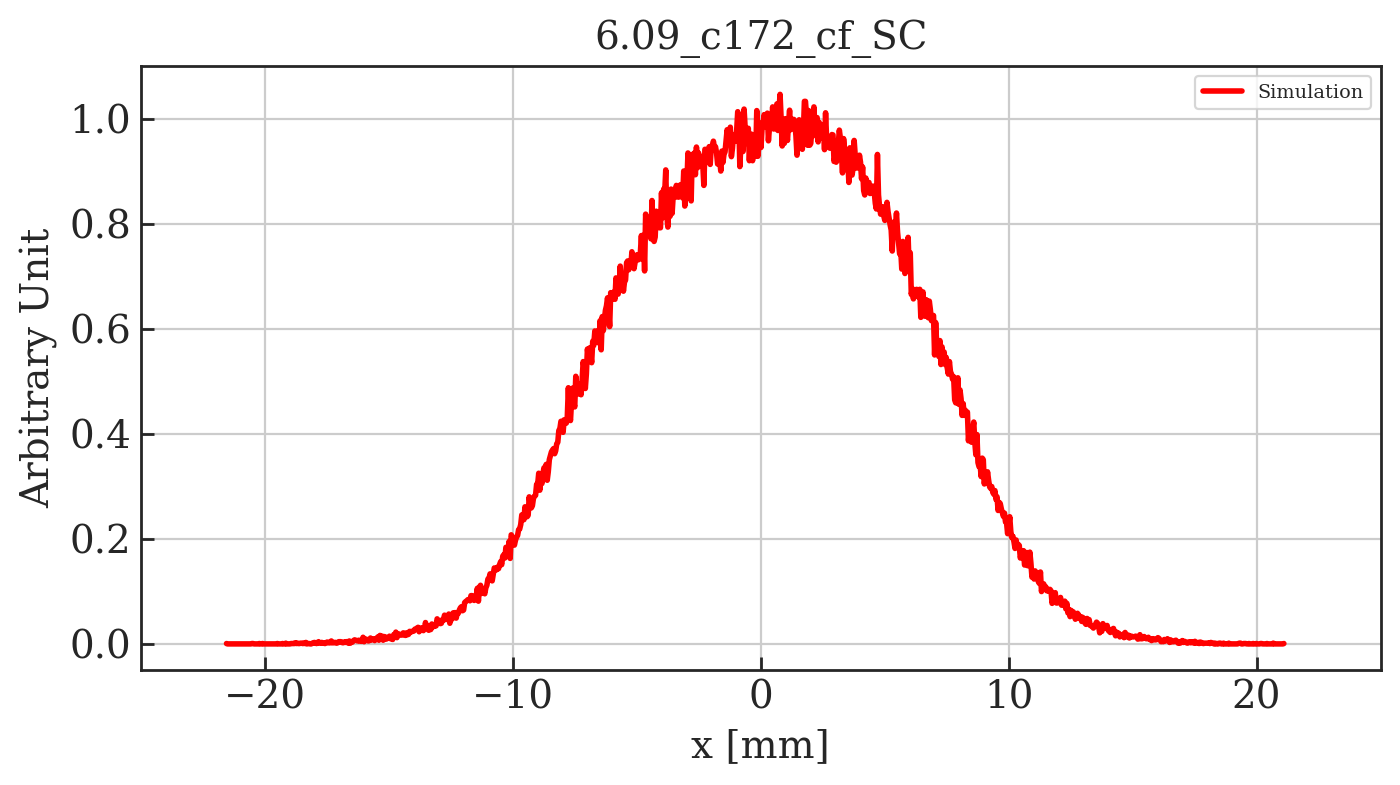

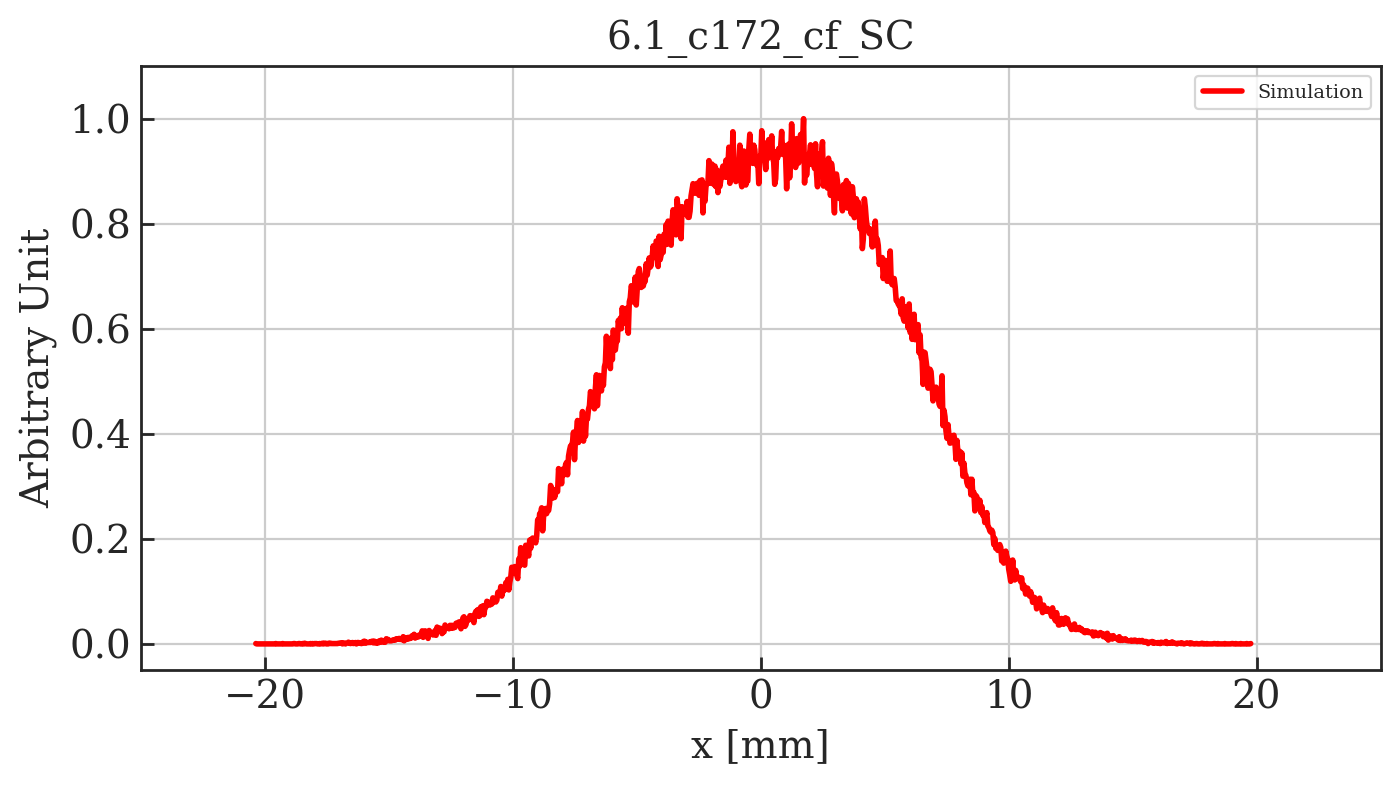

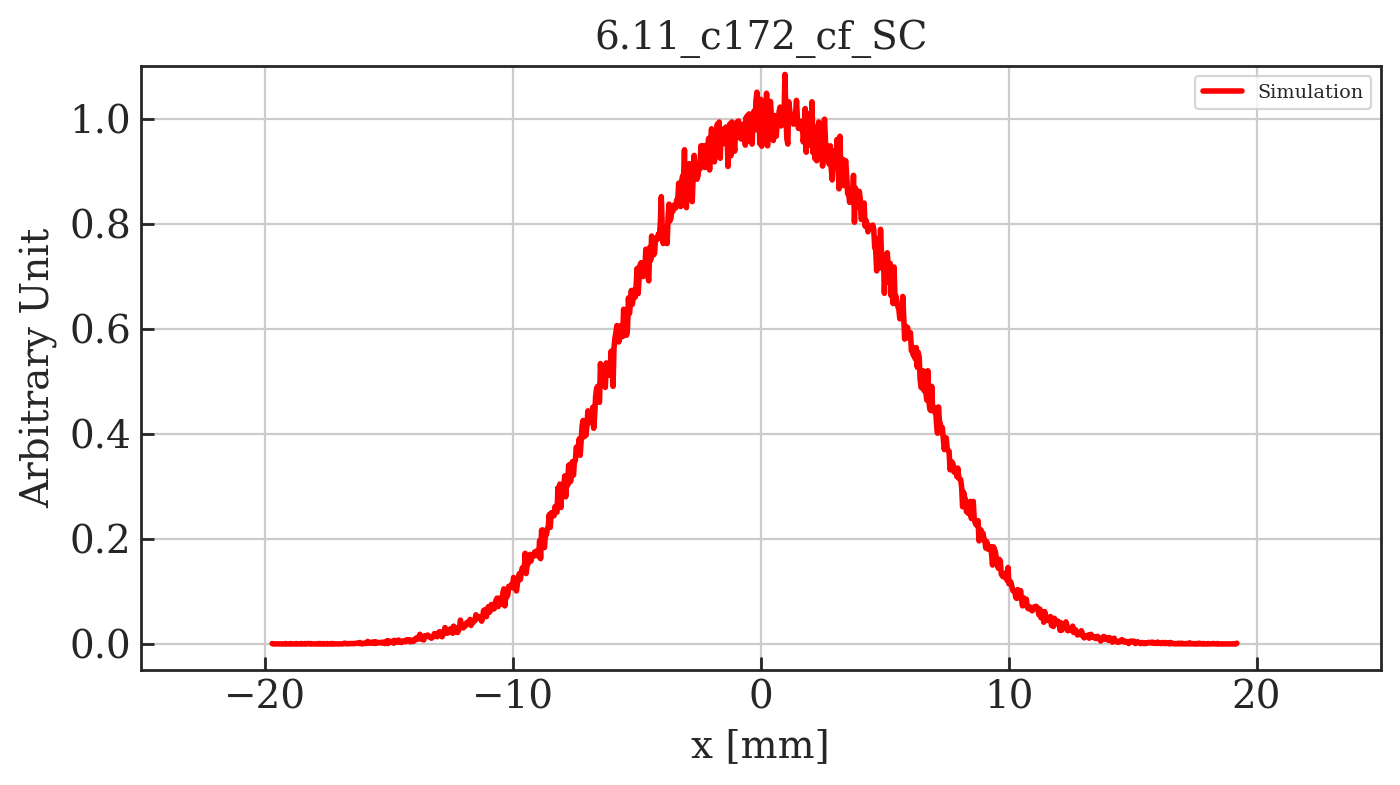

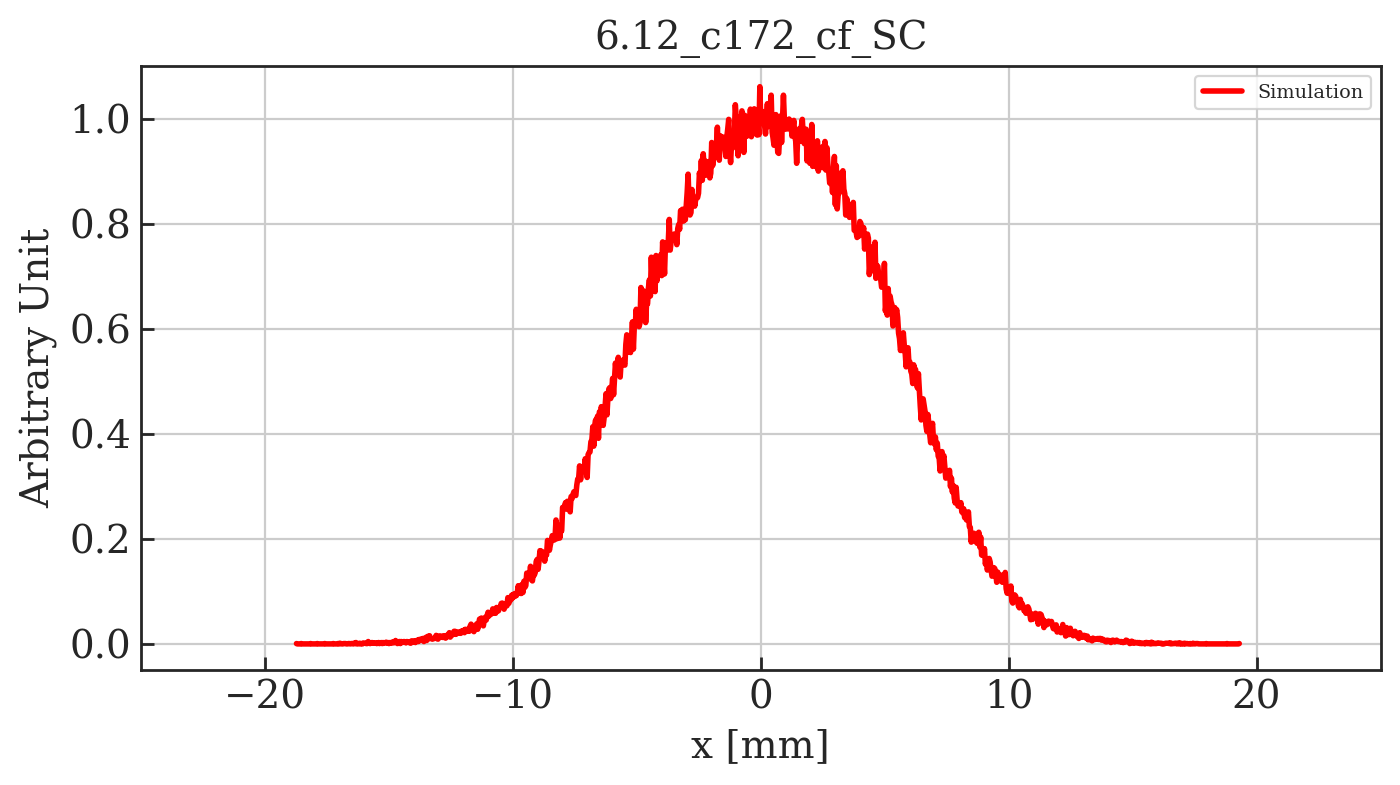

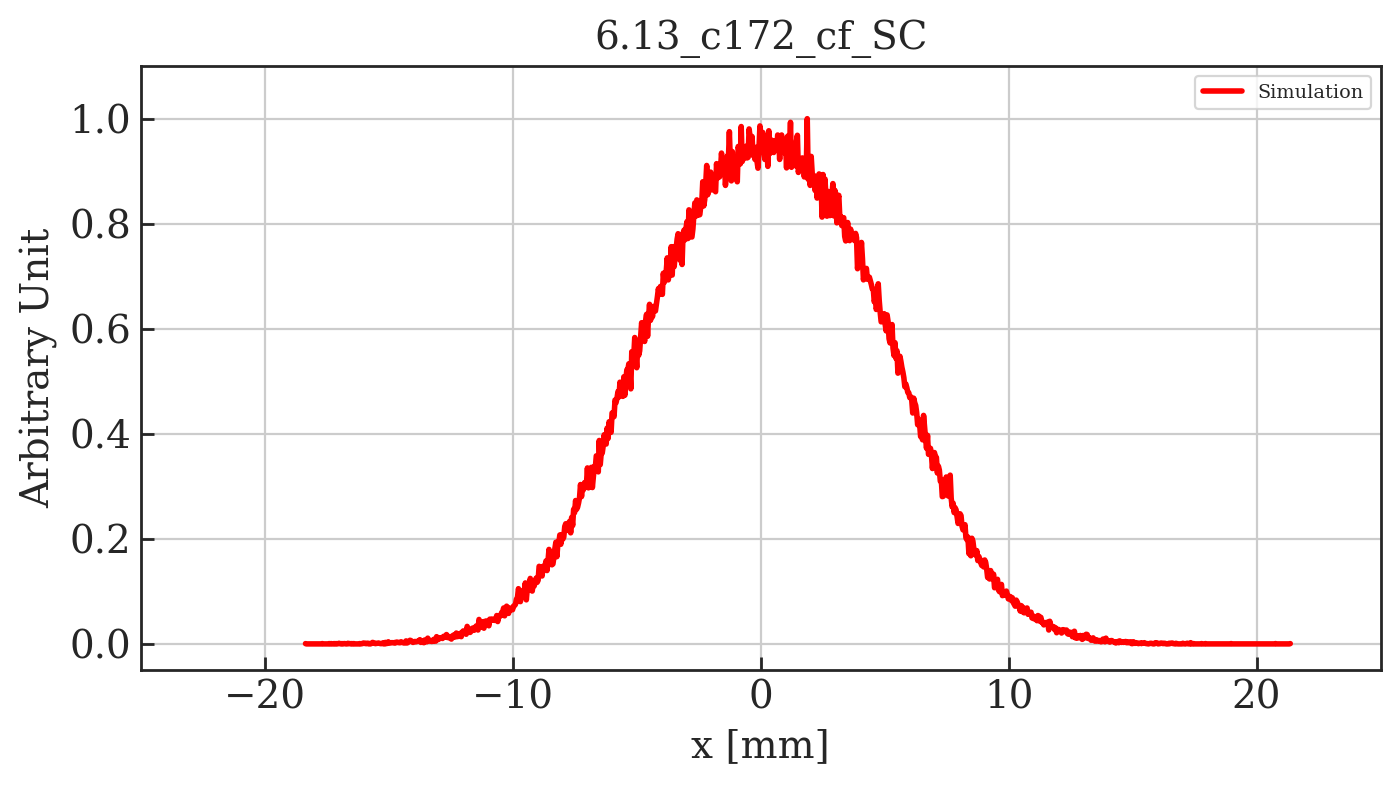

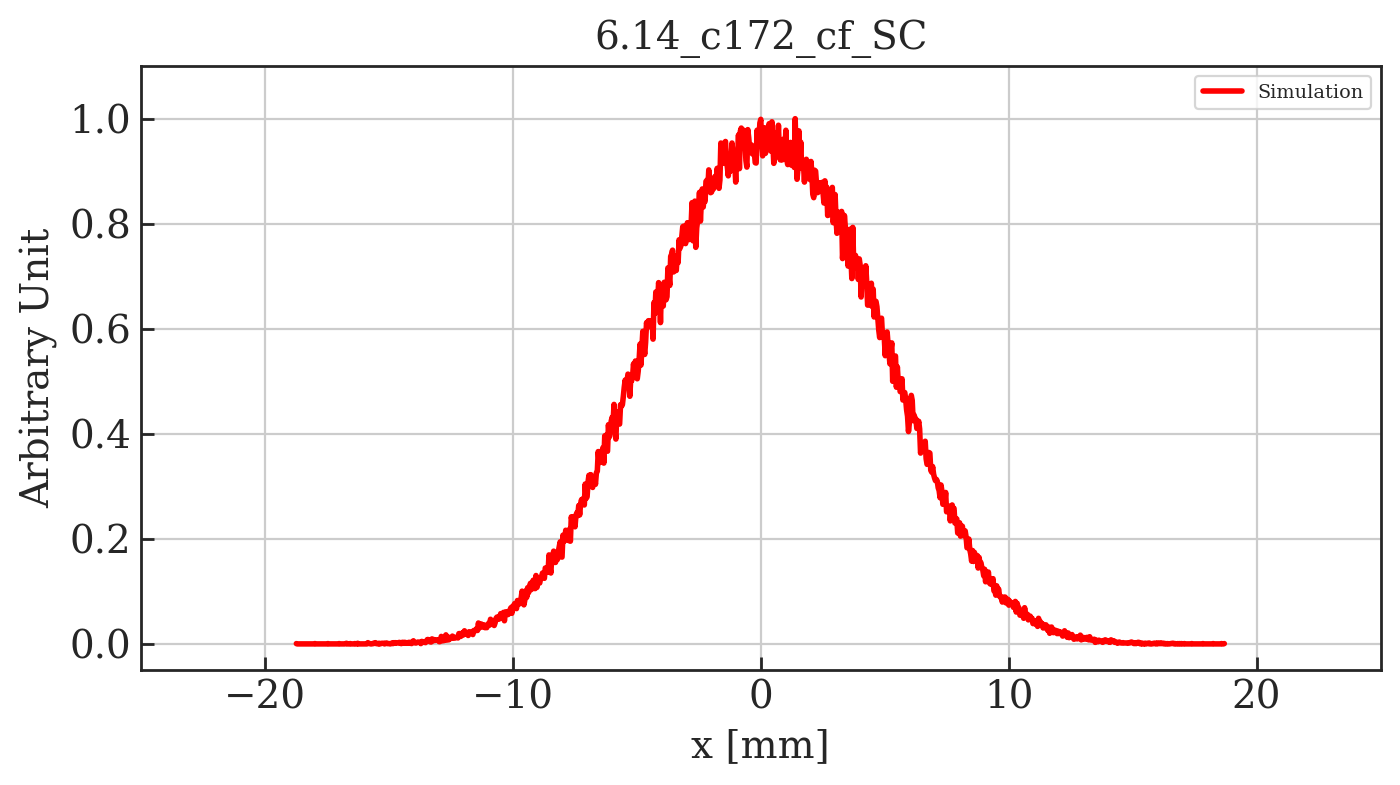

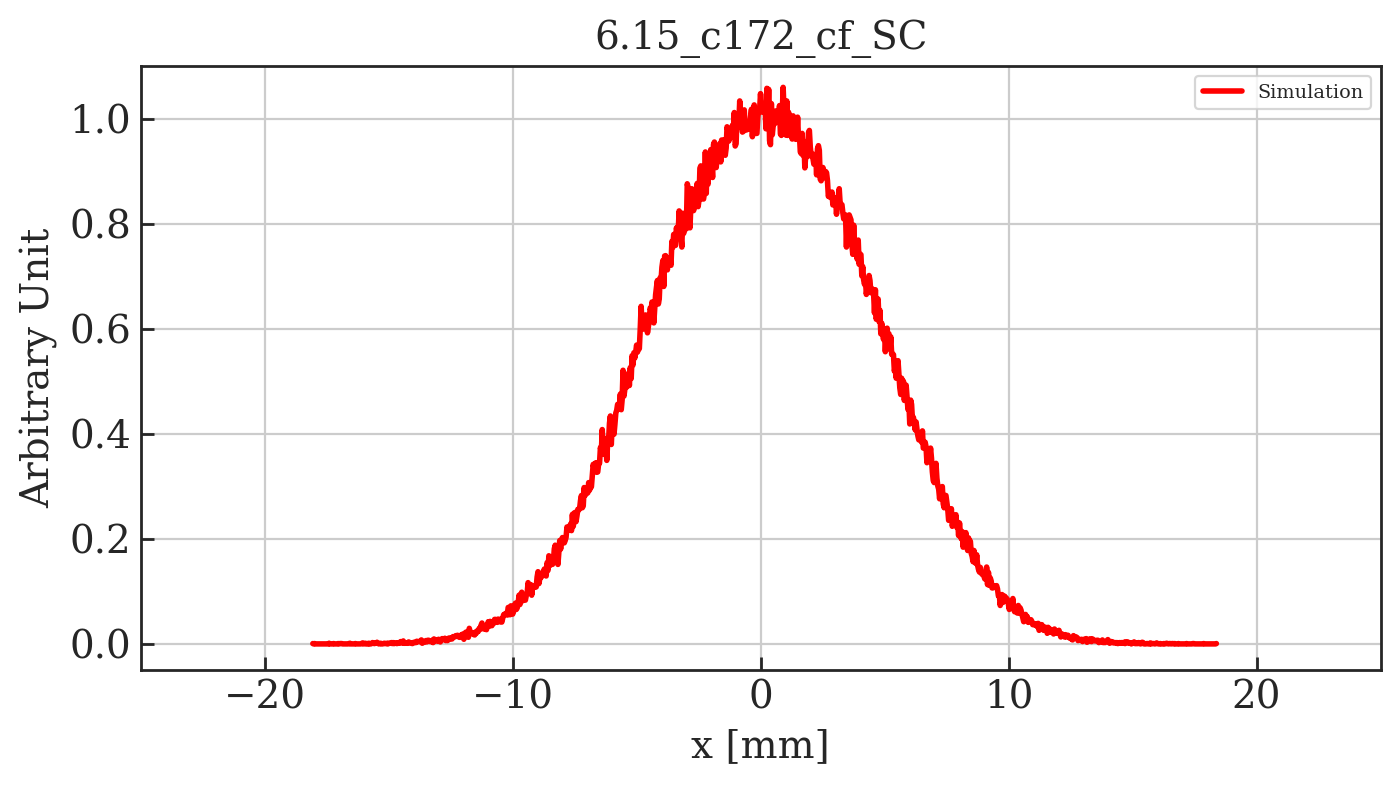

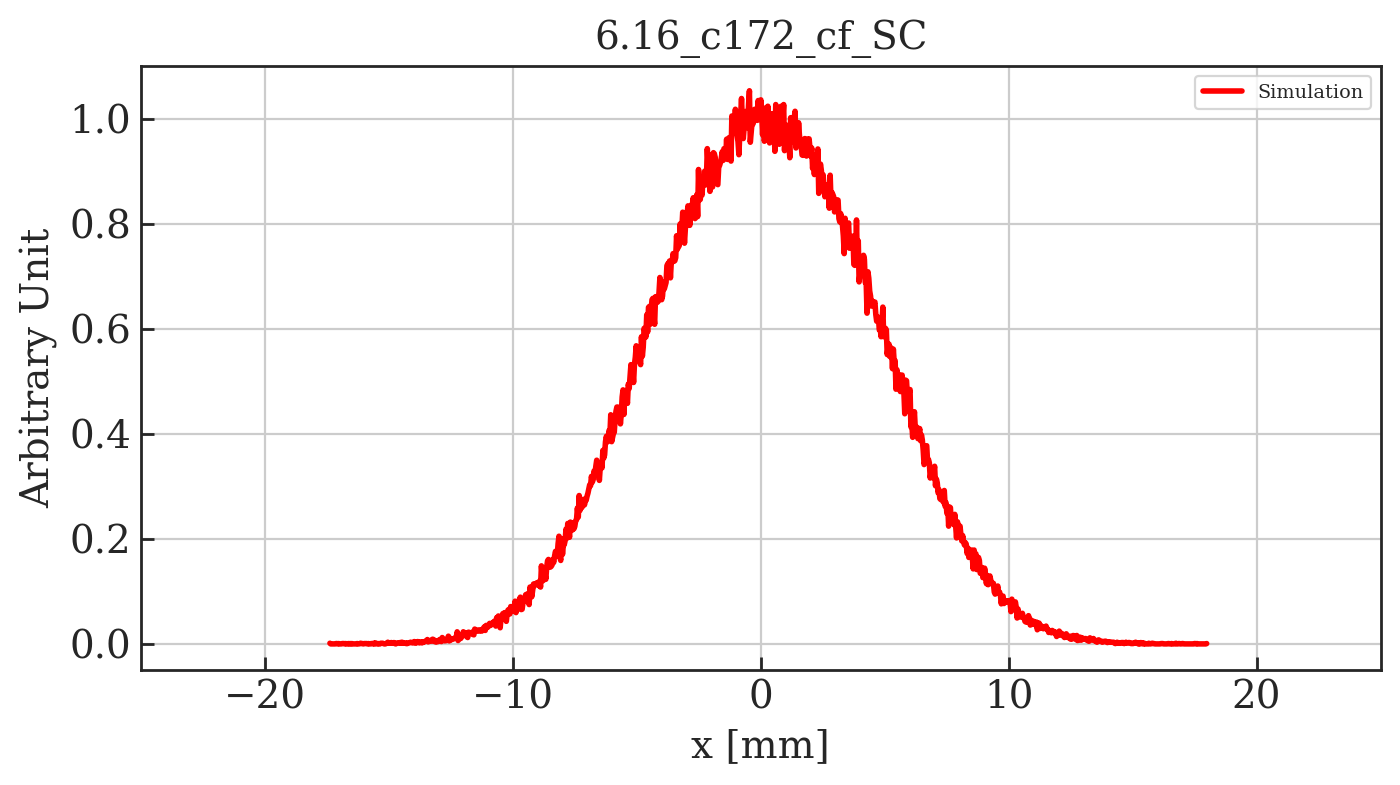

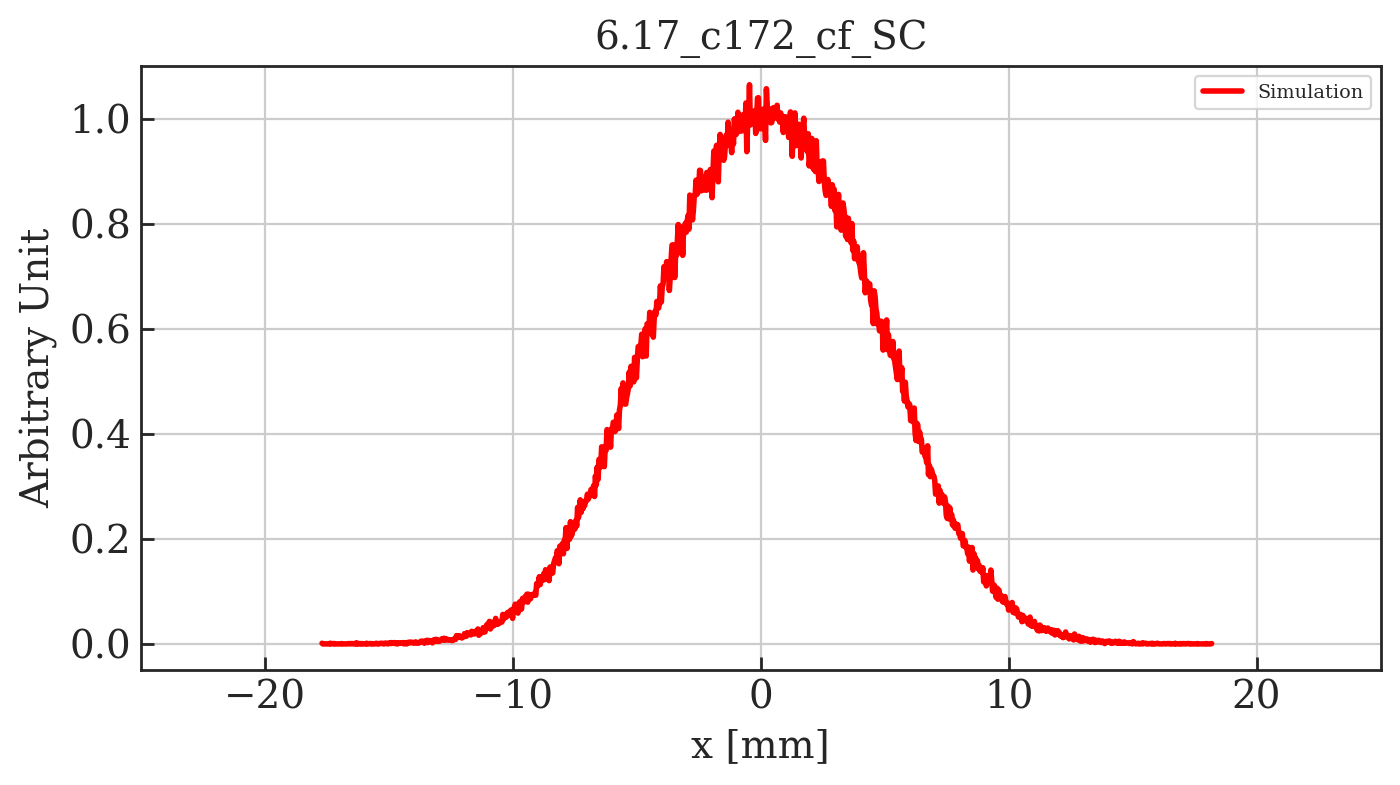

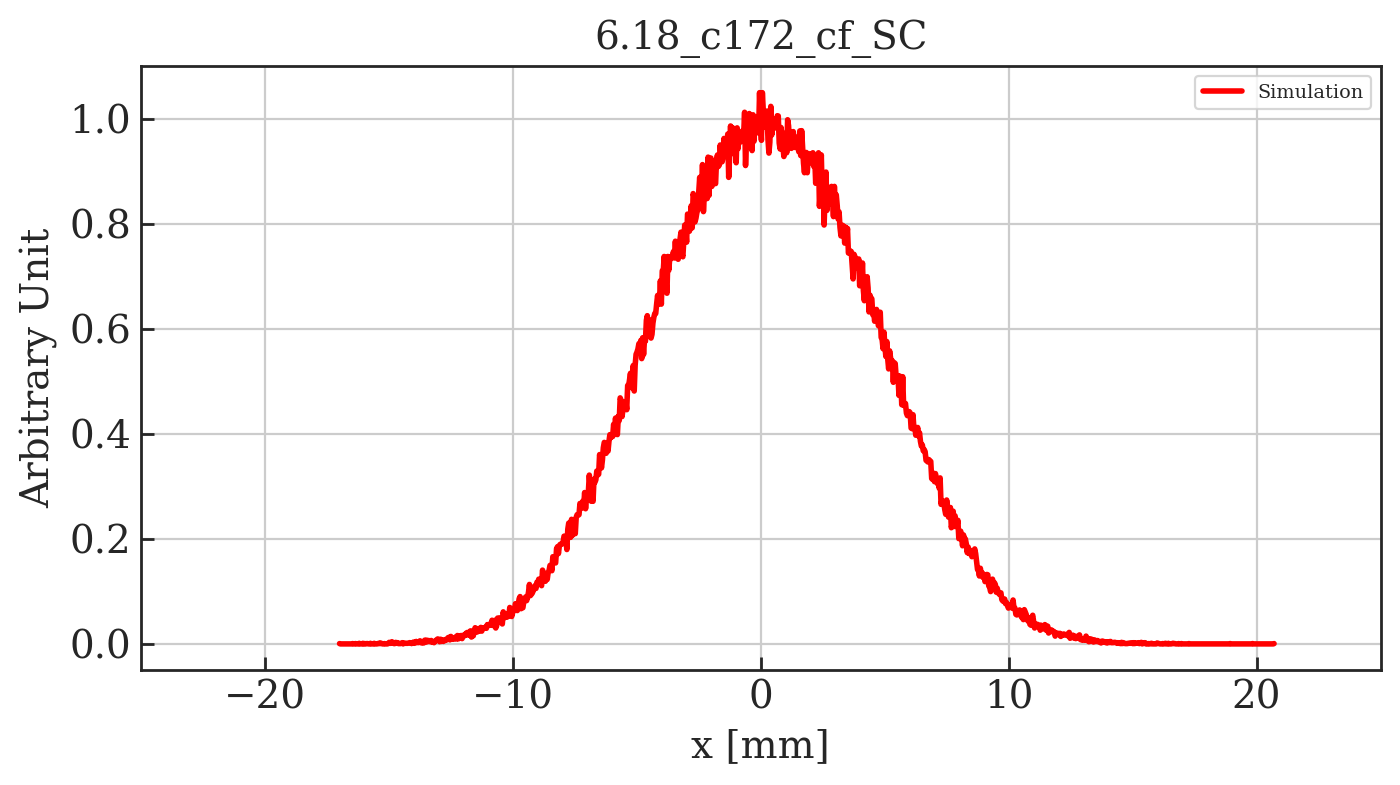

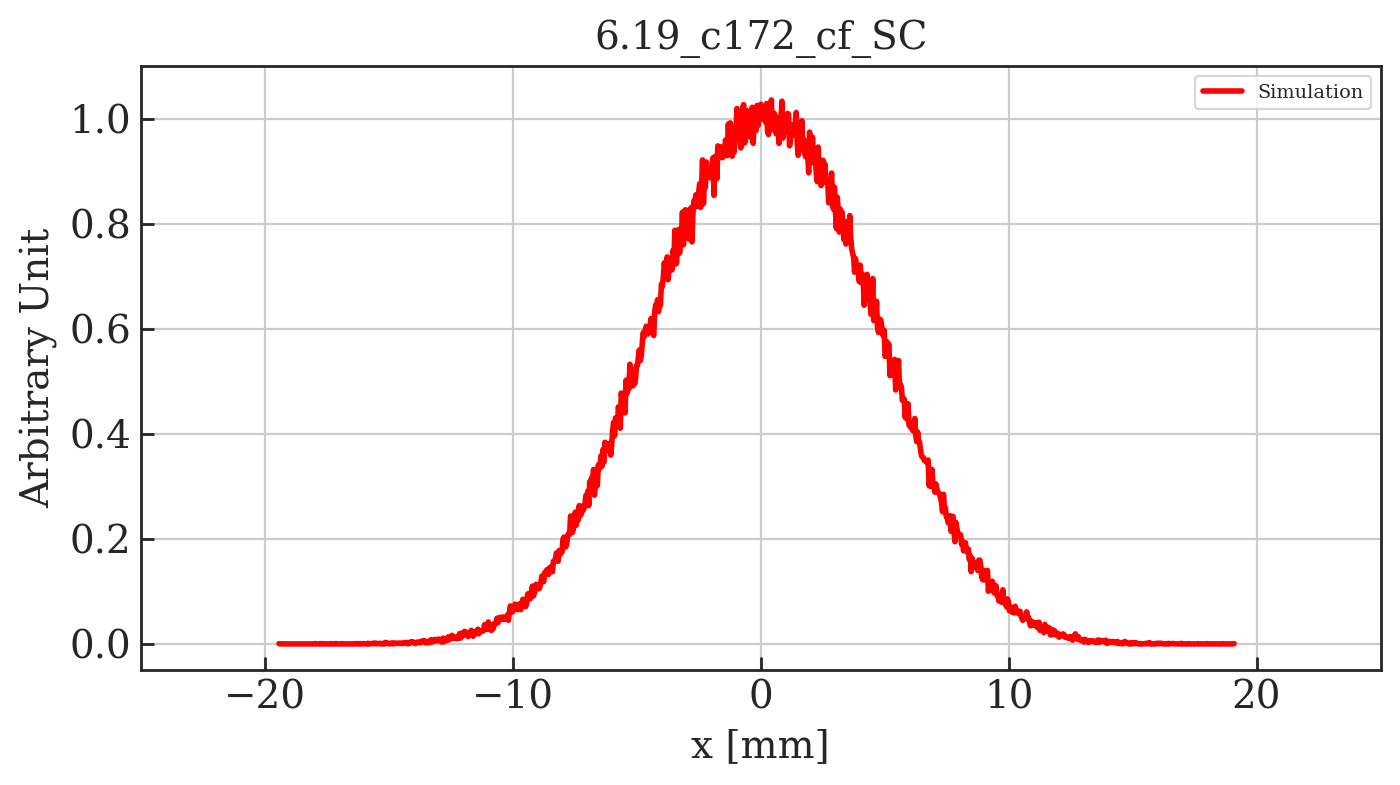

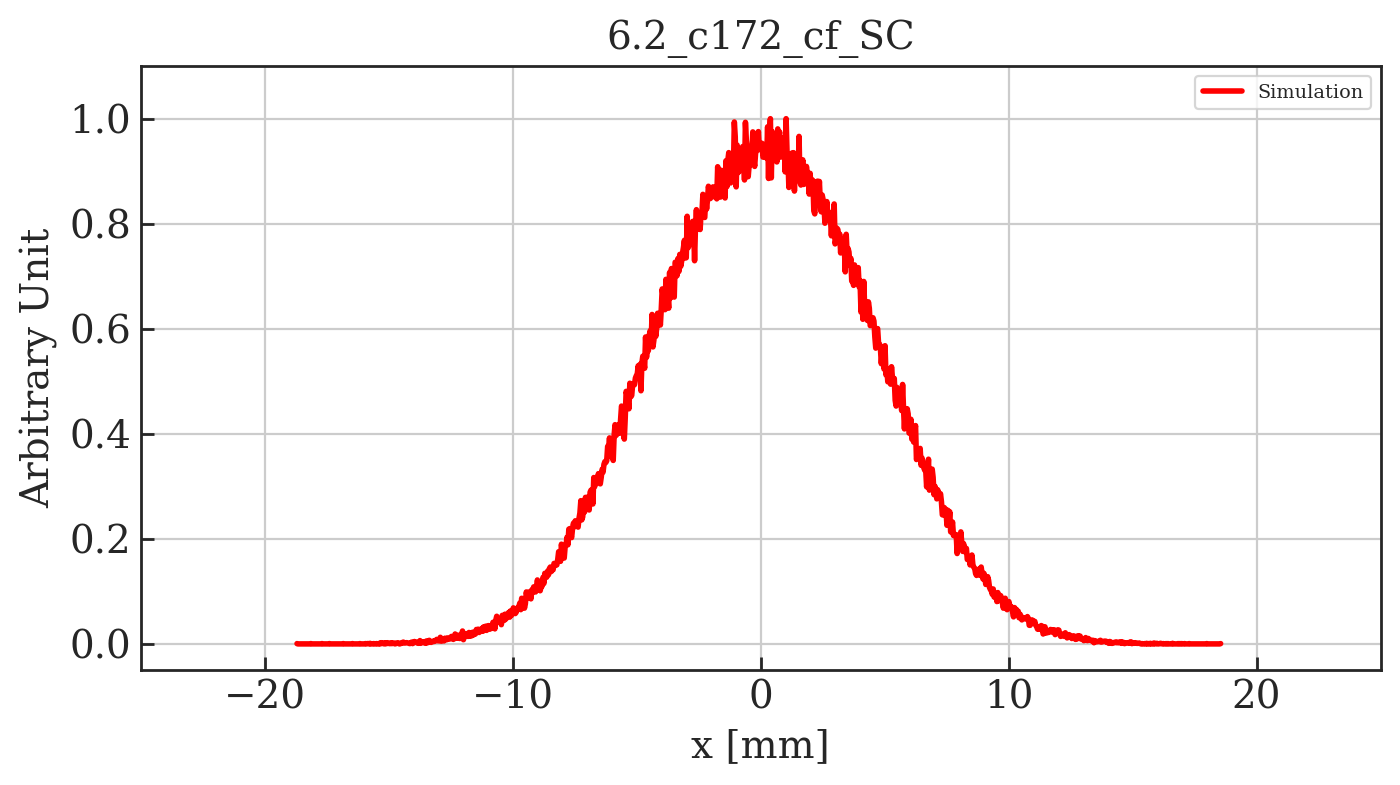

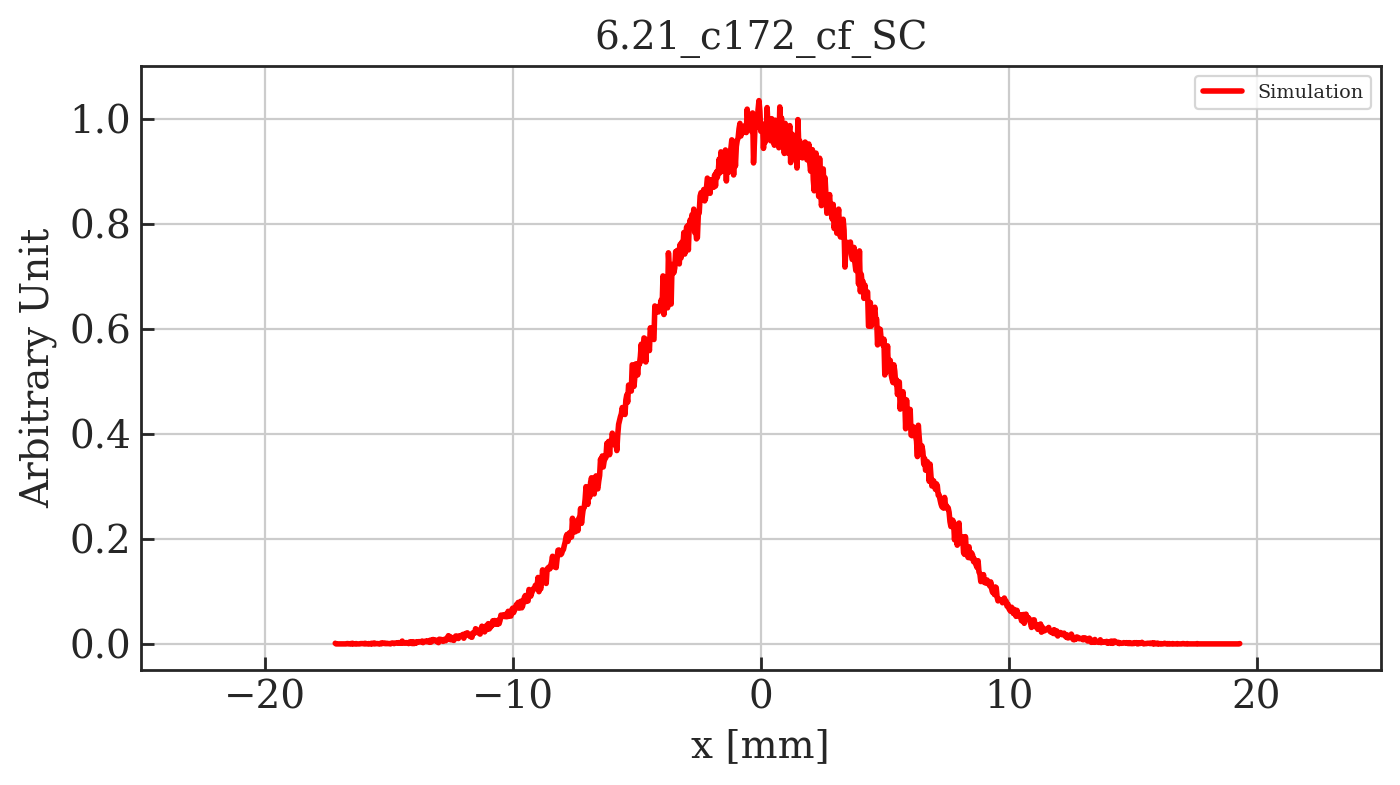

In [34]:
#Main function to plot comparison plots without MD data
verbose = True

plotted_names = []

for key, value in sorted(sims.iteritems()):
    if key not in plotted_names:        
        
        plotted_names.append(key)
        
        this_plot = []
        this_plot.append(value)
        if verbose: print '\nImporting simulation file:', key        

        tune_y = float(key.split('_')[0])/100
        ctime = (key.split('_')[2])
        time = float(ctime.split('c')[1])
        label = (key.split('_')[1])
        if verbose: print 'Qx = ', tune_y, ', ctime =', time, '[ms], label = ', label

        sim_labels=['Simulation']
        
        # Find MD data with same tune and ctime    
        for key1, value1 in sorted(sims.iteritems()):
#             if verbose: print '\tChecking other files:', key1  
            tune_y1 = float(key1.split('_')[0])/100
            ctime1 = (key1.split('_')[2])
            time1 = float(ctime1.split('c')[1])
            label1 = (key1.split('_')[1])
#             if verbose: print '\tQy = ', tune_y1, ', ctime =', time1, '[ms], label = ', label1
            if (tune_y1 == tune_y) and (time1 == time):
                if (label1 != label):
                    print '\tMATCH FOUND' 
                    print '\tQy = ', tune_y1, ', ctime =', time1, '[ms]'
                    print '\tlab = ', label, ', lab1 =', label1

                    this_plot.append(value1)
                    plotted_names.append(key1)
                    sim_labels.append(label1)

        # Find rows in dataframe at correct tune and WS time
        md_points = []
        for i in tune_points[tune_y]:
            if df0['PR.BWS.65.H_ROT:ACQ_DELAY'].iloc()[i] == time:
                md_points.append(i)          

        if verbose: print md_points                 

        # Plot data
        main_label = str(tune_y) + '_' + str(ctime) + '_cf_SC'
        
        if len(this_plot) is 1:
            Plot_profiles_cf_sc_models(df0, md_points, particles_from_matfile(this_plot[0]), main_label=main_label, sim_labels=sim_labels, plot_md=False)  
        elif len(this_plot) is 2:
            Plot_profiles_cf_sc_models(df0, md_points, particles_from_matfile(this_plot[0]), particles_from_matfile(this_plot[1]), main_label=main_label, sim_labels=sim_labels, plot_md=False)  
        elif len(this_plot) is 3:
            Plot_profiles_cf_sc_models(df0, md_points, particles_from_matfile(this_plot[0]), particles_from_matfile(this_plot[1]), particles_from_matfile(this_plot[2]), main_label=main_label, sim_labels=sim_labels, plot_md=False)  
        else: print 'ERROR: More than 3 space charge methods found'

# Compare Sims and MD data


Importing simulation file: 607_SbS_c172
Qy =  6.07 , ctime = 172.0 [ms], label =  SbS
[187, 209]

	MAX(y_dat) =  0.06442944157795462
	x_dat[index] =  -0.2925141206729478
	index of x_dat =  -0.2925141206729478  is  508
	Mean of peak point +/- 3 points =  0.06134671946919278
	 using peak value

Importing simulation file: 608_SbS_c172
Qy =  6.08 , ctime = 172.0 [ms], label =  SbS
[8, 31, 54, 76, 99, 142, 163]

	MAX(y_dat) =  0.06541413715760237
	x_dat[index] =  0.6638845231837927
	index of x_dat =  0.6638845231837927  is  526
	Mean of peak point +/- 3 points =  0.06255997520717907
	 using peak value

Importing simulation file: 609_SbS_c172
Qy =  6.09 , ctime = 172.0 [ms], label =  SbS
[186, 208]

	MAX(y_dat) =  0.06987107192347927
	x_dat[index] =  0.7640160130786384
	index of x_dat =  0.7640160130786384  is  523
	Mean of peak point +/- 3 points =  0.06677818745201666

Importing simulation file: 610_SbS_c172
Qy =  6.1 , ctime = 172.0 [ms], label =  SbS
[7, 30, 53, 75, 98, 121, 141, 162]



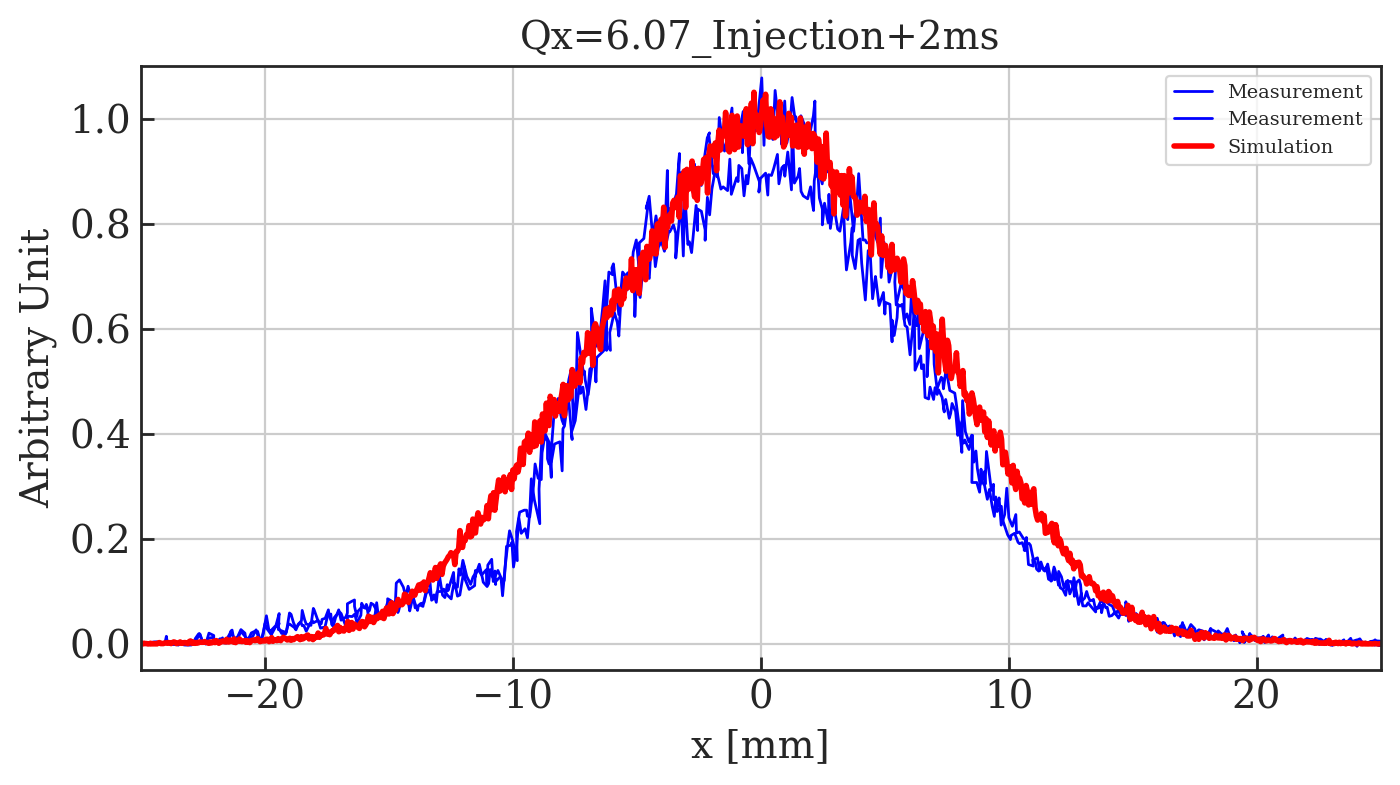

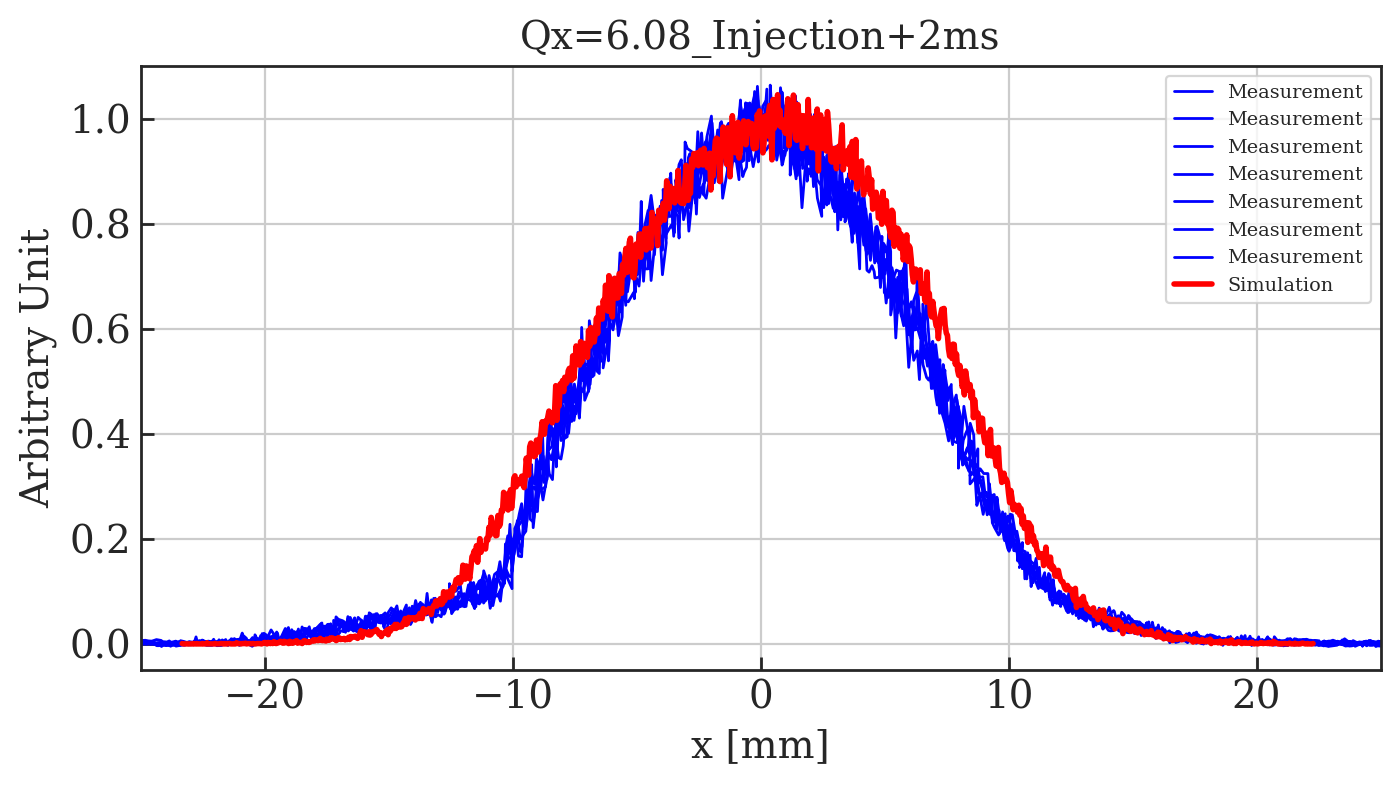

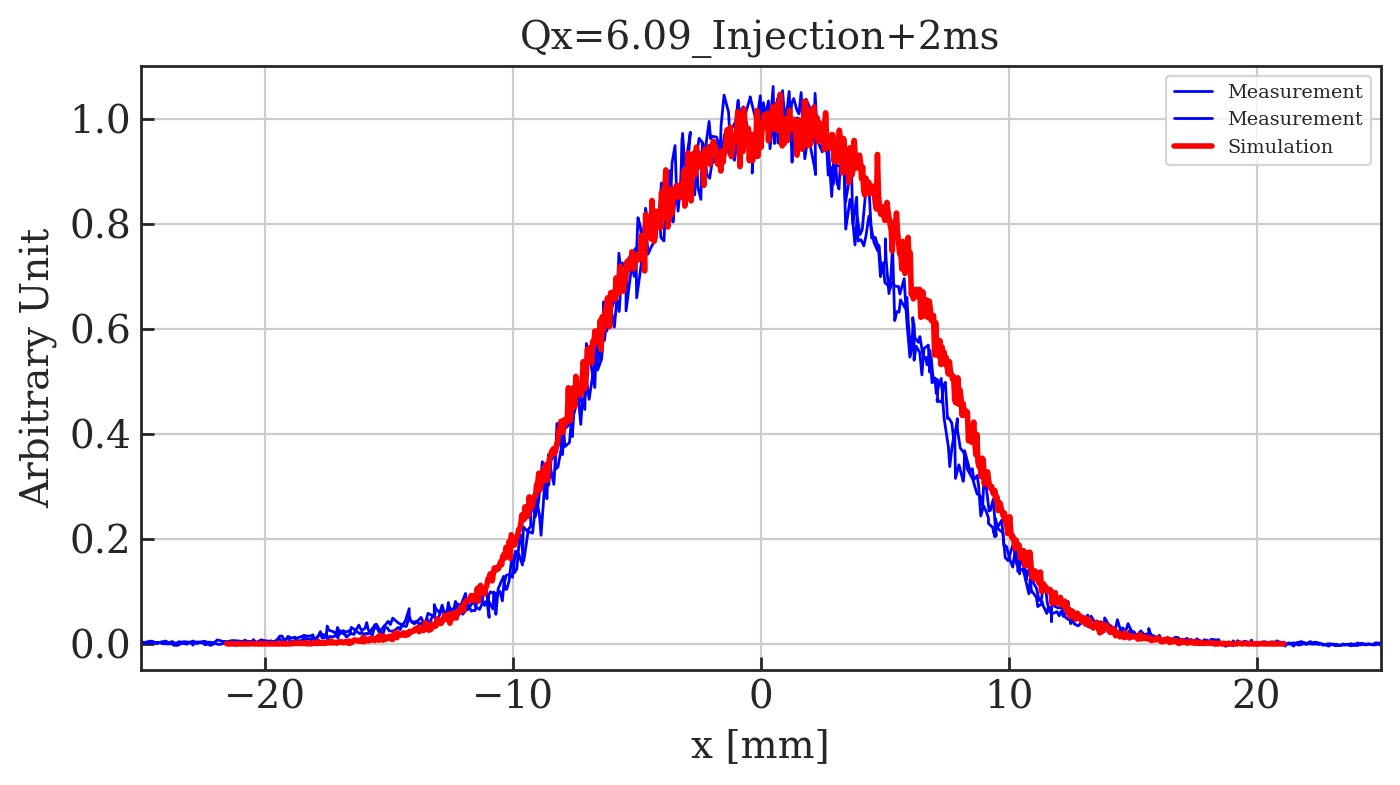

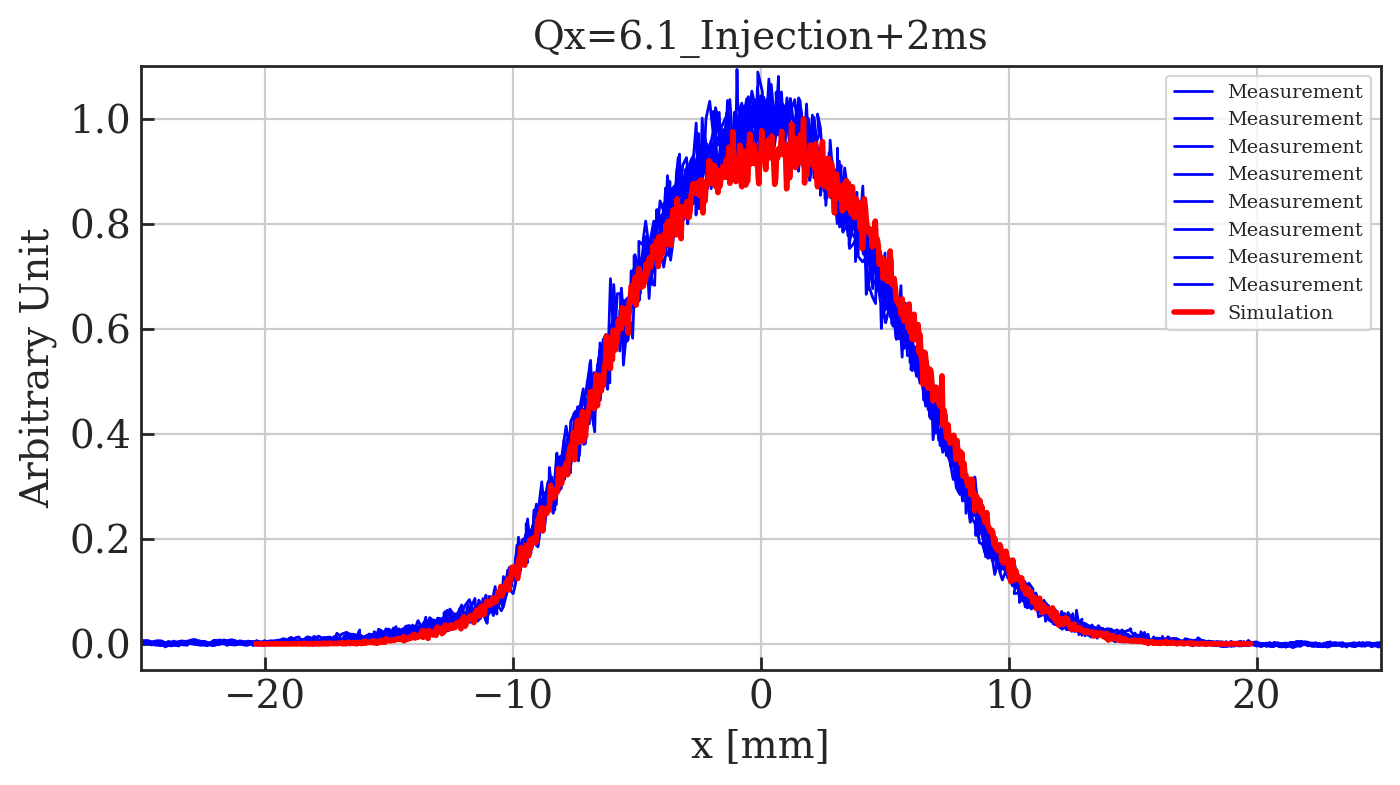

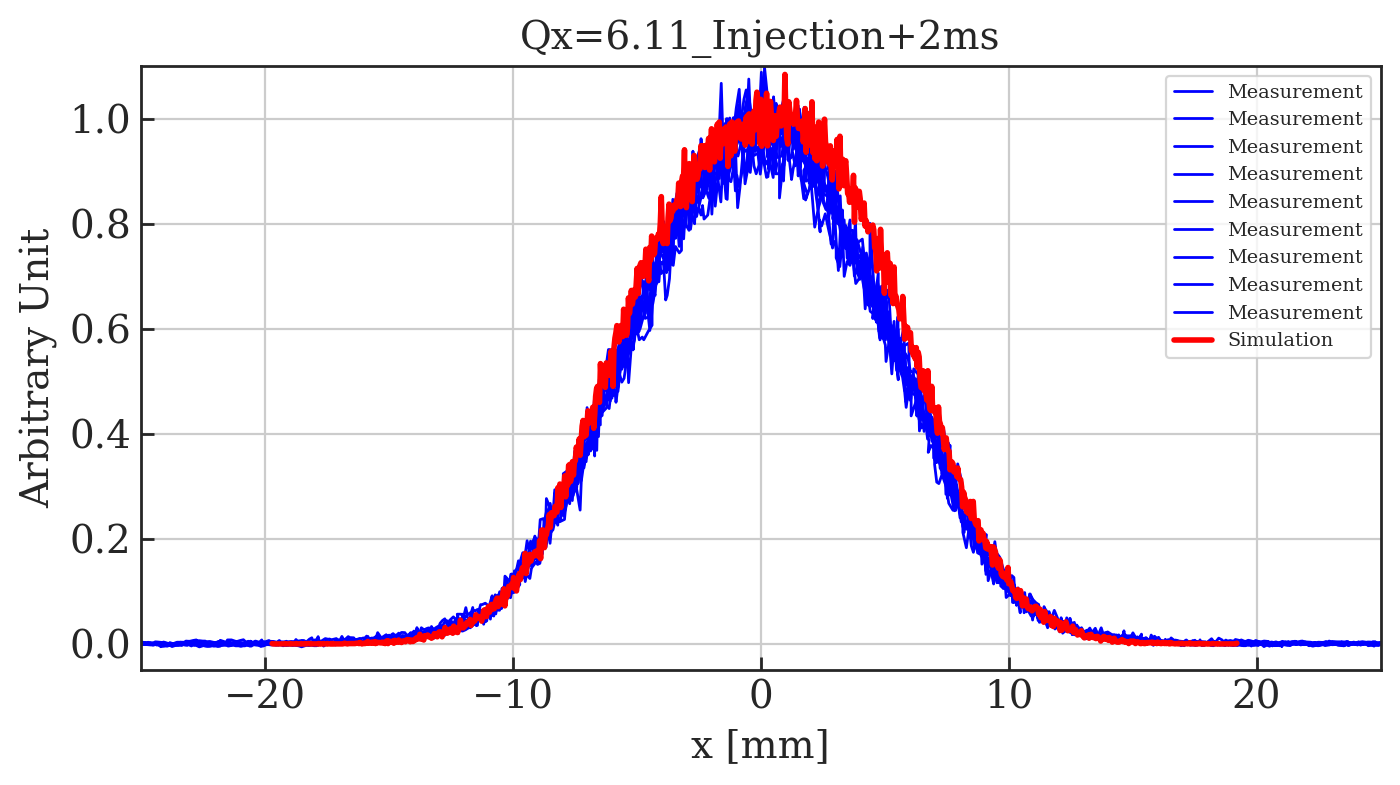

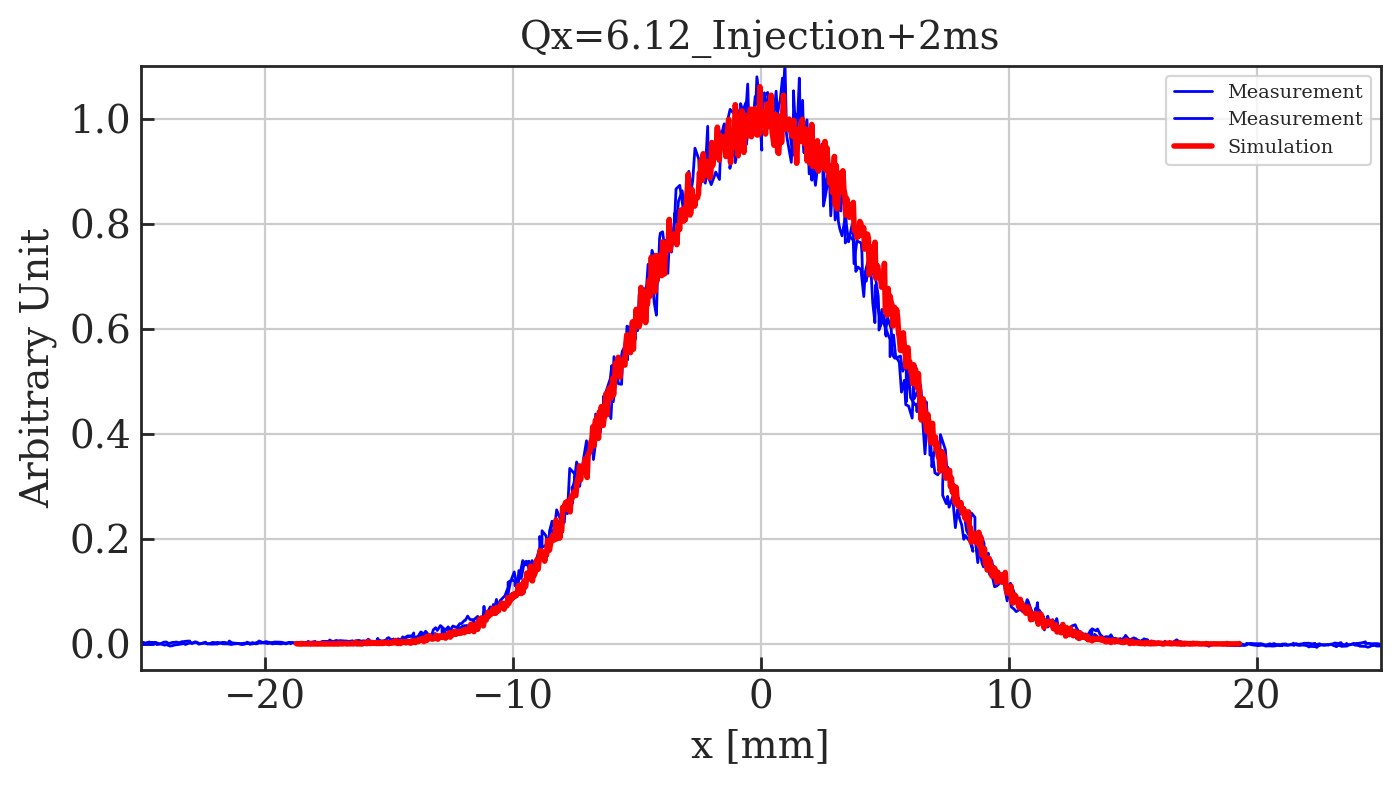

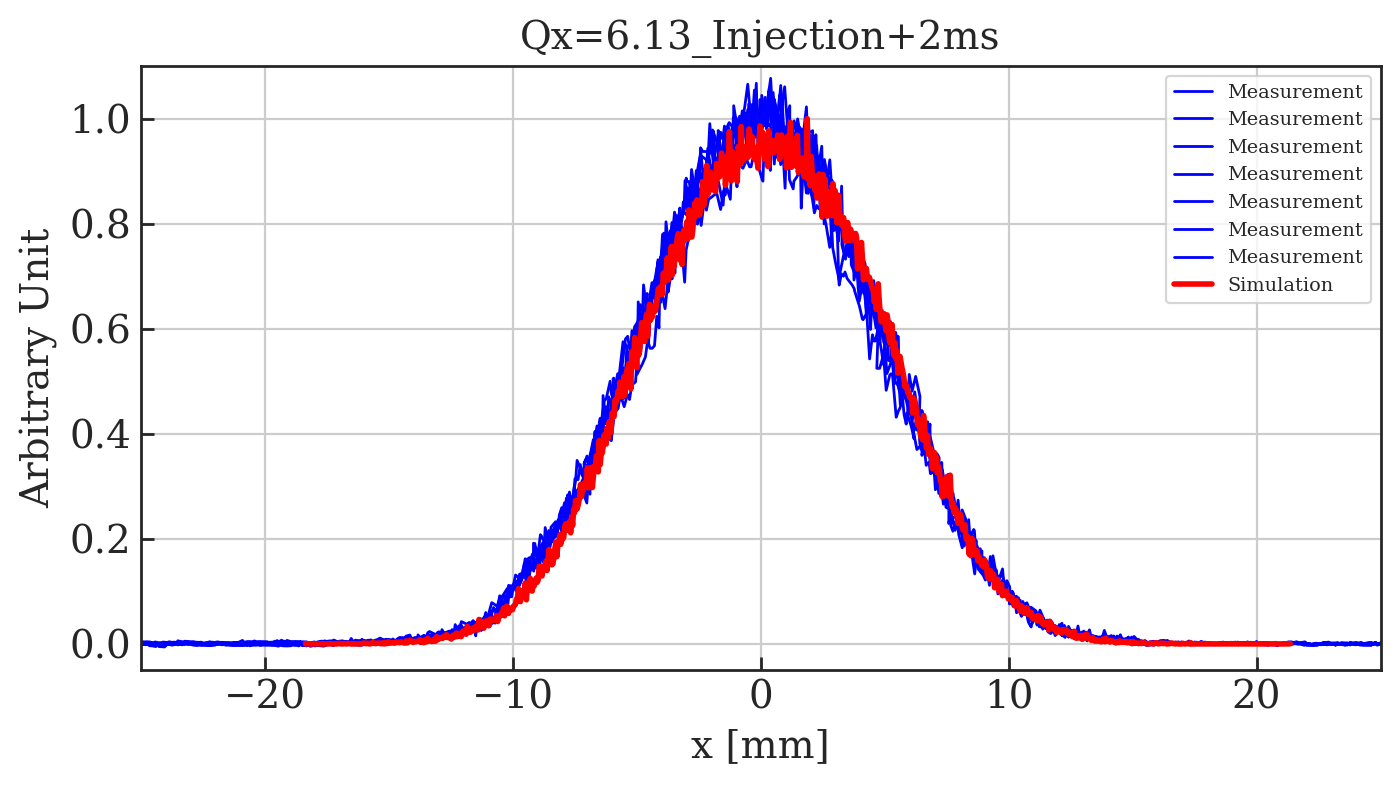

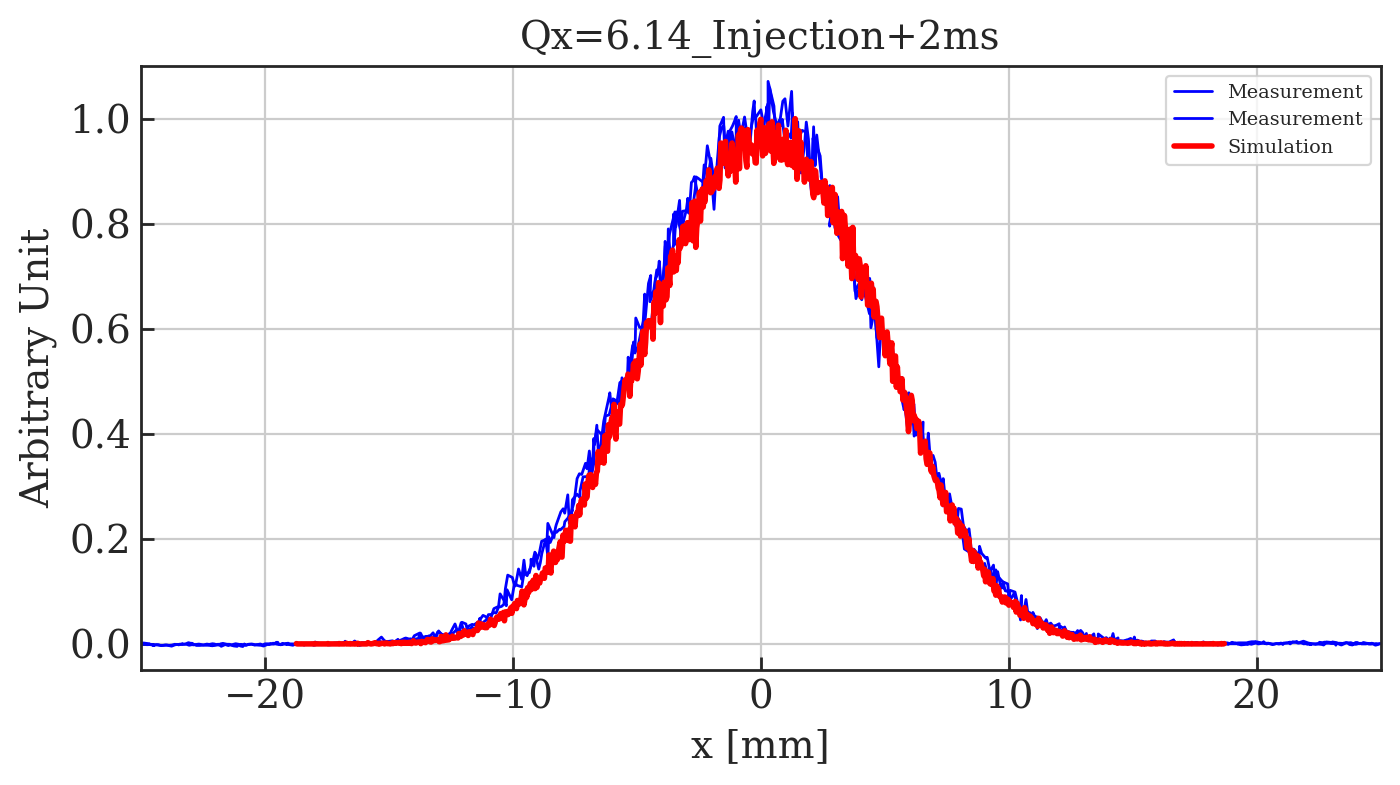

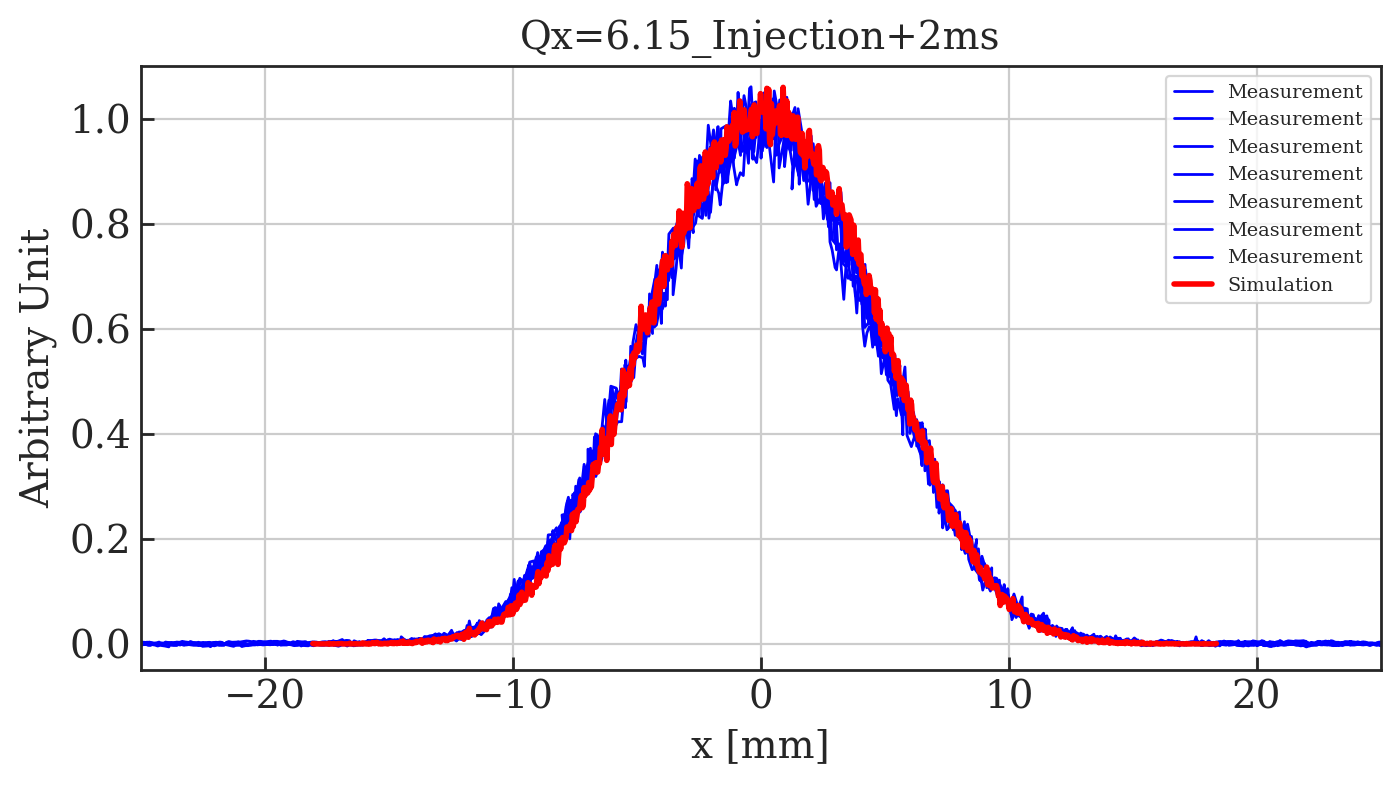

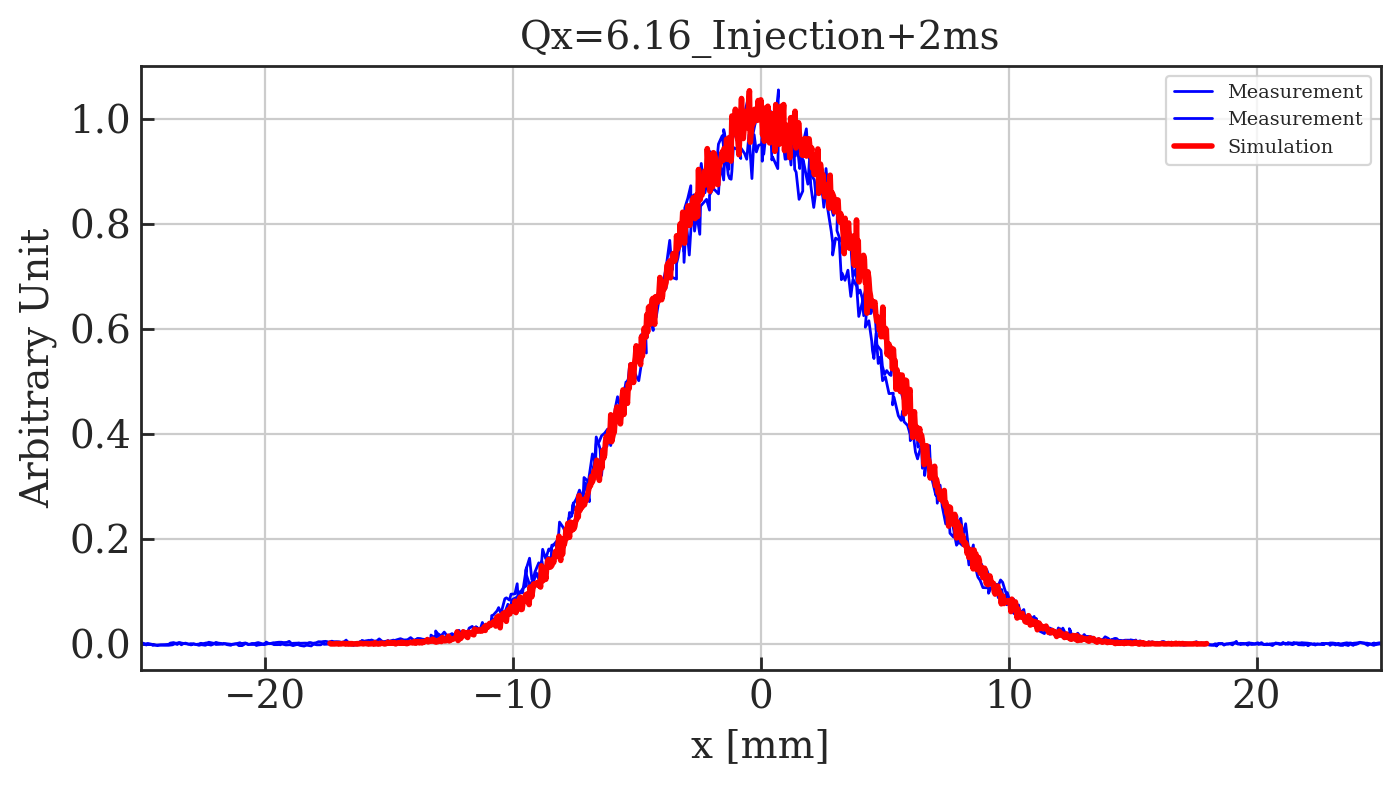

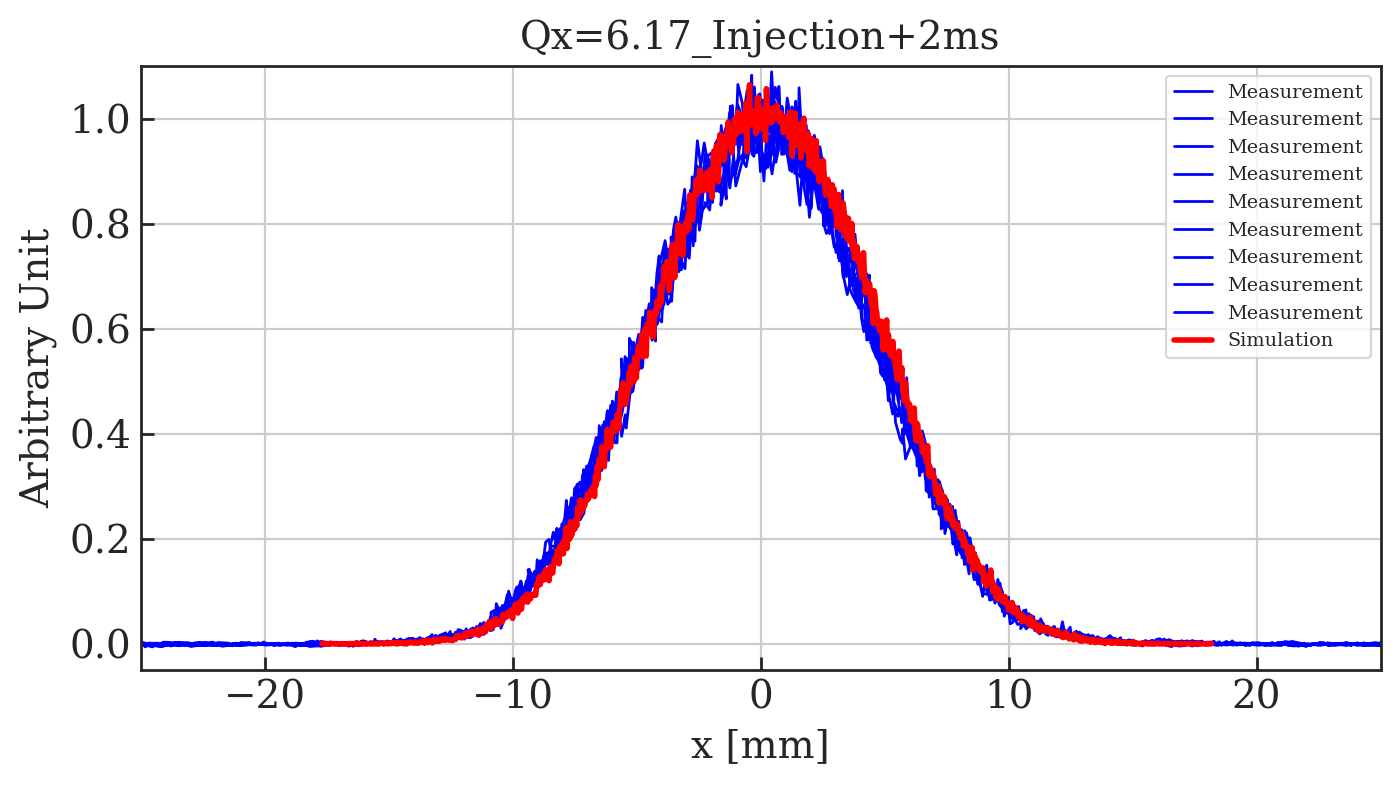

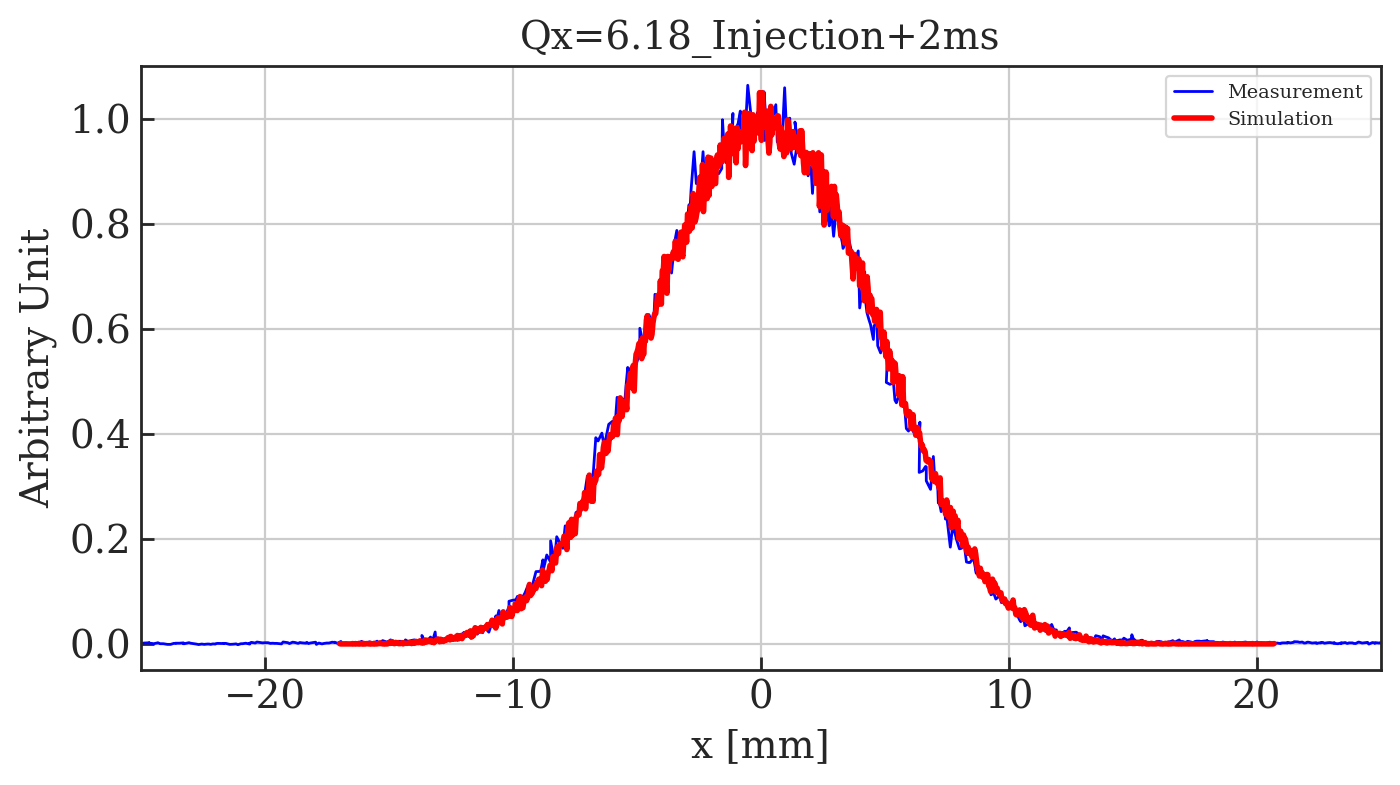

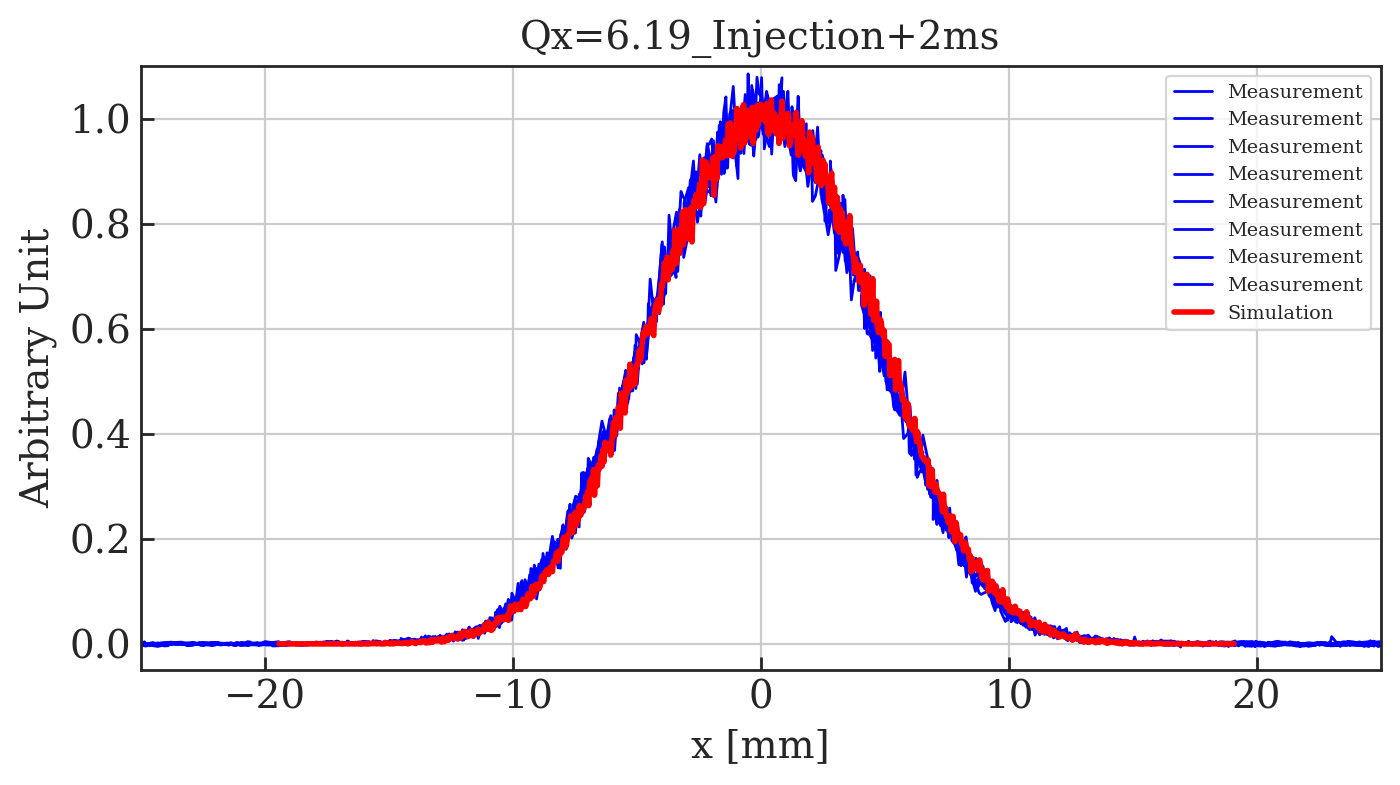

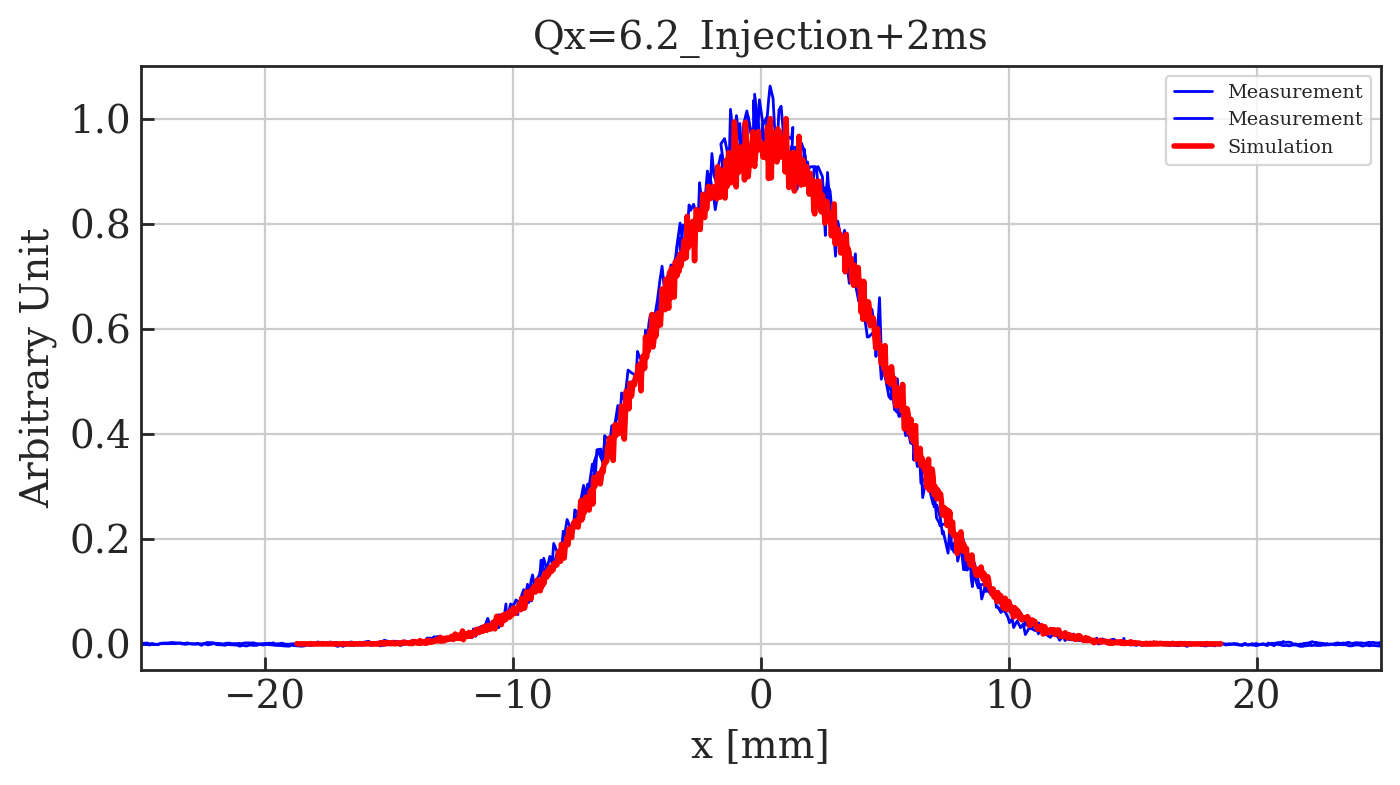

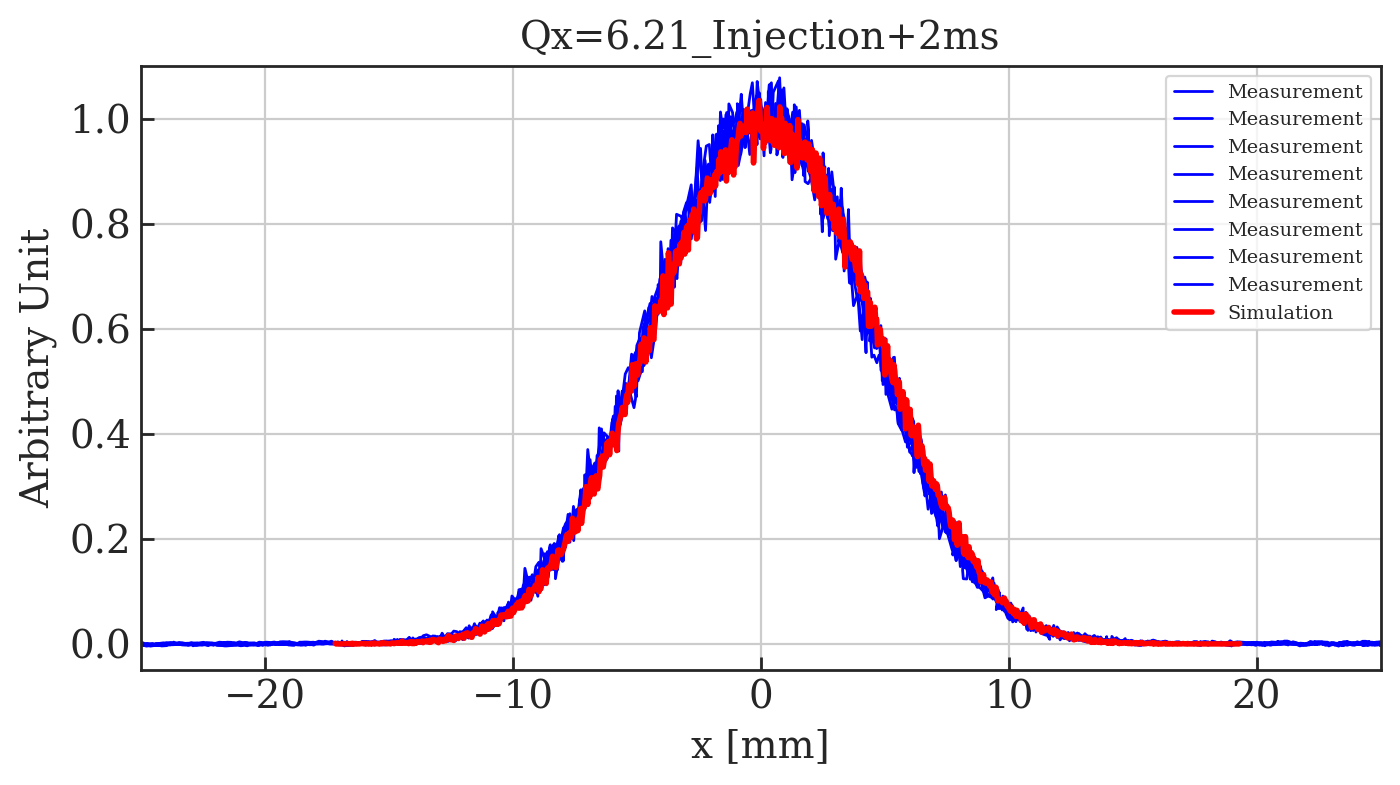

In [35]:
#Main function to plot comparison plots with MD data
verbose = True

plotted_names = []

for key, value in sorted(sims.iteritems()):
    if key not in plotted_names:        
        
        plotted_names.append(key)
        
        this_plot = []
        this_plot.append(value)
        if verbose: print '\nImporting simulation file:', key        

        tune_y = float(key.split('_')[0])/100
        ctime = (key.split('_')[2])
        time = float(ctime.split('c')[1])
        label = (key.split('_')[1])
        if verbose: print 'Qy = ', tune_y, ', ctime =', time, '[ms], label = ', label
        
        sim_labels=['Simulation']

        # Find MD data with same tune and ctime    
        for key1, value1 in sorted(sims.iteritems()):
#             if verbose: print '\tChecking other files:', key1  
            tune_y1 = float(key1.split('_')[0])/100
            ctime1 = (key1.split('_')[2])
            time1 = float(ctime1.split('c')[1])
            label1 = (key1.split('_')[1])
#             if verbose: print '\tQy = ', tune_y1, ', ctime =', time1, '[ms], label = ', label1
            if (tune_y1 == tune_y) and (time1 == time):
                if (label1 != label):
                    print '\tMATCH FOUND' 
                    print '\tQy = ', tune_y1, ', ctime =', time1, '[ms]'
                    print '\tlab = ', label, ', lab1 =', label1

                    this_plot.append(value1)
                    plotted_names.append(key1)
                    sim_labels.append(label1)

        # Find rows in dataframe at correct tune and WS time
        md_points = []
        for i in tune_points[tune_y]:
            if df0['PR.BWS.65.H_ROT:ACQ_DELAY'].iloc()[i] == time:
                md_points.append(i)          

        if verbose: print md_points                 

        # Plot data
        main_label = 'Qx=' + str(tune_y) + '_Injection+2ms'
        
        if len(this_plot) is 1:
            Plot_profiles_cf_sc_models(df0, md_points, particles_from_matfile(this_plot[0]), 0, main_label=main_label, bins=1000, sim_labels=sim_labels, plot_md=True)  
        elif len(this_plot) is 2:
            Plot_profiles_cf_sc_models(df0, md_points, particles_from_matfile(this_plot[0]), 0, particles_from_matfile(this_plot[1]), main_label=main_label, bins=1000, sim_labels=sim_labels, plot_md=True)  
        elif len(this_plot) is 3:
            Plot_profiles_cf_sc_models(df0, md_points, particles_from_matfile(this_plot[0]), 0, particles_from_matfile(this_plot[1]), particles_from_matfile(this_plot[2]), main_label=main_label, bins=1000, sim_labels=sim_labels, plot_md=True)  
        else: print 'ERROR: More than 3 space charge methods found'
        


# Calculate emittances for simulated bunches

Qx =  6.07 , ctime = 172.0 [ms]
Qx =  6.08 , ctime = 172.0 [ms]
Qx =  6.09 , ctime = 172.0 [ms]
Qx =  6.1 , ctime = 172.0 [ms]
Qx =  6.11 , ctime = 172.0 [ms]
Qx =  6.12 , ctime = 172.0 [ms]
Qx =  6.13 , ctime = 172.0 [ms]
Qx =  6.14 , ctime = 172.0 [ms]
Qx =  6.15 , ctime = 172.0 [ms]
Qx =  6.16 , ctime = 172.0 [ms]
Qx =  6.17 , ctime = 172.0 [ms]
Qx =  6.18 , ctime = 172.0 [ms]
Qx =  6.19 , ctime = 172.0 [ms]
Qx =  6.2 , ctime = 172.0 [ms]
Qx =  6.21 , ctime = 172.0 [ms]


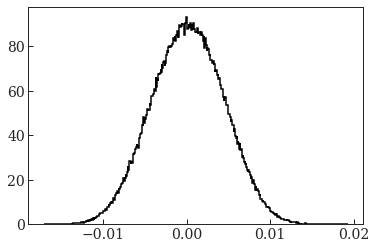

In [36]:
# Make dataframe with name, tunes, position V, profile V 
data = []

# Each row as a list
for key, value in sorted(sims.iteritems()):
    
    tune_y = float(key.split('_')[0])/100
    ctime = (key.split('_')[2])
    time = float(ctime.split('c')[1])
    if verbose: print 'Qx = ', tune_y, ', ctime =', time, '[ms]'

    d = particles_from_matfile(value)
    plt.clf()
    x1, bins_1, p1 = plt.hist(d['particles']['x'][0][0][0], bins = 500, density=True, histtype=u'step', lw=1.5, color='k')
          
    qy = 6.24
    qx = tune_y
    pos = np.array(bins_1[:-1]) + (abs(bins_1[0]-bins_1[1])/2)
    prof = x1
    
    new_data = [qx, qy, pos, prof]
    
    data.append(new_data)    

# Create dataframe
df_sim = pd.DataFrame(data, columns = ['Qx', 'Qy', 'PR.BWS.65.H_ROT:PROF_POSITION_IN', 'PR.BWS.65.H_ROT:PROF_DATA_IN'])

In [37]:
df_sim

Qx    Qy                   PR.BWS.65.H_ROT:PROF_POSITION_IN  \
0   6.07  6.24  [-0.026653909756005408, -0.026549920029633287,...   
1   6.08  6.24  [-0.0233011185803972, -0.023209823330478798, -...   
2   6.09  6.24  [-0.021514216696801078, -0.02142885948335326, ...   
3   6.10  6.24  [-0.020333350571904156, -0.020253034553185112,...   
4   6.11  6.24  [-0.019676531069057025, -0.019598650531361287,...   
5   6.12  6.24  [-0.018694937761849988, -0.018618830394216454,...   
6   6.13  6.24  [-0.01833008332024732, -0.018250587400645814, ...   
7   6.14  6.24  [-0.01870034812706582, -0.018625437826539963, ...   
8   6.15  6.24  [-0.018036929619395112, -0.01796398912822339, ...   
9   6.16  6.24  [-0.017348195709028357, -0.017277417767339823,...   
10  6.17  6.24  [-0.017665866168823513, -0.017594048597400387,...   
11  6.18  6.24  [-0.016958819727090978, -0.016883378890422934,...   
12  6.19  6.24  [-0.019400423040644096, -0.019323318463076358,...   
13  6.20  6.24  [-0.018673476240132963, -0.018598916906770527,...   
14  6.21  6.24  [-0.017132736970976382, -0.01705972135587459, ...   

                         PR.BWS.65.H_ROT:PROF_DATA_IN  
0   [0.019232669127747494, 0.0, 0.0, 0.0, 0.019232...  
1   [0.021906944794910226, 0.0, 0.0, 0.0, 0.0, 0.0...  
2   [0.023430942965619615, 0.0, 0.0, 0.0, 0.0, 0.0...  
3   [0.024901632724056544, 0.0, 0.0, 0.0, 0.0, 0.0...  
4   [0.025680356853898058, 0.0, 0.0, 0.0, 0.0, 0.0...  
5   [0.026278664762525446, 0.0, 0.0262786647625254...  
6   [0.02515852398494741, 0.0, 0.0, 0.0, 0.0, 0.0,...  
7   [0.026698598002682036, 0.0, 0.0, 0.0, 0.0, 0.0...  
8   [0.027419612452177604, 0.027419612452177604, 0...  
9   [0.05651478277797973, 0.0, 0.0, 0.028257391388...  
10  [0.05569667590725795, 0.0, 0.0, 0.0, 0.0556966...  
11  [0.026510840657830406, 0.0, 0.0, 0.0, 0.0, 0.0...  
12  [0.025938797190646096, 0.0, 0.0, 0.0, 0.0, 0.0...  
13  [0.026824274169376026, 0.0, 0.0, 0.0, 0.0, 0.0...  
14  [0.0547828022050293, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [38]:
# Gaussian and 2nd moment fits
df_sim_filtered = Multi_filter_sim(df_sim, with_plot = True, WS = '65.H', smooth=True)


Multi_filter row  0

	initial guess: mu0 0.17543964800159628
	initial guess: offs0 0.0033657170973558147
	initial guess: ampl 60.95547202865115
	initial guess: slope 0
	initial guess: sigma0 37.09187692253967
3 parameter fit sigma =  6.659695388026655  +/-  0.010020560888301838
Removing centre shift of  0.16566370686095513
Second moment =  6.490772835217347

Multi_filter row  1

	initial guess: mu0 0.9834178978982075
	initial guess: offs0 0.005659294072018461
	initial guess: ampl 62.09846890349974
	initial guess: slope 0
	initial guess: sigma0 32.5639107989211
3 parameter fit sigma =  6.331340693944919  +/-  0.023877231628263777
Removing centre shift of  0.26968482202513167
Second moment =  5.894237425712433

Multi_filter row  2

	initial guess: mu0 0.7640160130786382
	initial guess: offs0 0.0029288678707024567
	initial guess: ampl 66.04245584289633
	initial guess: slope 0
	initial guess: sigma0 30.44588505144994
3 parameter fit sigma =  5.8719263775100705  +/-  0.02678173485669041
Re

/usr/local/bin/start_ipykernel.py:81: RuntimeWarning: invalid value encountered in sqrt
/usr/local/bin/start_ipykernel.py:83: RuntimeWarning: invalid value encountered in sqrt



Multi_filter row  6

	initial guess: mu0 0.510449625310527
	initial guess: offs0 0.0
	initial guess: ampl 83.01210732076956
	initial guess: slope 0
	initial guess: sigma0 28.35523246932837
3 parameter fit sigma =  4.731645932299792  +/-  0.01003582920802045
Removing centre shift of  0.21427450510534565
Second moment =  4.522771253547695

Multi_filter row  7

	initial guess: mu0 0.4017785070284177
	initial guess: offs0 0.0017799065335120533
	initial guess: ampl 85.62367515640962
	initial guess: slope 0
	initial guess: sigma0 26.719597639797108
3 parameter fit sigma =  4.600649872045082  +/-  0.0073872793796865175
Removing centre shift of  0.16832226220784482
Second moment =  4.424622966159144

Multi_filter row  8

	initial guess: mu0 0.41701464704974217
	initial guess: offs0 0.00456993540869695
	initial guess: ampl 87.33486046934597
	initial guess: slope 0
	initial guess: sigma0 26.016990481632174
3 parameter fit sigma =  4.53006812367288  +/-  0.006859936226137502
Removing centre shif

In [39]:
df_sim_filtered

Qx    Qy                   PR.BWS.65.H_ROT:PROF_POSITION_IN  \
0   6.07  6.24  [-0.026653909756005408, -0.026549920029633287,...   
1   6.08  6.24  [-0.0233011185803972, -0.023209823330478798, -...   
2   6.09  6.24  [-0.021514216696801078, -0.02142885948335326, ...   
3   6.10  6.24  [-0.020333350571904156, -0.020253034553185112,...   
4   6.11  6.24  [-0.019676531069057025, -0.019598650531361287,...   
5   6.12  6.24  [-0.018694937761849988, -0.018618830394216454,...   
6   6.13  6.24  [-0.01833008332024732, -0.018250587400645814, ...   
7   6.14  6.24  [-0.01870034812706582, -0.018625437826539963, ...   
8   6.15  6.24  [-0.018036929619395112, -0.01796398912822339, ...   
9   6.16  6.24  [-0.017348195709028357, -0.017277417767339823,...   
10  6.17  6.24  [-0.017665866168823513, -0.017594048597400387,...   
11  6.18  6.24  [-0.016958819727090978, -0.016883378890422934,...   
12  6.19  6.24  [-0.019400423040644096, -0.019323318463076358,...   
13  6.20  6.24  [-0.018673476240132963, -0.018598916906770527,...   
14  6.21  6.24  [-0.017132736970976382, -0.01705972135587459, ...   

                         PR.BWS.65.H_ROT:PROF_DATA_IN  2ndMoment H  \
0   [0.019232669127747494, 0.0, 0.0, 0.0, 0.019232...     6.490773   
1   [0.021906944794910226, 0.0, 0.0, 0.0, 0.0, 0.0...     5.894237   
2   [0.023430942965619615, 0.0, 0.0, 0.0, 0.0, 0.0...     5.410478   
3   [0.024901632724056544, 0.0, 0.0, 0.0, 0.0, 0.0...     5.039741   
4   [0.025680356853898058, 0.0, 0.0, 0.0, 0.0, 0.0...     4.782240   
5   [0.026278664762525446, 0.0, 0.0262786647625254...     4.613727   
6   [0.02515852398494741, 0.0, 0.0, 0.0, 0.0, 0.0,...     4.522771   
7   [0.026698598002682036, 0.0, 0.0, 0.0, 0.0, 0.0...     4.424623   
8   [0.027419612452177604, 0.027419612452177604, 0...     4.362476   
9   [0.05651478277797973, 0.0, 0.0, 0.028257391388...     4.350332   
10  [0.05569667590725795, 0.0, 0.0, 0.0, 0.0556966...     4.318802   
11  [0.026510840657830406, 0.0, 0.0, 0.0, 0.0, 0.0...     4.353456   
12  [0.025938797190646096, 0.0, 0.0, 0.0, 0.0, 0.0...     4.316063   
13  [0.026824274169376026, 0.0, 0.0, 0.0, 0.0, 0.0...     4.343271   
14  [0.0547828022050293, 0.0, 0.0, 0.0, 0.0, 0.0, ...     4.330224   

                 sig H  sig errH                 A H                 mu H  \
0    6.659695388026655  0.010021  1007.0506051217329  0.16566370686095513   
1    6.331340693944919  0.023877  1020.4696928093675  0.26968482202513167   
2   5.8719263775100705  0.026782  1023.7017114392033    0.307959882468726   
3   5.4484450179835795  0.022652  1022.5154297314497  0.22168051938048164   
4    5.116877362549326  0.017837  1019.4502062741988  0.15894666066039306   
5    4.877931412669309  0.013009  1015.8548899143666  0.20129122620159728   
6    4.731645932299792  0.010036  1012.8243005930843  0.21427450510534565   
7    4.600649872045082  0.007387  1010.8141992894241  0.16832226220784482   
8     4.53006812367288  0.006860  1010.4147713981889  0.14089399237580863   
9    4.508393433695502  0.006204  1009.7751147685748   0.1629430192052364   
10   4.471588321992597  0.005994  1009.5524918599782  0.18484733645758475   
11   4.507897974610547  0.005757  1009.4343796829589  0.15091931930889457   
12   4.453232100751182  0.005345  1008.5240711574229  0.14670997931941074   
13    4.47845378204671  0.005065  1008.2886249628931  0.14825082644493684   
14   4.454857728358891  0.004409  1007.5558432422544  0.16444166256161175   

                                           position H  \
0   [-26.819573462866362, -26.715583736494242, -26...   
1   [-23.57080340242233, -23.47950815250393, -23.3...   
2   [-21.822176579269804, -21.736819365821987, -21...   
3   [-20.555031091284636, -20.474715072565594, -20...   
4   [-19.835477729717418, -19.75759719202168, -19....   
5   [-18.896228988051586, -18.82012162041805, -18....   
6   [-18.544357825352666, -18.46486190575116, -18....   
7   [-18.868670389273667, -18.793760088747806, -18...   
8   [-18.17782361177092, -18.10488

# Calculate Emittance for simulated bunches

In [40]:
# Calculate emittances in Horizontal
df_sim_emittance = emittance_df(df_sim_filtered, WS='65.H', verbose=True)

Emittance  0  =  3.681518723526639
Emittance  1  =  3.1690060964555564
Emittance  2  =  2.5419045858000855
Emittance  3  =  2.0262656649045585
Emittance  4  =  1.6617484574970414
Emittance  5  =  1.4216034515168081
Emittance  6  =  1.2871188777242233
Emittance  7  =  1.1727866530297664
Emittance  8  =  1.1184433510936367
Emittance  9  =  1.1098246140308639
Emittance  10  =  1.0870219957117184
Emittance  11  =  1.1304880337566245
Emittance  12  =  1.0907636290639344
Emittance  13  =  1.1230447704050048
Emittance  14  =  1.1109721507143056


In [41]:
df_sim_emittance

Qx    Qy                   PR.BWS.65.H_ROT:PROF_POSITION_IN  \
0   6.07  6.24  [-0.026653909756005408, -0.026549920029633287,...   
1   6.08  6.24  [-0.0233011185803972, -0.023209823330478798, -...   
2   6.09  6.24  [-0.021514216696801078, -0.02142885948335326, ...   
3   6.10  6.24  [-0.020333350571904156, -0.020253034553185112,...   
4   6.11  6.24  [-0.019676531069057025, -0.019598650531361287,...   
5   6.12  6.24  [-0.018694937761849988, -0.018618830394216454,...   
6   6.13  6.24  [-0.01833008332024732, -0.018250587400645814, ...   
7   6.14  6.24  [-0.01870034812706582, -0.018625437826539963, ...   
8   6.15  6.24  [-0.018036929619395112, -0.01796398912822339, ...   
9   6.16  6.24  [-0.017348195709028357, -0.017277417767339823,...   
10  6.17  6.24  [-0.017665866168823513, -0.017594048597400387,...   
11  6.18  6.24  [-0.016958819727090978, -0.016883378890422934,...   
12  6.19  6.24  [-0.019400423040644096, -0.019323318463076358,...   
13  6.20  6.24  [-0.018673476240132963, -0.018598916906770527,...   
14  6.21  6.24  [-0.017132736970976382, -0.01705972135587459, ...   

                         PR.BWS.65.H_ROT:PROF_DATA_IN  2ndMoment H  \
0   [0.019232669127747494, 0.0, 0.0, 0.0, 0.019232...     6.490773   
1   [0.021906944794910226, 0.0, 0.0, 0.0, 0.0, 0.0...     5.894237   
2   [0.023430942965619615, 0.0, 0.0, 0.0, 0.0, 0.0...     5.410478   
3   [0.024901632724056544, 0.0, 0.0, 0.0, 0.0, 0.0...     5.039741   
4   [0.025680356853898058, 0.0, 0.0, 0.0, 0.0, 0.0...     4.782240   
5   [0.026278664762525446, 0.0, 0.0262786647625254...     4.613727   
6   [0.02515852398494741, 0.0, 0.0, 0.0, 0.0, 0.0,...     4.522771   
7   [0.026698598002682036, 0.0, 0.0, 0.0, 0.0, 0.0...     4.424623   
8   [0.027419612452177604, 0.027419612452177604, 0...     4.362476   
9   [0.05651478277797973, 0.0, 0.0, 0.028257391388...     4.350332   
10  [0.05569667590725795, 0.0, 0.0, 0.0, 0.0556966...     4.318802   
11  [0.026510840657830406, 0.0, 0.0, 0.0, 0.0, 0.0...     4.353456   
12  [0.025938797190646096, 0.0, 0.0, 0.0, 0.0, 0.0...     4.316063   
13  [0.026824274169376026, 0.0, 0.0, 0.0, 0.0, 0.0...     4.343271   
14  [0.0547828022050293, 0.0, 0.0, 0.0, 0.0, 0.0, ...     4.330224   

                 sig H  sig errH                 A H                 mu H  \
0    6.659695388026655  0.010021  1007.0506051217329  0.16566370686095513   
1    6.331340693944919  0.023877  1020.4696928093675  0.26968482202513167   
2   5.8719263775100705  0.026782  1023.7017114392033    0.307959882468726   
3   5.4484450179835795  0.022652  1022.5154297314497  0.22168051938048164   
4    5.116877362549326  0.017837  1019.4502062741988  0.15894666066039306   
5    4.877931412669309  0.013009  1015.8548899143666  0.20129122620159728   
6    4.731645932299792  0.010036  1012.8243005930843  0.21427450510534565   
7    4.600649872045082  0.007387  1010.8141992894241  0.16832226220784482   
8     4.53006812367288  0.006860  1010.4147713981889  0.14089399237580863   
9    4.508393433695502  0.006204  1009.7751147685748   0.1629430192052364   
10   4.471588321992597  0.005994  1009.5524918599782  0.18484733645758475   
11   4.507897974610547  0.005757  1009.4343796829589  0.15091931930889457   
12   4.453232100751182  0.005345  1008.5240711574229  0.14670997931941074   
13    4.47845378204671  0.005065  1008.2886249628931  0.14825082644493684   
14   4.454857728358891  0.004409  1007.5558432422544  0.16444166256161175   

                                           position H  \
0   [-26.819573462866362, -26.715583736494242, -26...   
1   [-23.57080340242233, -23.47950815250393, -23.3...   
2   [-21.822176579269804, -21.736819365821987, -21...   
3   [-20.555031091284636, -20.474715072565594, -20...   
4   [-19.835477729717418, -19.75759719202168, -19....   
5   [-18.896228988051586, -18.82012162041805, -18....   
6   [-18.544357825352666, -18.46486190575116, -18....   
7   [-18.868670389273667, -18.793760088747806, -18...   
8   [-18.17782361177092, -18.10488

In [42]:
df_sim_emittance_2 = emittance_df_2(df_sim_emittance, WS='65.H', verbose=True)

Emittance from 2nd moment 0  =  3.4294493931182792
Emittance from 2nd moment 1  =  2.5775108306084715
Emittance from 2nd moment 2  =  1.976487905801311
Emittance from 2nd moment 3  =  1.5676130381088211
Emittance from 2nd moment 4  =  1.3114989495413683
Emittance from 2nd moment 5  =  1.159003297842335
Emittance from 2nd moment 6  =  1.0863004266095162
Emittance from 2nd moment 7  =  1.008821792275829
Emittance from 2nd moment 8  =  0.9654752052300075
Emittance from 2nd moment 9  =  0.9667679386436004
Emittance from 2nd moment 10  =  0.9503425606622953
Emittance from 2nd moment 11  =  0.9916730600864349
Emittance from 2nd moment 12  =  0.9690990444401051
Emittance from 2nd moment 13  =  1.002714246864349
Emittance from 2nd moment 14  =  1.0007183414018852


# Calculate Emittance using 2nd moment for simulated bunches

In [43]:
df_sim_emittance_2

Qx    Qy                   PR.BWS.65.H_ROT:PROF_POSITION_IN  \
0   6.07  6.24  [-0.026653909756005408, -0.026549920029633287,...   
1   6.08  6.24  [-0.0233011185803972, -0.023209823330478798, -...   
2   6.09  6.24  [-0.021514216696801078, -0.02142885948335326, ...   
3   6.10  6.24  [-0.020333350571904156, -0.020253034553185112,...   
4   6.11  6.24  [-0.019676531069057025, -0.019598650531361287,...   
5   6.12  6.24  [-0.018694937761849988, -0.018618830394216454,...   
6   6.13  6.24  [-0.01833008332024732, -0.018250587400645814, ...   
7   6.14  6.24  [-0.01870034812706582, -0.018625437826539963, ...   
8   6.15  6.24  [-0.018036929619395112, -0.01796398912822339, ...   
9   6.16  6.24  [-0.017348195709028357, -0.017277417767339823,...   
10  6.17  6.24  [-0.017665866168823513, -0.017594048597400387,...   
11  6.18  6.24  [-0.016958819727090978, -0.016883378890422934,...   
12  6.19  6.24  [-0.019400423040644096, -0.019323318463076358,...   
13  6.20  6.24  [-0.018673476240132963, -0.018598916906770527,...   
14  6.21  6.24  [-0.017132736970976382, -0.01705972135587459, ...   

                         PR.BWS.65.H_ROT:PROF_DATA_IN  2ndMoment H  \
0   [0.019232669127747494, 0.0, 0.0, 0.0, 0.019232...     6.490773   
1   [0.021906944794910226, 0.0, 0.0, 0.0, 0.0, 0.0...     5.894237   
2   [0.023430942965619615, 0.0, 0.0, 0.0, 0.0, 0.0...     5.410478   
3   [0.024901632724056544, 0.0, 0.0, 0.0, 0.0, 0.0...     5.039741   
4   [0.025680356853898058, 0.0, 0.0, 0.0, 0.0, 0.0...     4.782240   
5   [0.026278664762525446, 0.0, 0.0262786647625254...     4.613727   
6   [0.02515852398494741, 0.0, 0.0, 0.0, 0.0, 0.0,...     4.522771   
7   [0.026698598002682036, 0.0, 0.0, 0.0, 0.0, 0.0...     4.424623   
8   [0.027419612452177604, 0.027419612452177604, 0...     4.362476   
9   [0.05651478277797973, 0.0, 0.0, 0.028257391388...     4.350332   
10  [0.05569667590725795, 0.0, 0.0, 0.0, 0.0556966...     4.318802   
11  [0.026510840657830406, 0.0, 0.0, 0.0, 0.0, 0.0...     4.353456   
12  [0.025938797190646096, 0.0, 0.0, 0.0, 0.0, 0.0...     4.316063   
13  [0.026824274169376026, 0.0, 0.0, 0.0, 0.0, 0.0...     4.343271   
14  [0.0547828022050293, 0.0, 0.0, 0.0, 0.0, 0.0, ...     4.330224   

                 sig H  sig errH                 A H                 mu H  \
0    6.659695388026655  0.010021  1007.0506051217329  0.16566370686095513   
1    6.331340693944919  0.023877  1020.4696928093675  0.26968482202513167   
2   5.8719263775100705  0.026782  1023.7017114392033    0.307959882468726   
3   5.4484450179835795  0.022652  1022.5154297314497  0.22168051938048164   
4    5.116877362549326  0.017837  1019.4502062741988  0.15894666066039306   
5    4.877931412669309  0.013009  1015.8548899143666  0.20129122620159728   
6    4.731645932299792  0.010036  1012.8243005930843  0.21427450510534565   
7    4.600649872045082  0.007387  1010.8141992894241  0.16832226220784482   
8     4.53006812367288  0.006860  1010.4147713981889  0.14089399237580863   
9    4.508393433695502  0.006204  1009.7751147685748   0.1629430192052364   
10   4.471588321992597  0.005994  1009.5524918599782  0.18484733645758475   
11   4.507897974610547  0.005757  1009.4343796829589  0.15091931930889457   
12   4.453232100751182  0.005345  1008.5240711574229  0.14670997931941074   
13    4.47845378204671  0.005065  1008.2886249628931  0.14825082644493684   
14   4.454857728358891  0.004409  1007.5558432422544  0.16444166256161175   

                                           position H  \
0   [-26.819573462866362, -26.715583736494242, -26...   
1   [-23.57080340242233, -23.47950815250393, -23.3...   
2   [-21.822176579269804, -21.736819365821987, -21...   
3   [-20.555031091284636, -20.474715072565594, -20...   
4   [-19.835477729717418, -19.75759719202168, -19....   
5   [-18.896228988051586, -18.82012162041805, -18....   
6   [-18.544357825352666, -18.46486190575116, -18....   
7   [-18.868670389273667, -18.793760088747806, -18...   
8   [-18.17782361177092, -18.10488

# Save simulation dataframe to pickle file

In [44]:
df_sim_emittance_2.to_pickle('MD4224_HighBrightness_Horizontal_Using_Sim_Optics_Complete_simulation_data')

In [19]:
df0_sim = pnd.read_pickle('MD4224_HighBrightness_Horizontal_Using_Sim_Optics_Complete_simulation_data')

# Plots

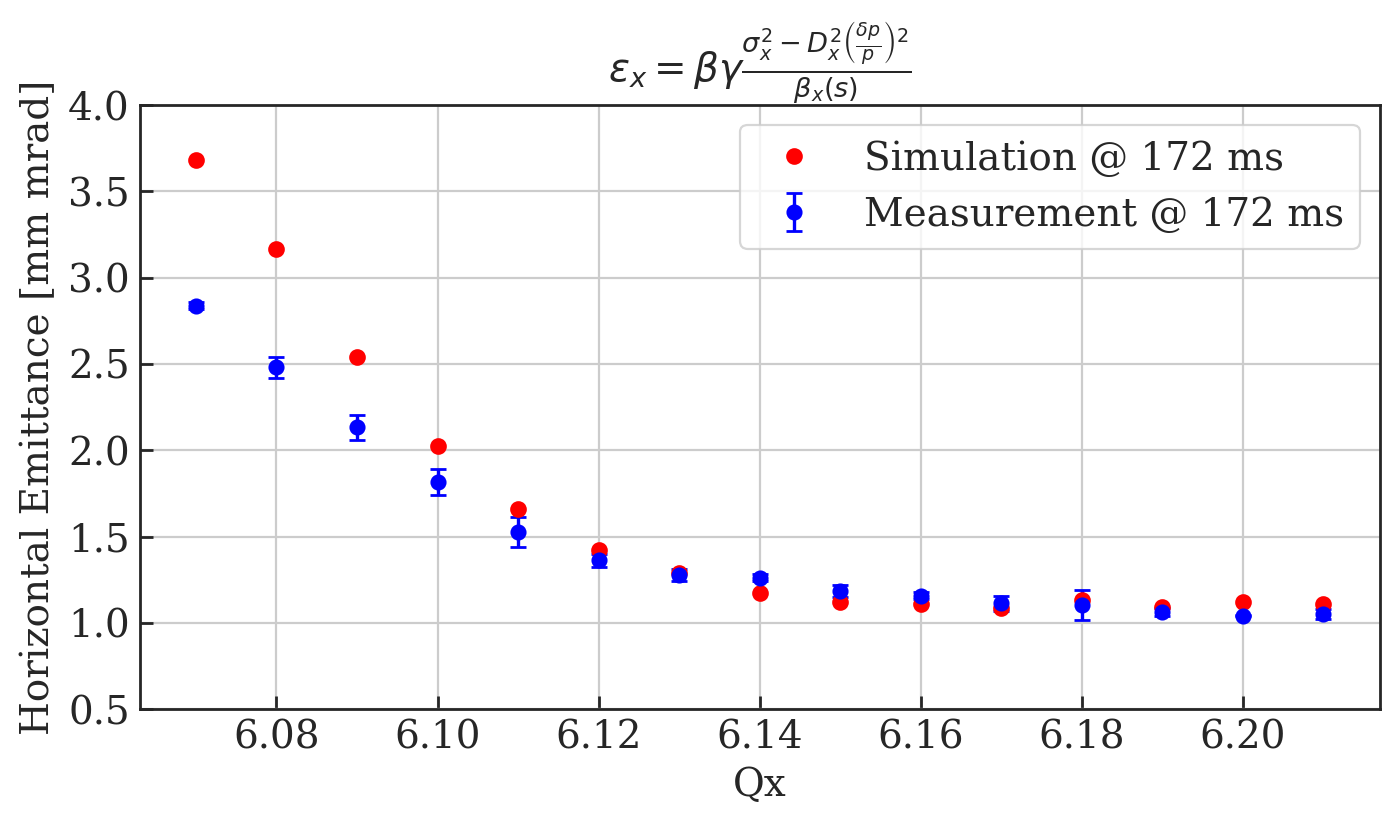

In [20]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
y_error_172[11] = max(y_error_172)
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(df0_sim['Qx'], df0_sim['emittance H'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\sigma_x^2 - D_x^2 \left(\frac{\delta p}{p}\right)^2}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\sigma^2}{\beta_{x,y}(s)}$')

# plt.ylim(0.5, 3.5)
plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_Errors_Using_Sim_Optics_Sim_172.png');

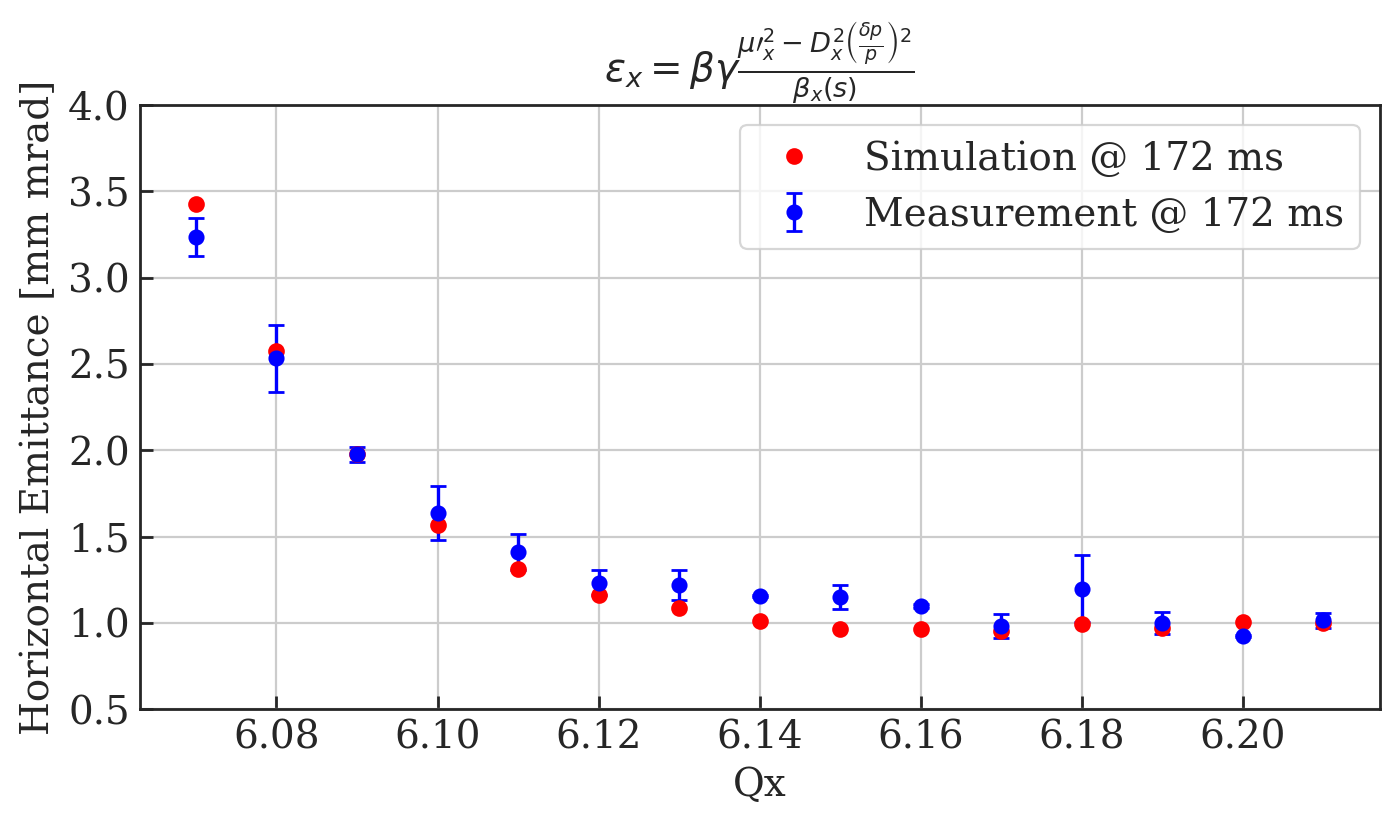

In [21]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
y_error_172[11] = max(y_error_172)
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(df0_sim['Qx'], df0_sim['emittance H 2ndMoment'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p} \right)^2}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2}{\beta_{x,y}(s)}$')

# plt.ylim(0.5, 3.5)
plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_2nd_Errors_Using_Sim_Optics_Sim_172.png');

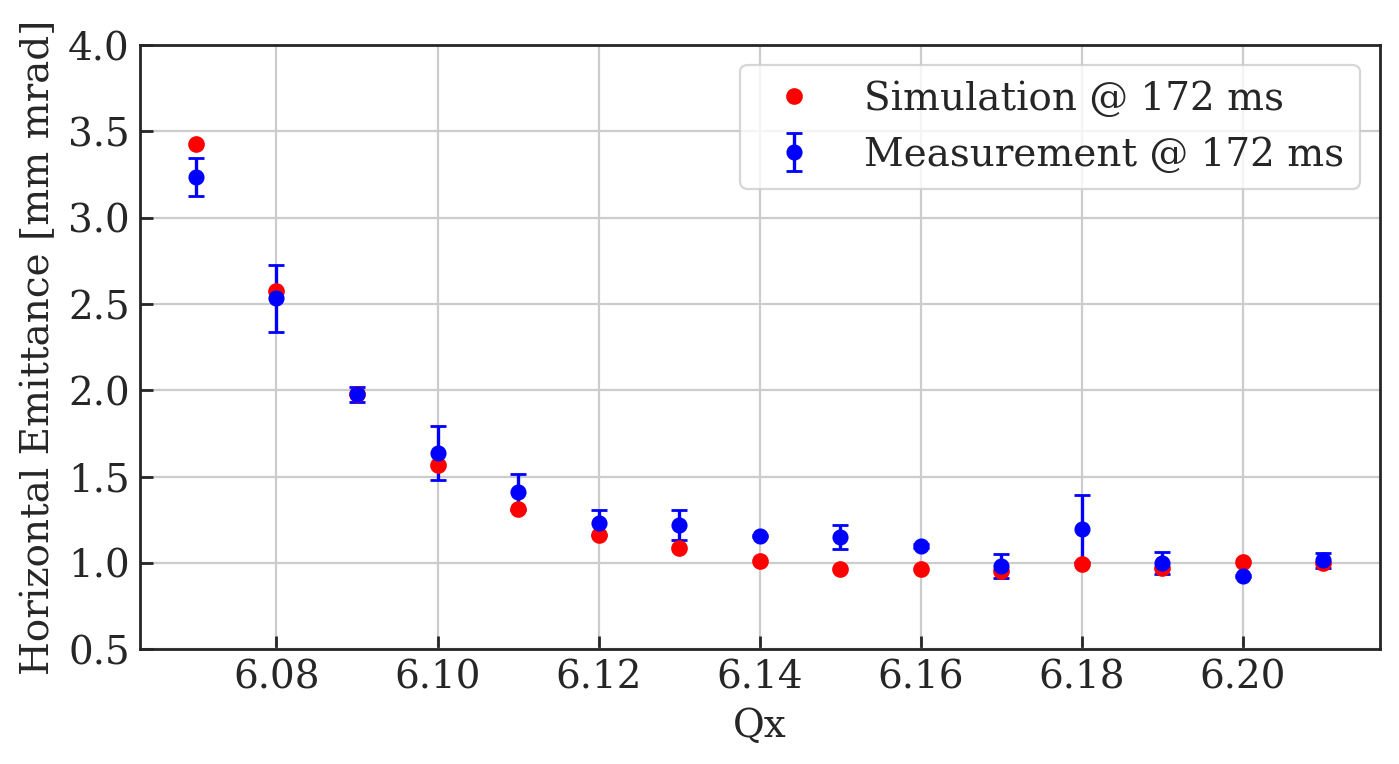

In [22]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
y_error_172[11] = max(y_error_172)
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(df0_sim['Qx'], df0_sim['emittance H 2ndMoment'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

#plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p} \right)^2}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2}{\beta_{x,y}(s)}$')

# plt.ylim(0.5, 3.5)
plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('00_MD4224_Horizontal_Manual_Fit_WS_Delay_Emittance_2nd_Errors_Using_Sim_Optics_Sim_172.png');

# Core Fit

In [78]:
df0

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:47:06.700                      185.0   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

In [79]:
df0_sim

Qx    Qy                   PR.BWS.65.H_ROT:PROF_POSITION_IN  \
0   6.07  6.24  [-0.026653909756005408, -0.026549920029633287,...   
1   6.08  6.24  [-0.0233011185803972, -0.023209823330478798, -...   
2   6.09  6.24  [-0.021514216696801078, -0.02142885948335326, ...   
3   6.10  6.24  [-0.020333350571904156, -0.020253034553185112,...   
4   6.11  6.24  [-0.019676531069057025, -0.019598650531361287,...   
5   6.12  6.24  [-0.018694937761849988, -0.018618830394216454,...   
6   6.13  6.24  [-0.01833008332024732, -0.018250587400645814, ...   
7   6.14  6.24  [-0.01870034812706582, -0.018625437826539963, ...   
8   6.15  6.24  [-0.018036929619395112, -0.01796398912822339, ...   
9   6.16  6.24  [-0.017348195709028357, -0.017277417767339823,...   
10  6.17  6.24  [-0.017665866168823513, -0.017594048597400387,...   
11  6.18  6.24  [-0.016958819727090978, -0.016883378890422934,...   
12  6.19  6.24  [-0.019400423040644096, -0.019323318463076358,...   
13  6.21  6.24  [-0.017132736970976382, -0.01705972135587459, ...   

                         PR.BWS.65.H_ROT:PROF_DATA_IN  2ndMoment H  \
0   [0.019232669127747494, 0.0, 0.0, 0.0, 0.019232...     6.490773   
1   [0.021906944794910226, 0.0, 0.0, 0.0, 0.0, 0.0...     5.894237   
2   [0.023430942965619615, 0.0, 0.0, 0.0, 0.0, 0.0...     5.410478   
3   [0.024901632724056544, 0.0, 0.0, 0.0, 0.0, 0.0...     5.039741   
4   [0.025680356853898058, 0.0, 0.0, 0.0, 0.0, 0.0...     4.782240   
5   [0.026278664762525446, 0.0, 0.0262786647625254...     4.613727   
6   [0.02515852398494741, 0.0, 0.0, 0.0, 0.0, 0.0,...     4.522771   
7   [0.026698598002682036, 0.0, 0.0, 0.0, 0.0, 0.0...     4.424623   
8   [0.027419612452177604, 0.027419612452177604, 0...     4.362476   
9   [0.05651478277797973, 0.0, 0.0, 0.028257391388...     4.350332   
10  [0.05569667590725795, 0.0, 0.0, 0.0, 0.0556966...     4.318802   
11  [0.026510840657830406, 0.0, 0.0, 0.0, 0.0, 0.0...     4.353456   
12  [0.025938797190646096, 0.0, 0.0, 0.0, 0.0, 0.0...     4.316063   
13  [0.0547828022050293, 0.0, 0.0, 0.0, 0.0, 0.0, ...     4.330224   

                 sig H  sig errH                 A H                 mu H  \
0    6.659695388026655  0.010021  1007.0506051217329  0.16566370686095513   
1    6.331340693944919  0.023877  1020.4696928093675  0.26968482202513167   
2   5.8719263775100705  0.026782  1023.7017114392033    0.307959882468726   
3   5.4484450179835795  0.022652  1022.5154297314497  0.22168051938048164   
4    5.116877362549326  0.017837  1019.4502062741988  0.15894666066039306   
5    4.877931412669309  0.013009  1015.8548899143666  0.20129122620159728   
6    4.731645932299792  0.010036  1012.8243005930843  0.21427450510534565   
7    4.600649872045082  0.007387  1010.8141992894241  0.16832226220784482   
8     4.53006812367288  0.006860  1010.4147713981889  0.14089399237580863   
9    4.508393433695502  0.006204  1009.7751147685748   0.1629430192052364   
10   4.471588321992597  0.005994  1009.5524918599782  0.18484733645758475   
11   4.507897974610547  0.005757  1009.4343796829589  0.15091931930889457   
12   4.453232100751182  0.005345  1008.5240711574229  0.14670997931941074   
13   4.454857728358891  0.004409  1007.5558432422544  0.16444166256161175   

                                           position H  \
0   [-26.819573462866362, -26.715583736494242, -26...   
1   [-23.57080340242233, -23.47950815250393, -23.3...   
2   [-21.822176579269804, -21.736819365821987, -21...   
3   [-20.555031091284636, -20.474715072565594, -20...   
4   [-19.835477729717418, -19.75759719202168, -19....   
5   [-18.896228988051586, -18.82012162041805, -18....   
6   [-18.544357825352666, -18.46486190575116, -18....   
7   [-18.868670389273667, -18.793760088747806, -18...   
8   [-18.17782361177092, -18.104883120599197, -18....   
9   [-17.511138728233593, -17.44036078654506, -17....   
10  [-17.850713505281096, -17.77889593385797, -17....   
11  [-17.10973904639987, -17.03429820973183, -16.9...   
12  [-19.5471330199635

# Test some stuff

In [80]:
# Check cutting of data
x_data = df0['position H'].iloc()[0]
y_data = df0['profile H'].iloc()[0]

In [81]:
len(x_data)

600

In [82]:
len(y_data)

600

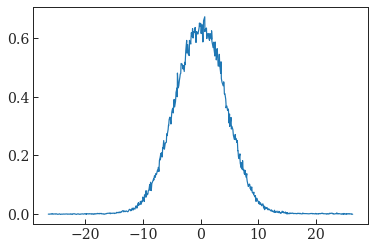

In [83]:
plt.plot(x_data, y_data)

In [84]:
indx_max = np.argmax(y_data)
indx_max

288

In [85]:
quart_len_x_dat = int(len(x_data)/4)
quart_len_x_dat

150

In [86]:
X = x_data[int(indx_max-quart_len_x_dat) : int(indx_max+quart_len_x_dat)]
Y = y_data[int(indx_max-quart_len_x_dat) : int(indx_max+quart_len_x_dat)]

In [87]:
len(X)

300

In [88]:
len(Y)

300

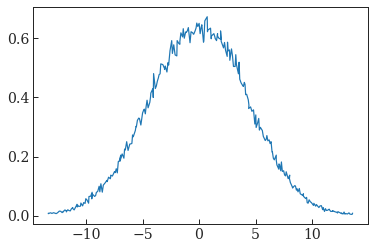

In [89]:
plt.plot(X, Y)

## Current method doesn't work, have to manually find half-peak x axis index

In [90]:
indx_max = np.argmax(y_data)
peak = y_data[indx_max]

print 'peak of ', peak, ' found at index ', indx_max

first = int(0)

for i in xrange(len(y_data)):
    if y_data[i] > peak/2:
        print 'half peak of ', y_data[i] , ' found at index ', i
        first = i
        break
        
for i in reversed(xrange(len(y_data))):
    if y_data[i] > peak/2:
        print 'half peak of ', y_data[i] , ' found at index ', i
        second = i
        break

X = x_data[int(first) : int(second)]
Y = y_data[int(first) : int(second)]



peak of  0.6728868609218155  found at index  288
half peak of  0.34742879445777264  found at index  226
half peak of  0.3407757980252474  found at index  337


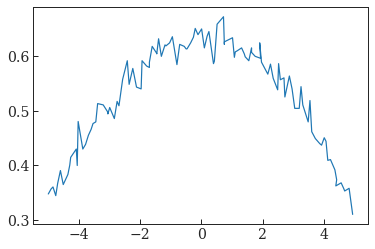

In [91]:
plt.plot(X, Y)

In [92]:
def gaussian_3_parameters(x, A, mu, sig):
    """gaussian_3_parameter(x, m, A, mu, sig)"""
    return A/np.sqrt(2*np.pi)/sig*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


ampl = max(Y)
sigma0 = 1
mu0 = 0

popt3, pcov3 = curve_fit(gaussian_3_parameters, X, Y, p0 =[ampl, mu0, sigma0])
result3 = gaussian_3_parameters(X, popt3[0], popt3[1], popt3[2])
print 'found sigma to be :', popt3[2]

found sigma to be : 4.504605171424325


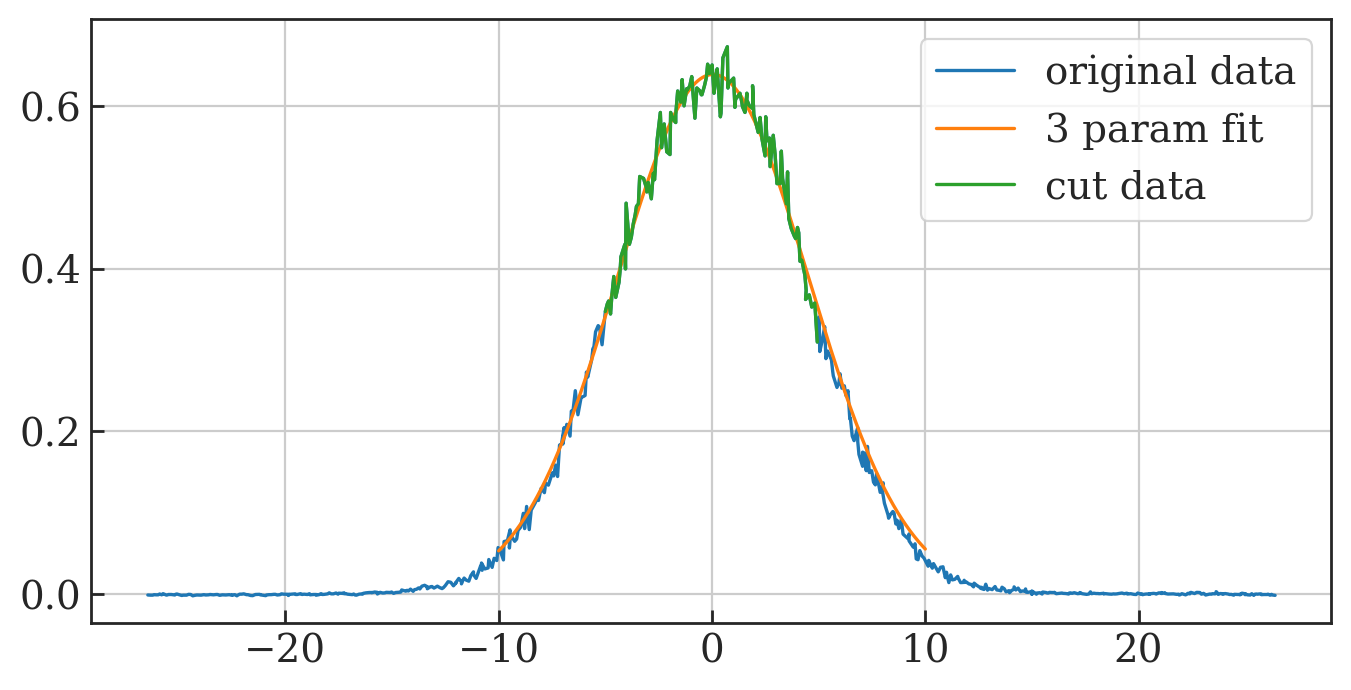

In [93]:
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');

x_dat = np.linspace(-10, 10, 1000)
result3 = gaussian_3_parameters(x_dat, popt3[0], popt3[1], popt3[2])
plt.plot(x_data, y_data, label='original data')
plt.plot(x_dat, result3, label='3 param fit');
plt.plot(X, Y, label='cut data')
plt.grid()
plt.legend()

In [94]:
def find_factor_of_peak_indices(x_data, y_data, fac, verbose = False):
    indices = []
    first = int(0)
    second = int(0)    
    
    indx_max = np.argmax(y_data)
    peak = y_data[indx_max]
    
    for i in xrange(len(y_data)):
        if y_data[i] > peak*fac:
            if verbose: print 'half peak of ', y_data[i] , ' found at index ', i
            first = i
            break
        
    for i in reversed(xrange(len(y_data))):
        if y_data[i] > peak*fac:
            if verbose: print 'half peak of ', y_data[i] , ' found at index ', i
            second = i
            break
            
    
    
    indices.append(first)
    indices.append(second)
    
    return indices

def find_half_peak_indices(x_data, y_data, verbose = False):
    indices = []
    first = int(0)
    second = int(0)    
    
    indx_max = np.argmax(y_data)
    peak = y_data[indx_max]
    
    for i in xrange(len(y_data)):
        if y_data[i] > peak/2:
            if verbose: print 'half peak of ', y_data[i] , ' found at index ', i
            first = i
            break
        
    for i in reversed(xrange(len(y_data))):
        if y_data[i] > peak/2:
            if verbose: print 'half peak of ', y_data[i] , ' found at index ', i
            second = i
            break
    
    indices.append(first)
    indices.append(second)
    
    return indices

def gaussian_3_parameters(x, A, mu, sig):
    """gaussian_3_parameter(x, m, A, mu, sig)"""
    return A/np.sqrt(2*np.pi)/sig*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def second_moment(values, weights):
    weighted_average = np.average(values, weights=weights)
    second_moment = np.sqrt(np.average((values-weighted_average)**2, weights=weights))
    return (second_moment)

def Core_filter(ndf, with_plot = True, WS = '65.H', sig_limit_mm=10, smooth = False):
    
    df = ndf.copy()
    
    position_label = 'position H'
    profile_label = 'profile H'
    window = 40
    
    
    mu_3 = []
    sigma_3 = []
    A_3 = []
    sig_err_3 = []
    
    mom_2nd = []
    
    # Iterate over dataframe
    for j in range(0, len(df), 1):
        print '\nCore_filter row ', j    
    
        y_data = df[profile_label].iloc()[j]
        x_data = df[position_label].iloc()[j]
        indx_max = np.argmax(y_data)  
        peak = y_data[indx_max]
        
#         print '\nPeak magnitude ', peak, 'found at index ', indx_max
        
        quart_len_x_dat = int(len(x_data)/4)
        
#         print '\nUsing indices', int(indx_max-quart_len_x_dat), ' to ', int(indx_max+quart_len_x_dat)
        
        # Use only half of the data, around the peak        
#         half_peak_indices = find_half_peak_indices(x_data, y_data)
        # equivalent
        half_peak_indices = find_factor_of_peak_indices(x_data, y_data, 0.5, verbose=True)
        
        X = x_data[half_peak_indices[0] : half_peak_indices[1]]
#         X = X/1000
        Y = y_data[half_peak_indices[0] : half_peak_indices[1]]
        
        indx_max = np.argmax(Y)        
        mu0 = X[indx_max]
        x_tmp = X
        y_tmp = Y
        offs0 = min(y_tmp)
        ampl = max(y_tmp)-offs0
#         x1 = x_tmp[np.searchsorted(y_tmp[:window], offs0+ampl/2)]
#         x2 = x_tmp[np.searchsorted(-y_tmp[window:], -offs0+ampl/2)]
#         FWHM = x2-x1
        #sigma0 = np.abs(2*FWHM/2.355)
        sigma0 = 1
        ampl *= np.sqrt(2*np.pi)*sigma0
        slope = 0
    
        popt3 = []
        pcov3 = []   
        
        try:
            popt3, pcov3 = curve_fit(gaussian_3_parameters, X, Y, p0 =[ampl, mu0, sigma0])

            fit_A_3 = popt3[0]
            fit_mean_3 = popt3[1]
            fit_sigma_3 = popt3[2]

            A_3.append(np.array(popt3[0]))
            mu_3.append(np.array(popt3[1]))
            sigma_3.append(np.array(abs(popt3[2])))
            sig_err_3.append(np.sqrt(np.diag(pcov3[2]))[2][2])   
            
            print '3 parameter fit sigma = ', popt3[2] , ' +/- ', np.sqrt(np.diag(pcov3[2]))[2][2]
# Plot
#------------------------------------------------      
            if with_plot:
                fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');

                x_dat = np.linspace(-20, 20, 1000)
                result3 = gaussian_3_parameters(x_dat, popt3[0], popt3[1], popt3[2])

                plt.plot(df[position_label].iloc()[j], df[profile_label].iloc()[j], label='filtered data');
                plt.plot(X, Y, label='raw core data');
                plt.plot(x_dat, result3, label='3 param core fit' );

                tit = 'WS profile & fit ' + str(j);
                savename = 'MD4224_HB_Vertical_Corefit_' + str(j);

                plt.title(tit);
                plt.ylabel('Profile [-]');
                plt.xlabel('Position [mm]');
                plt.legend();            
                plt.grid();
                fig.savefig(savename);
                plt.close();            
            
        except:            
            
            print '3 parameter fit not found'
                        
            result3 = 'NaN'

            fit_A_3 = 'NaN'
            fit_mean_3 = 'NaN'
            fit_sigma_3 = 'NaN'

            A_3.append('NaN')
            mu_3.append('NaN')
            sigma_3.append('NaN')
            sig_err_3.append('NaN')   
        
        second_mom = second_moment(X, Y)

        mom_2nd.append(second_mom)
    
    df['Core 2ndMoment '+WS[-1]] = mom_2nd   
    
    df['Core sig '+WS[-1]] = sigma_3
    df['Core sig err'+WS[-1]] = sig_err_3
    df['Core A '+WS[-1]] = A_3
    df['Core mu '+WS[-1]] = mu_3
    
    return df

In [95]:
df0_core = Core_filter(df0)


Core_filter row  0
half peak of  0.34742879445777264  found at index  226
half peak of  0.3407757980252474  found at index  337
3 parameter fit sigma =  4.5046051780348835  +/-  0.05132406792964815

Core_filter row  1
half peak of  0.3542494452715167  found at index  227
half peak of  0.3781827137103708  found at index  332
3 parameter fit sigma =  4.5299928485467325  +/-  0.056017033381494594

Core_filter row  2
half peak of  0.3516996117297235  found at index  226
half peak of  0.3336140155486549  found at index  339
3 parameter fit sigma =  4.588150387418887  +/-  0.04614742183738423

Core_filter row  3
half peak of  0.3212952385471327  found at index  226
half peak of  0.32186198027915214  found at index  344
3 parameter fit sigma =  4.555790572305601  +/-  0.0477385680575198

Core_filter row  4
half peak of  0.32182621288576785  found at index  233
half peak of  0.3341287159723485  found at index  352
3 parameter fit sigma =  4.620943117039162  +/-  0.03971223653960263

Core_filt

/usr/local/bin/start_ipykernel.py:129: RuntimeWarning: invalid value encountered in sqrt
/usr/local/bin/start_ipykernel.py:131: RuntimeWarning: invalid value encountered in sqrt



Core_filter row  7
half peak of  0.278831589086852  found at index  257
half peak of  0.3015772732776105  found at index  395
3 parameter fit sigma =  5.604280064628406  +/-  0.06427721010195515

Core_filter row  8
half peak of  0.2451539742844289  found at index  294
half peak of  0.2490925445474523  found at index  451
3 parameter fit sigma =  6.458561552855952  +/-  0.0707925768383567

Core_filter row  9
half peak of  0.338981658201161  found at index  224
half peak of  0.34137495329835044  found at index  337
3 parameter fit sigma =  4.590823613481488  +/-  0.044822808863322926

Core_filter row  10
half peak of  0.3434760534706204  found at index  230
half peak of  0.3398595520945443  found at index  343
3 parameter fit sigma =  4.588182086674194  +/-  0.04659711002845375

Core_filter row  11
half peak of  0.3429115244811537  found at index  229
half peak of  0.3357163705387515  found at index  349
3 parameter fit sigma =  4.628622279758146  +/-  0.04018764814527717

Core_filter r


Core_filter row  49
half peak of  0.32586427832037895  found at index  224
half peak of  0.33946249118617844  found at index  344
3 parameter fit sigma =  4.599305766043539  +/-  0.04386928353820274

Core_filter row  50
half peak of  0.3177242737253242  found at index  230
half peak of  0.313148450325728  found at index  349
3 parameter fit sigma =  4.55162377982586  +/-  0.04134171952990651

Core_filter row  51
half peak of  0.3264368964407032  found at index  242
half peak of  0.31546377622929844  found at index  361
3 parameter fit sigma =  4.79908850849249  +/-  0.044290456251029474

Core_filter row  52
half peak of  0.3059092930272751  found at index  251
half peak of  0.31438264490346646  found at index  379
3 parameter fit sigma =  5.2311008528022285  +/-  0.05283175854761392

Core_filter row  53
half peak of  0.275022038480436  found at index  263
half peak of  0.26774711524351147  found at index  414
3 parameter fit sigma =  5.741422544077228  +/-  0.05590656944136137

Core_f


Core_filter row  91
half peak of  0.280160211368481  found at index  293
half peak of  0.27647052817489653  found at index  439
3 parameter fit sigma =  6.238821560849267  +/-  0.07408910540438121

Core_filter row  92
half peak of  0.3399692250785279  found at index  222
half peak of  0.33638231918812644  found at index  340
3 parameter fit sigma =  4.485479865802959  +/-  0.04473212549265733

Core_filter row  93
half peak of  0.3357683847354539  found at index  224
half peak of  0.342966545743682  found at index  334
3 parameter fit sigma =  4.458548488703639  +/-  0.054907392240766566

Core_filter row  94
half peak of  0.33055128156378233  found at index  231
half peak of  0.3335063959923038  found at index  347
3 parameter fit sigma =  4.4854551048908595  +/-  0.0452931239033682

Core_filter row  95
half peak of  0.3205846189956589  found at index  234
half peak of  0.3182826585522779  found at index  353
3 parameter fit sigma =  4.6543157112944895  +/-  0.047291878786971824

Core_


Core_filter row  133
half peak of  0.3376006982173619  found at index  240
half peak of  0.3281326716567567  found at index  357
3 parameter fit sigma =  4.829478237273415  +/-  0.04809500232131098

Core_filter row  134
half peak of  0.311552274982718  found at index  251
half peak of  0.3036858800491495  found at index  378
3 parameter fit sigma =  5.360076909323529  +/-  0.06029625956701658

Core_filter row  135
half peak of  0.27933219498855083  found at index  262
half peak of  0.2916665714853153  found at index  405
3 parameter fit sigma =  5.705225987716894  +/-  0.05224833810227139

Core_filter row  136
half peak of  0.25253925460851046  found at index  285
half peak of  0.2555349734954433  found at index  433
3 parameter fit sigma =  6.156829763286592  +/-  0.0626409482918739

Core_filter row  137
half peak of  0.3316539709572831  found at index  224
half peak of  0.34238088072955286  found at index  333
3 parameter fit sigma =  4.490512369800632  +/-  0.04093923533105756

Cor


Core_filter row  174
half peak of  0.33085972358195515  found at index  229
half peak of  0.3314357972534354  found at index  350
3 parameter fit sigma =  4.605960500623281  +/-  0.03867085524227857

Core_filter row  175
half peak of  0.31970557647271625  found at index  234
half peak of  0.3451228137844974  found at index  349
3 parameter fit sigma =  4.7581380600724845  +/-  0.048073522045185106

Core_filter row  176
half peak of  0.3067450847036115  found at index  241
half peak of  0.31751807168250734  found at index  362
3 parameter fit sigma =  4.989436942211448  +/-  0.05312293379997396

Core_filter row  177
half peak of  0.3129579251561305  found at index  256
half peak of  0.302827404790061  found at index  386
3 parameter fit sigma =  5.199939704463181  +/-  0.054376516305786375

Core_filter row  178
half peak of  0.2908814671081503  found at index  266
half peak of  0.28548177890611753  found at index  403
3 parameter fit sigma =  5.682354720329468  +/-  0.05582531720167381


Core_filter row  215
half peak of  0.2925093466930755  found at index  265
half peak of  0.2930577625762768  found at index  395
3 parameter fit sigma =  5.5032275629082905  +/-  0.059068607840477606

Core_filter row  216
half peak of  0.2594146627872249  found at index  284
half peak of  0.2650114326690322  found at index  434
3 parameter fit sigma =  6.124647358947732  +/-  0.058242987539785476

Core_filter row  217
half peak of  0.24149392431623362  found at index  320
half peak of  0.2493510822121837  found at index  489
3 parameter fit sigma =  6.640503886227433  +/-  0.061032951455858235

Core_filter row  218
half peak of  0.33727300181306297  found at index  224
half peak of  0.3438769518886756  found at index  342
3 parameter fit sigma =  4.603042941583831  +/-  0.046109259906290716

Core_filter row  219
half peak of  0.33386001657571973  found at index  224
half peak of  0.34343878122009497  found at index  341
3 parameter fit sigma =  4.583902593821797  +/-  0.04232503470415

In [96]:
df0_core

PR.BWS.65.H_ROT:ACQ_DELAY  \
2018-09-04 08:30:23.500                      172.0   
2018-09-04 08:31:07.900                      172.0   
2018-09-04 08:31:52.300                      172.0   
2018-09-04 08:33:21.100                      172.0   
2018-09-04 08:34:49.900                      172.0   
2018-09-04 08:36:18.700                      172.0   
2018-09-04 08:37:47.500                      172.0   
2018-09-04 08:39:16.300                      172.0   
2018-09-04 08:40:45.100                      172.0   
2018-09-04 08:42:13.900                      175.0   
2018-09-04 08:43:42.700                      175.0   
2018-09-04 08:45:11.500                      175.0   
2018-09-04 08:46:40.300                      175.0   
2018-09-04 08:48:09.100                      175.0   
2018-09-04 08:51:06.700                      175.0   
2018-09-04 08:52:35.500                      175.0   
2018-09-04 08:54:04.300                      185.0   
2018-09-04 08:55:33.100                      185.0   
2018-09-04 08:57:01.900                      185.0   
2018-09-04 08:58:30.700                      185.0   
2018-09-04 08:59:59.500                      185.0   
2018-09-04 09:01:28.300                      185.0   
2018-09-04 09:02:57.100                      185.0   
2018-09-04 09:04:25.900                      185.0   
2018-09-04 09:05:54.700                      172.0   
2018-09-04 09:07:23.500                      172.0   
2018-09-04 09:08:52.300                      172.0   
2018-09-04 09:10:21.100                      172.0   
2018-09-04 09:11:49.900                      172.0   
2018-09-04 09:13:18.700                      172.0   
...                                            ...   
2018-09-04 13:47:06.700                      185.0   
2018-09-04 13:48:35.500                      185.0   
2018-09-04 13:50:04.300                      185.0   
2018-09-04 13:51:33.100                      185.0   
2018-09-04 13:53:01.900                      185.0   
2018-09-04 13:54:30.700                      185.0   
2018-09-04 13:55:59.500                      185.0   
2018-09-04 13:57:28.300                      185.0   
2018-09-04 13:58:57.100                      172.0   
2018-09-04 14:01:54.700                      172.0   
2018-09-04 14:03:23.500                      172.0   
2018-09-04 14:04:52.300                      172.0   
2018-09-04 14:06:21.100                      172.0   
2018-09-04 14:07:49.900                      172.0   
2018-09-04 14:09:18.700                      172.0   
2018-09-04 14:10:47.500                      175.0   
2018-09-04 14:12:16.300                      175.0   
2018-09-04 14:13:45.100                      175.0   
2018-09-04 14:15:13.900                      175.0   
2018-09-04 14:16:42.700                      175.0   
2018-09-04 14:18:11.500                      175.0   
2018-09-04 14:19:40.300                      175.0   
2018-09-04 14:21:09.100                      175.0   
2018-09-04 14:22:37.900                      185.0   
2018-09-04 14:24:06.700                      185.0   
2018-09-04 14:25:35.500                      185.0   
2018-09-04 14:27:04.300                      185.0   
2018-09-04 14:28:33.100                      185.0   
2018-09-04 14:30:01.900                      185.0   
2018-09-04 14:31:30.700                      185.0   

                                          PR.BWS.65.H_ROT:PROF_POSITION_IN  \
2018-09-04 08:30:23.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:07.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:31:52.300  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:33:21.100  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:34:49.900  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:36:18.700  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:37:47.500  [-51928.0, -51928.0, -51928.0, -51928.0, -5192...   
2018-09-04 08:39:16.300  [-51928.0, -51928.0, -51928

In [97]:
df0_sim_core = Core_filter(df0_sim)


Core_filter row  0
half peak of  30.632513208734558  found at index  183
half peak of  30.68636468229232  found at index  334
3 parameter fit sigma =  6.650883003336072  +/-  0.015744530165685586

Core_filter row  1
half peak of  31.509488930012456  found at index  170
half peak of  31.360521705406992  found at index  345
3 parameter fit sigma =  7.041825535643364  +/-  0.02232911068199288

Core_filter row  2
half peak of  33.55467238963211  found at index  167
half peak of  33.2219529995203  found at index  343
3 parameter fit sigma =  6.771310787381409  +/-  0.03677618530761552

Core_filter row  3
half peak of  36.318201273611905  found at index  170
half peak of  36.32318160015674  found at index  341
3 parameter fit sigma =  6.22818349784419  +/-  0.03000556820468901

Core_filter row  4
half peak of  38.746522421161345  found at index  172
half peak of  38.98106968042687  found at index  336
3 parameter fit sigma =  5.726951015869994  +/-  0.022914589252983498

Core_filter row  5


In [98]:
df0_sim_core

Qx    Qy                   PR.BWS.65.H_ROT:PROF_POSITION_IN  \
0   6.07  6.24  [-0.026653909756005408, -0.026549920029633287,...   
1   6.08  6.24  [-0.0233011185803972, -0.023209823330478798, -...   
2   6.09  6.24  [-0.021514216696801078, -0.02142885948335326, ...   
3   6.10  6.24  [-0.020333350571904156, -0.020253034553185112,...   
4   6.11  6.24  [-0.019676531069057025, -0.019598650531361287,...   
5   6.12  6.24  [-0.018694937761849988, -0.018618830394216454,...   
6   6.13  6.24  [-0.01833008332024732, -0.018250587400645814, ...   
7   6.14  6.24  [-0.01870034812706582, -0.018625437826539963, ...   
8   6.15  6.24  [-0.018036929619395112, -0.01796398912822339, ...   
9   6.16  6.24  [-0.017348195709028357, -0.017277417767339823,...   
10  6.17  6.24  [-0.017665866168823513, -0.017594048597400387,...   
11  6.18  6.24  [-0.016958819727090978, -0.016883378890422934,...   
12  6.19  6.24  [-0.019400423040644096, -0.019323318463076358,...   
13  6.21  6.24  [-0.017132736970976382, -0.01705972135587459, ...   

                         PR.BWS.65.H_ROT:PROF_DATA_IN  2ndMoment H  \
0   [0.019232669127747494, 0.0, 0.0, 0.0, 0.019232...     6.490773   
1   [0.021906944794910226, 0.0, 0.0, 0.0, 0.0, 0.0...     5.894237   
2   [0.023430942965619615, 0.0, 0.0, 0.0, 0.0, 0.0...     5.410478   
3   [0.024901632724056544, 0.0, 0.0, 0.0, 0.0, 0.0...     5.039741   
4   [0.025680356853898058, 0.0, 0.0, 0.0, 0.0, 0.0...     4.782240   
5   [0.026278664762525446, 0.0, 0.0262786647625254...     4.613727   
6   [0.02515852398494741, 0.0, 0.0, 0.0, 0.0, 0.0,...     4.522771   
7   [0.026698598002682036, 0.0, 0.0, 0.0, 0.0, 0.0...     4.424623   
8   [0.027419612452177604, 0.027419612452177604, 0...     4.362476   
9   [0.05651478277797973, 0.0, 0.0, 0.028257391388...     4.350332   
10  [0.05569667590725795, 0.0, 0.0, 0.0, 0.0556966...     4.318802   
11  [0.026510840657830406, 0.0, 0.0, 0.0, 0.0, 0.0...     4.353456   
12  [0.025938797190646096, 0.0, 0.0, 0.0, 0.0, 0.0...     4.316063   
13  [0.0547828022050293, 0.0, 0.0, 0.0, 0.0, 0.0, ...     4.330224   

                 sig H  sig errH                 A H                 mu H  \
0    6.659695388026655  0.010021  1007.0506051217329  0.16566370686095513   
1    6.331340693944919  0.023877  1020.4696928093675  0.26968482202513167   
2   5.8719263775100705  0.026782  1023.7017114392033    0.307959882468726   
3   5.4484450179835795  0.022652  1022.5154297314497  0.22168051938048164   
4    5.116877362549326  0.017837  1019.4502062741988  0.15894666066039306   
5    4.877931412669309  0.013009  1015.8548899143666  0.20129122620159728   
6    4.731645932299792  0.010036  1012.8243005930843  0.21427450510534565   
7    4.600649872045082  0.007387  1010.8141992894241  0.16832226220784482   
8     4.53006812367288  0.006860  1010.4147713981889  0.14089399237580863   
9    4.508393433695502  0.006204  1009.7751147685748   0.1629430192052364   
10   4.471588321992597  0.005994  1009.5524918599782  0.18484733645758475   
11   4.507897974610547  0.005757  1009.4343796829589  0.15091931930889457   
12   4.453232100751182  0.005345  1008.5240711574229  0.14670997931941074   
13   4.454857728358891  0.004409  1007.5558432422544  0.16444166256161175   

                                           position H  ...       bety  \
0   [-26.819573462866362, -26.715583736494242, -26...  ...  11.797357   
1   [-23.57080340242233, -23.47950815250393, -23.3...  ...  11.791224   
2   [-21.822176579269804, -21.736819365821987, -21...  ...  11.785121   
3   [-20.555031091284636, -20.474715072565594, -20...  ...  11.779054   
4   [-19.835477729717418, -19.75759719202168, -19....  ...  11.773030   
5   [-18.896228988051586, -18.82012162041805, -18....  ...  11.767050   
6   [-18.544357825352666, -18.46486190575116, -18....  ...  11.761117   
7   [-18.868670389273667, -18.793760088747806, -18...  ...  11.755232   
8   [-18.17782361177092, -18.104883120599197, -18....  ...  11.749394   
9   [-17.511138728233593, -17.440

# Emittance from Core sigma and second moment

In [99]:
# from scipy.interpolate import interp1d
# def PS_WSoptics(tunex, tuney, WS='65', verbose=False):
        
#     ptc_optics = dict()
#     #ptc_optics[float(tune)] = [(all floats) beta_x, beta_y, alpha_x, alpha_y, D_x, D_y]
#     ptc_optics[6.10] = [11.835, 24.924, 0.0115, -0.016, 2.86, 0.]
#     ptc_optics[6.12] = [11.917, 24.029, 0.0099, 0.0028, 2.83, 0.]
#     ptc_optics[6.14] = [12, 23.44, 0.0082, 0.0157, 2.8, 0.]
#     ptc_optics[6.16] = [12.083, 23.031, 0.0065, 0.0251, 2.77, 0.]
#     ptc_optics[6.18] = [12.165, 22.735, 0.0047, 0.0322, 2.74, 0.]
#     ptc_optics[6.20] = [12.247, 22.513, 0.0029, 0.0377, 2.71, 0.]
#     ptc_optics[6.22] = [12.328, 22.34, 0.0012, 0.0421, 2.68, 0.]
#     ptc_optics[6.24] = [12.409, 22.202, -0.00055, 0.0457, 2.65, 0.]
    
#     # interpolated data
    
#     Qy = [6.1, 6.12, 6.14, 6.16, 6.18, 6.2, 6.22, 6.24]
#     beta_x_ptc = [11.835, 11.917, 12, 12.083, 12.165, 12.247, 12.328, 12.409]
#     beta_x = [11.496287799470704, 11.622348183114314, 11.752791012666949, 11.882235857048215, 12.017876534237434, 12.155717432086707, 12.286640418239848, 12.418697362251356]
#     beta_x_eff = [15.71937930751325, 15.769989166689998, 15.846834580765128, 15.914760535085426, 16.012224151123437, 16.067729573281675, 16.265895421362465, 16.287392480720673]
#     beta_y_ptc = [24.924, 24.029, 23.44, 23.031, 22.735, 22.513, 22.34, 22.202]
#     beta_y = [28.784027286342415, 27.207938015726914, 25.95396311972594, 24.996666601561824, 24.16981199942386, 23.532576507285963, 23.068468704478313, 22.76306463960286]
#     beta_y_eff = [28.784021415243977, 27.20793652234759, 25.953962447008042, 24.996665150525683, 24.1698108711869, 23.532575659545216, 23.06846817340586, 22.763064622584743]
#     alpha_x_ptc = [0.0115, 0.0099, 0.0082, 0.0065, 0.0047, 0.0029, 0.0012, -0.00055]
#     alpha_x = [0.020196943327589586, 0.017627598679308795, 0.014994645269010886, 0.012378157613604897, 0.009604465728624582, 0.006771094434762246, 0.004103420240249408, 0.0014042139169805218]
#     alpha_x_eff = [0.012644756543632252, 0.010999606000298172, 0.009279390671409909, 0.007565427145992475, 0.005761468634033717, 0.0038912356469907898, 0.002097495908152698, 0.00041000161249536634]
#     alpha_y_ptc = [-0.016, 0.0028, 0.0157, 0.0251, 0.0322, 0.0377, 0.0421, 0.0457]
#     alpha_y = [-0.07633339839729839, -0.04694770375188252, -0.022726415517094378, -0.0032576706141040795, 0.013524545703849094, 0.026632494806317433, 0.03620287285371853, 0.04286149340139552]
#     alpha_y_eff = [-0.07633353873159593, -0.04694768168864276, -0.022726376530043065, -0.0032576498736779915, 0.013524555750239533, 0.026632507622584966, 0.03620287711554266, 0.04286150380905749]
#     D_x_ptc = [2.86, 2.83, 2.8, 2.77, 2.74, 2.71, 2.68, 2.65]
#     D_x = [2.7232998132262445, 2.6998500131457344, 2.6737571779004394, 2.645956067783495, 2.615602483750087, 2.5843844615942437, 2.5525948394197817, 2.5209695063465576]
#     D_y_ptc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
#     D_y = [0.0008237864638082594, -2.8364867400863136e-05, 0.0005038574946213577, -0.00010499875711448806, 3.6980491474269093e-05, -1.014483389421703e-05, -2.01627560923344e-05, -5.804429820819794e-05]
# #     alpha_x_int = interp1d(Qy, alpha_x)
# #     alpha_y_int = interp1d(Qy, alpha_y)

# #     alpha_x_eff_int = interp1d(Qy, alpha_x_eff)
# #     alpha_y_eff_int = interp1d(Qy, alpha_y_eff)

# #     beta_x_int = interp1d(Qy, beta_x)
# #     beta_y_int = interp1d(Qy, beta_y, kind='cubic')

#     beta_x_int = interp1d(Qy, beta_x)
#     beta_y_int = interp1d(Qy, beta_y, kind='cubic')

#     D_x_int = interp1d(Qy, D_x)
# #     D_y_int = interp1d(Qy, D_y)

#     if tuney < 1:
#         tuney = 6 + tuney
    
#     if tuney > 6.24:
#         result = {'Beta_x':beta_x_int(6.24), 'Beta_y':beta_y_int(6.24),'D_x': D_x_int(6.24)}
#     elif tuney < 6.10:
#         result = {'Beta_x':beta_x_int(6.10), 'Beta_y':beta_y_int(6.10),'D_x': D_x_int(6.10)}
#     else:
#         result = {'Beta_x':beta_x_int(tuney), 'Beta_y':beta_y_int(tuney),'D_x': D_x_int(tuney)}
#     return result

# def profiles(ndf,WS='64.V',myFiles=None, lim=40):
#     df=ndf.copy()
#     # play with these limits
#     #x=np.linspace(-40,40,1000)
#     x=np.linspace(-lim,lim,1000)
#     a=df.columns
#     if 'profile '+WS[-1] not in a:
#         df['profile '+WS[-1]]=df['PR.BWS.{}_ROT:PROF_DATA_IN'.format(WS)].apply(filtered)
#         df['position '+WS[-1]]=df['PR.BWS.{}_ROT:PROF_POSITION_IN'.format(WS)].values/1000.
#     if 'sig '+WS[-1] not in a:
#         df['sig '+WS[-1]]=np.nan
#         df['mu '+WS[-1]]=np.nan
#         df['c '+WS[-1]]=np.nan
#         df['A '+WS[-1]]=np.nan

#     span=span_range(df,myFiles=myFiles)
#     if np.isnan(df['sig '+WS[-1]].iloc[span]).all():
#         for i in span:
#             df['A '+WS[-1]].iloc[i], df['c '+WS[-1]].iloc[i], df['mu '+WS[-1]].iloc[i], df['sig '+WS[-1]].iloc[i] = makeGaussianFit_5_parameters(df['position '+WS[-1]].iloc[i], df['profile '+WS[-1]].iloc[i], for_df=True, window=lim)
#             try:
#                 yz=scipy.interpolate.interp1d(df['position '+WS[-1]].iloc[i] - df['mu '+WS[-1]].iloc[i], df['profile '+WS[-1]].iloc[i] - df['c '+WS[-1]].iloc[i])(x)
#                 if np.isnan(yz[0]):
#                     yz=np.nan
#             except:
#                 yz = np.nan
#             df['profile '+WS[-1]].iloc[i]=yz
#             df['position '+WS[-1]].iloc[i]=x
#     return df

# def twiss(ndf,WS='65.H',myFiles=None, verbose=False):
#     df=ndf.copy()
#     a=df.columns
#     if 'betx' not in a:
#         df['betx']=np.nan
#     if 'bety' not in a:
#          df['bety']=np.nan
#     if 'dx' not in a:
#          df['dx']=np.nan
#     span=span_range(df,myFiles=myFiles)
#     for i in span:
#             df.loc[df.index[i],'betx']=PS_WSoptics( df['Qx'].iloc[i], df['Qy'].iloc[i], WS=WS[:-2], verbose=verbose )['Beta_x']
#             df.loc[df.index[i],'dx']=PS_WSoptics( df['Qx'].iloc[i], df['Qy'].iloc[i], WS=WS[:-2], verbose=verbose )['D_x']
#             df.loc[df.index[i],'bety']=PS_WSoptics( df['Qx'].iloc[i], df['Qy'].iloc[i], WS=WS[:-2], verbose=verbose )['Beta_y']
#     return df

def core_emittance_df(ndf, WS='64.V', myFiles=None, beta=0.91444281513833, gamma=2.4708737618826, dp=8.7e-4, verbose=False):
    df=ndf.copy()
    a=df.columns
    if 'Core emittance V' not in a:
        df['Core emittance V']=np.nan
    span=span_range(df,myFiles=myFiles)
    if 'bety' not in a:
        df=twiss(df, WS=WS, verbose=verbose)
    for i in span:
        df.loc[df.index[i],'Core emittance V']=beta*gamma*(df['Core sig V'].iloc[i]**2)/df['bety'].iloc[i]
        print 'Emittance ', i, ' = ', beta*gamma*(df['Core sig V'].iloc[i]**2)/df['bety'].iloc[i]
    return df

# Override original due to a bug?
def core_emittance_df_2(ndf, WS='64.V', myFiles=None, beta=0.91444281513833, gamma=2.4708737618826, dp=8.7e-4, verbose=False):
    df=ndf.copy()
    a=df.columns
    span=span_range(df,myFiles=myFiles)
    if 'bety' not in a:
        df=twiss(df, WS=WS, verbose=verbose)
    for i in span:
        df.loc[df.index[i],'Core emittance V 2ndMoment']=beta*gamma*(df['Core 2ndMoment V'].iloc[i]**2)/df['bety'].iloc[i]
        print 'Emittance ', i, ' = ', beta*gamma*(df['sig V'].iloc[i]**2)/df['bety'].iloc[i]
    return df

In [100]:
final_md_df = core_emittance_df(df0_core)
final_md_df = core_emittance_df_2(final_md_df)

KeyError: 'Core sig V'

In [ ]:
final_md_df

In [ ]:
final_sim_df = core_emittance_df(df0_sim_core)
final_sim_df = core_emittance_df_2(final_sim_df)

In [ ]:
final_sim_df

In [ ]:
df0 = final_md_df
df0_sim = final_sim_df

In [ ]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 6), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(610, 624, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['Core emittance V'][(df0['PR.BWS.64.V_ROT:ACQ_DELAY']==172)][(df0['Qy']>lower_lim)][(df0['Qy']<upper_lim)] ) )
    y_error_172.append( np.std( df0['Core emittance V'][(df0['PR.BWS.64.V_ROT:ACQ_DELAY']==172)][(df0['Qy']>lower_lim)][(df0['Qy']<upper_lim)] ) )
    
plt.errorbar(x_data, y_data_172, y_error_172, label='MD @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(df0_sim['Qy'], df0_sim['Core emittance V'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qy');
plt.ylabel('Vertical Emittance [mm mrad]');

plt.title(r'Core fit $\epsilon_{x,y} = \beta\gamma \frac{\sigma_{core}^2}{\beta_{x,y}(s)}$')

plt.ylim(0, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Vertical_Manual_Fit_WS_Delay_Core_Emittance_Errors_Using_Sim_Optics_Sim_172.png');

In [ ]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 6), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(610, 624, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['Core emittance V 2ndMoment'][(df0['PR.BWS.64.V_ROT:ACQ_DELAY']==172)][(df0['Qy']>lower_lim)][(df0['Qy']<upper_lim)] ) )
    y_error_172.append( np.std( df0['Core emittance V 2ndMoment'][(df0['PR.BWS.64.V_ROT:ACQ_DELAY']==172)][(df0['Qy']>lower_lim)][(df0['Qy']<upper_lim)] ) )
    
plt.errorbar(x_data, y_data_172, y_error_172, label='MD @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(df0_sim['Qy'], df0_sim['Core emittance V 2ndMoment'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qy');
plt.ylabel('Vertical Emittance [mm mrad]');

plt.title(r'Core fit $\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2_{core}}{\beta_{x,y}(s)}$')

plt.ylim(0, 4)

plt.legend();
plt.grid();
fig.savefig('MD4224_Vertical_Manual_Fit_WS_Delay_Core_Emittance_2nd_Errors_Using_Sim_Optics_Sim_172.png');